In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore') # Ignora los mensajes de error.

Voy a trabajar con un dataset del ministerio de educación de matriculaciones de Registros generales por comunidad y matriculaciones de necesidades especiales.

De todas las discapacidades que se muestran, me centraré sólo en las neurológicas, que son discapacidad Intelectual, trastornos del espectro del autismo, y trastornos graves de conducta.

Voy a definir cada una de ellas, para que quede claro:

Discapacidad intelectual: implica limitaciones en el funcionamiento mental y adaptativo. Puede afectar la comunicación, el aprendizaje y la toma de decisiones. Con apoyo adecuado, las personas con esta condición pueden llevar vidas plenas y contribuir a la sociedad. La inclusión y el respeto son fundamentales para su bienestar.

Trastornos del aspectro autismo: afectan la comunicación, interacción social y comportamiento. Con apoyo adecuado, las personas con TEA pueden llevar vidas plenas. Aceptación y comprensión son clave.

Trastornos gaves de conducta: implican comportamientos desafiantes y problemáticos que pueden poner en peligro la seguridad de la persona o de los demás. Requieren atención especializada y apoyo para mejorar la calidad de vida. Son patrones persistentes de comportamiento desafiante y problemático que pueden incluir agresión, conducta antisocial, comportamientos autolesivos u otros comportamientos que ponen en peligro la seguridad de la persona o de los demás.

Me encuetro con dos dataset para cada año y voy a unir todos los datasets con MERGE en uno. El rango de cursos lectivos que voy a trabajar son de 5 años, del 2017 al 2022.

In [2]:
# Descargo archivo RG 2021-2022 
RG_21_22 = pd.read_csv("RG_21_22_CSV.csv", sep='\t', encoding='latin1')
RG_21_22

,Titularidad/financiación del centro,Comunidad autónoma/provincia,Enseñanza,Sexo,Total
0,TODOS LOS CENTROS,01 ANDALUCÍA,TOTAL,Hombres,824.946
1,TODOS LOS CENTROS,01 ANDALUCÍA,TOTAL,Mujeres,779.741
2,TODOS LOS CENTROS,02 ARAGÓN,TOTAL,Hombres,114.675
3,TODOS LOS CENTROS,02 ARAGÓN,TOTAL,Mujeres,105.747
4,TODOS LOS CENTROS,"03 ASTURIAS, PRINCIPADO DE",TOTAL,Hombres,69.582
5,TODOS LOS CENTROS,"03 ASTURIAS, PRINCIPADO DE",TOTAL,Mujeres,64.969
6,TODOS LOS CENTROS,"04 BALEARS, ILLES",TOTAL,Hombres,100.850
7,TODOS LOS CENTROS,"04 BALEARS, ILLES",TOTAL,Mujeres,93.027
8,TODOS LOS CENTROS,05 CANARIAS,TOTAL,Hombres,172.198
9,TODOS LOS CENTROS,05 CANARIAS,TOTAL,Mujeres,166.205


Para tener los datos de cada dataset ordenados, voy a tener que crear una columna que se llame Curso y añadir el año del curso de finalización

In [3]:
# Añadir una nueva columna llamada 'Año' con el valor '2022' Realmente se refiere al Curso 
RG_21_22['Año'] = '2022'
# Mover la columna a la posición 2. 
RG_21_22.insert(2, 'Año',RG_21_22.pop('Año'))

También veo que tengo que ordenar los datos de todos los datasets, en el Tipo de plazas. Es decir, tengo que crear una columna llamada Tipo de plaza, y le asigno el registro de Ordinaria o Especial. La diferencia de cada plaza es la siguiente:

* Ordinaria: una vacante disponible en una institución educativa, ya sea en un nivel escolar o universitario, que no está reservada para un programa específico o para estudiantes con necesidades especiales.

* Especial: una vacante o espacio reservado para un programa educativo específico. Por ejemplo, en el caso de la educación especial, una "plaza especial" podría ser una vacante destinada a un estudiante con necesidades educativas especiales que requiere apoyo adicional o servicios personalizados.

In [4]:
# Añadir una nueva columna llamada "Plaza" con registros "Ordinaria" en la posición 3
RG_21_22.insert(loc=3, column='Plaza', value='Ordinarias')


De todos los datasets, voy a eliminar las columnas de 'Titularidad/financiación del centro' y también 'Enseñanza'. Ya que el dato que me proporciona no es relevante para mi estudio.

In [5]:
# Eliminar la columna 'Titularidad/financiación del centro'
RG_21_22 = RG_21_22.drop('Titularidad/financiación del centro', axis=1)

# Eliminar la columna 'Enseñanza'
RG_21_22 = RG_21_22.drop('Enseñanza', axis=1)

In [6]:
NESE_21_22 = pd.read_csv("NESE_21_22_CSV1.csv", sep='\t', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2022' Realmente se refiere al Curso 
NESE_21_22['Año'] = '2022'

# Mover la columna a la posición 2. 
NESE_21_22.insert(2, 'Año',NESE_21_22.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Ordinarios" en la posición 3
NESE_21_22.insert(loc=3, column='Plaza', value='Especiales')

# Eliminar la columna 'Titularidad'
NESE_21_22 = NESE_21_22.drop('Titularidad', axis=1)

Empiezo a unir los datasets con MERGE, y en la columna de Discapacidad, le asigno el valor 0 a los registros que no tienen valores, ya que están considerados como plazas sin discapacidad. Después más adelante, modifico el valor 0 por No (de No discapacidad).

In [7]:
import numpy as np
# Copiar los DataFrames originales
RG_21_22_copy = RG_21_22.copy()
NESE_21_22_copy = NESE_21_22.copy()

# Unir los DataFrames por las columnas especificadas
Plazas_21_22 = pd.merge(RG_21_22_copy, NESE_21_22_copy, on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo','Total'], how='outer')

# Rellenar los valores NaN con ceros
Plazas_21_22 = Plazas_21_22.fillna(0)

In [8]:
# Cambio los valores de 0 en la columna de discapacidad por NO. 
Plazas_21_22['Discapacidad'] = Plazas_21_22['Discapacidad'].replace(0, 'No')

In [9]:
# Descargo archivo RG 2020-2021 
RG_20_21 = pd.read_csv("RG_20_21.csv", sep='\t', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2022' Realmente se refiere al Curso 
RG_20_21['Año'] = '2021'

# Mover la columna a la posición 2. 
RG_20_21.insert(2, 'Año',RG_20_21.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Ordinaria" en la posición 3
RG_20_21.insert(loc=3, column='Plaza', value='Ordinarias')

# Eliminar la columna 'Titularidad/financiación del centro'
RG_20_21 = RG_20_21.drop('Titularidad/financiación del centro', axis=1)

# Eliminar la columna 'Enseñanza'
RG_20_21 = RG_20_21.drop('Enseñanza', axis=1)

In [10]:
NESE_20_21 = pd.read_csv("NESE_20_21.csv", sep=';', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2021' Realmente se refiere al Curso 
NESE_20_21['Año'] = '2021'

# Mover la columna a la posición 2. 
NESE_20_21.insert(2, 'Año',NESE_20_21.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Especial" en la posición 3
NESE_20_21.insert(loc=3, column='Plaza', value='Especiales')

# Eliminar la columna 'Titularidad'
NESE_20_21 = NESE_20_21.drop('Titularidad', axis=1)

In [11]:
# Copiar los DataFrames originales
RG_20_21_copy = RG_20_21.copy()
NESE_20_21_copy = NESE_20_21.copy()

# Unir los DataFrames por las columnas Comunidad autónoma, Año, Plaza, Sexo y Total.
Plazas_20_21 = pd.merge(RG_20_21_copy, NESE_20_21_copy, on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo', 'Total'], how='outer')

# Rellenar los valores NaN con ceros
Plazas_20_21 = Plazas_20_21.fillna(0)

# Cambiar los valores de 0 en la columna de discapacidad por 'No'
Plazas_20_21['Discapacidad'] = Plazas_20_21['Discapacidad'].replace(0, 'No')

# Mostrar el DataFrame resultante
Plazas_20_21

,Comunidad autónoma/provincia,Año,Plaza,Sexo,Total,Discapacidad
0,01 ANDALUCÍA,2021,Ordinarias,Hombres,821.694,No
1,01 ANDALUCÍA,2021,Ordinarias,Mujeres,776.806,No
2,02 ARAGÓN,2021,Ordinarias,Hombres,114.224,No
3,02 ARAGÓN,2021,Ordinarias,Mujeres,105.045,No
4,"03 ASTURIAS, PRINCIPADO DE",2021,Ordinarias,Hombres,70.333,No
...,...,...,...,...,...,...
179,19 MELILLA,2021,Especiales,Mujeres,23.000,Intelectual
180,19 MELILLA,2021,Especiales,Hombres,16.000,Trastornos generalizados del desarrollo
181,19 MELILLA,2021,Especiales,Mujeres,9.000,Trastornos generalizados del desarrollo
182,19 MELILLA,2021,Especiales,Hombres,0.000,Trastornos graves de conducta/personalidad


In [12]:
# Copiar los DataFrames originales
Plazas_21_22_copy = Plazas_21_22.copy()
Plazas_20_21_copy = Plazas_20_21.copy()

# Unir los DataFrames por las columnas Comunidad autónoma, Año, Plaza, Sexo, Total, Discapacidad
Plazas = pd.merge(Plazas_21_22_copy, Plazas_20_21_copy, on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo', 'Discapacidad', 'Total'], how='outer')

# Mover la columna discapacidad a la posición 3. 
Plazas.insert(3, 'Discapacidad',Plazas.pop('Discapacidad'))

# Mover la columna año a la posición 0. 
Plazas.insert(0, 'Año',Plazas.pop('Año'))

In [13]:
# Descargo archivo RG 2019-2020 
RG_19_20 = pd.read_csv("RG_19_20.csv", sep='\t', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2020' Realmente se refiere al Curso 
RG_19_20['Año'] = '2020'

# Mover la columna a la posición 2. 
RG_19_20.insert(2, 'Año',RG_19_20.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Ordinaria" en la posición 3
RG_19_20.insert(loc=3, column='Plaza', value='Ordinarias')

# Eliminar la columna 'Titularidad/financiación del centro'
RG_19_20 = RG_19_20.drop('Titularidad/financiación del centro', axis=1)

# Eliminar la columna 'Enseñanza'
RG_19_20 = RG_19_20.drop('Enseñanza', axis=1)

In [14]:
NESE_19_20 = pd.read_csv("NESE_19_20.csv", sep='\t', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2021' Realmente se refiere al Curso 
NESE_19_20['Año'] = '2020'

# Mover la columna a la posición 2. 
NESE_19_20.insert(2, 'Año',NESE_19_20.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Especial" en la posición 3
NESE_19_20.insert(loc=3, column='Plaza', value='Especiales')

# Eliminar la columna 'Titularidad'
NESE_19_20 = NESE_19_20.drop('Titularidad', axis=1)

In [15]:
# Copiar los DataFrames originales
RG_19_20_copy = RG_19_20.copy()
NESE_19_20_copy = NESE_19_20.copy()

# Unir los DataFrames por las columnas Comunidad autónoma, Año, Plaza, Sexo y Total
Plazas_19_20 = pd.merge(RG_19_20_copy, NESE_19_20_copy , on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo', 'Total'], how='outer')

# Rellenar los valores NaN con ceros
Plazas_19_20 = Plazas_19_20.fillna(0)

# Cambio los valores de 0 en la columna de discapacidad por 'No'
Plazas_19_20['Discapacidad'] = Plazas_19_20['Discapacidad'].replace(0, 'No')

In [16]:
# Hacer copias de los DataFrames originales
Plazas_copy = Plazas.copy()
Plazas_19_20_copy = Plazas_19_20.copy()

# Unir los DataFrames de los años 2019 y 2020 por las columnas Comunidad autónoma, Año, Plaza, Sexo, Total, Discapacidad
Plazas = pd.merge(Plazas_copy, Plazas_19_20_copy, on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo', 'Discapacidad', 'Total'], how='outer')

# Mostrar el DataFrame resultante
Plazas

,Año,Comunidad autónoma/provincia,Plaza,Discapacidad,Sexo,Total
0,2022,01 ANDALUCÍA,Ordinarias,No,Hombres,824.946
1,2022,01 ANDALUCÍA,Ordinarias,No,Mujeres,779.741
2,2022,02 ARAGÓN,Ordinarias,No,Hombres,114.675
3,2022,02 ARAGÓN,Ordinarias,No,Mujeres,105.747
4,2022,"03 ASTURIAS, PRINCIPADO DE",Ordinarias,No,Hombres,69.582
...,...,...,...,...,...,...
547,2020,19 MELILLA,Especiales,Intelectual,Mujeres,22.000
548,2020,19 MELILLA,Especiales,Trastornos generalizados del desarrollo,Hombres,13.000
549,2020,19 MELILLA,Especiales,Trastornos generalizados del desarrollo,Mujeres,5.000
550,2020,19 MELILLA,Especiales,Trastornos graves de conducta/personalidad,Hombres,0.000


In [17]:
# Descargo archivo RG 2018-2019 
RG_18_19 = pd.read_csv("RG_18_19.csv", sep='\t', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2020' Realmente se refiere al Curso 
RG_18_19['Año'] = '2019'

# Mover la columna a la posición 2. 
RG_18_19.insert(2, 'Año',RG_18_19.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Ordinaria" en la posición 3
RG_18_19.insert(loc=3, column='Plaza', value='Ordinarias')

# Eliminar la columna 'Titularidad/financiación del centro'
RG_18_19 = RG_18_19.drop('Titularidad/financiación del centro', axis=1)

# Eliminar la columna 'Enseñanza'
RG_18_19 = RG_18_19.drop('Enseñanza', axis=1)

In [18]:
NESE_18_19 = pd.read_csv("NESE_18_19.csv", sep='\t', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2021' Realmente se refiere al Curso 
NESE_18_19['Año'] = '2019'

# Mover la columna a la posición 2. 
NESE_18_19.insert(2, 'Año',NESE_18_19.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Especial" en la posición 3
NESE_18_19.insert(loc=3, column='Plaza', value='Especiales')

# Eliminar la columna 'Titularidad'
NESE_18_19 = NESE_18_19.drop('Titularidad', axis=1)

In [19]:
# Hacer copias de los DataFrames originales
RG_18_19_copy = RG_18_19.copy()
NESE_18_19_copy = NESE_18_19.copy()

# Unir los DataFrames por las columnas Comunidad autónoma, Año, Plaza, Sexo y Total
Plazas_18_19 = pd.merge(RG_18_19_copy, NESE_18_19_copy, on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo', 'Total'], how='outer')

# Rellenar los valores NaN con ceros
Plazas_18_19 = Plazas_18_19.fillna(0)

# Cambiar los valores de 0 en la columna de discapacidad por 'No'
Plazas_18_19['Discapacidad'] = Plazas_18_19['Discapacidad'].replace(0, 'No')

# Mostrar el DataFrame resultante
Plazas_18_19

,Comunidad autónoma/provincia,Año,Plaza,Sexo,Total,Discapacidad
0,01 ANDALUCÍA,2019,Ordinarias,Hombres,828.141,No
1,01 ANDALUCÍA,2019,Ordinarias,Mujeres,780.649,No
2,02 ARAGÓN,2019,Ordinarias,Hombres,113.889,No
3,02 ARAGÓN,2019,Ordinarias,Mujeres,105.347,No
4,"03 ASTURIAS, PRINCIPADO DE",2019,Ordinarias,Hombres,70.798,No
...,...,...,...,...,...,...
179,19 MELILLA,2019,Especiales,Mujeres,27.000,Intelectual
180,19 MELILLA,2019,Especiales,Hombres,9.000,Trastornos generalizados del desarrollo
181,19 MELILLA,2019,Especiales,Mujeres,5.000,Trastornos generalizados del desarrollo
182,19 MELILLA,2019,Especiales,Hombres,0.000,Trastornos graves de conducta/personalidad


In [20]:
# Hacer copia del DataFrame Plazas_18_19
Plazas_18_19_copy = Plazas_18_19.copy()

# Unir los DataFrames por las columnas Comunidad autónoma, Año, Plaza, Sexo, Discapacidad y Total
Plazas = pd.merge(Plazas, Plazas_18_19_copy, on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo', 'Discapacidad', 'Total'], how='outer')

In [21]:
# Descargo archivo RG 2017-2018 
RG_17_18 = pd.read_csv("RG_17_18.csv", sep='\t', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2020' Realmente se refiere al Curso 
RG_17_18['Año'] = '2018'

# Mover la columna a la posición 2. 
RG_17_18.insert(2, 'Año',RG_17_18.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Ordinaria" en la posición 3
RG_17_18.insert(loc=3, column='Plaza', value='Ordinarias')

# Eliminar la columna 'Titularidad/financiación del centro'
RG_17_18 = RG_17_18.drop('Titularidad/financiación del centro', axis=1)

# Eliminar la columna 'Enseñanza'
RG_17_18 = RG_17_18.drop('Enseñanza', axis=1)

In [22]:
NESE_17_18 = pd.read_csv("NESE_17_18.csv", sep='\t', encoding='latin1')

# Añadir una nueva columna llamada 'Año' con el valor '2021' Realmente se refiere al Curso 
NESE_17_18['Año'] = '2018'

# Mover la columna a la posición 2. 
NESE_17_18.insert(2, 'Año',NESE_17_18.pop('Año'))

# Añadir una nueva columna llamada "Plaza" con registros "Especial" en la posición 3
NESE_17_18.insert(loc=3, column='Plaza', value='Especiales')

# Eliminar la columna 'Titularidad'
NESE_17_18 = NESE_17_18.drop('Titularidad', axis=1)

In [23]:
# Hacer copia del DataFrame original
RG_17_18_copy = RG_17_18.copy()
NESE_17_18_copy = NESE_17_18.copy()

# Unir los DataFrames por las columnas Comunidad autónoma, Año, Plaza, Sexo y Total
Plazas_17_18 = pd.merge(RG_17_18_copy, NESE_17_18, on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo', 'Total'], how='outer')

# Rellenar los valores NaN con ceros
Plazas_17_18 =Plazas_17_18.fillna(0)

# Cambio los valores de 0 en la columna de discapacidad por NO. 
Plazas_17_18['Discapacidad'] = Plazas_17_18['Discapacidad'].replace(0, 'No')

In [24]:
# Hacer copia del DataFrame original
Plazas_copy = Plazas.copy()
Plazas_17_18_copy = Plazas_17_18.copy()
# Unir los DataFrames de Plazas con 2019 por las columnas Comunidad autónoma, Año, Plaza, Sexo, Total, Discapacidad.
Plazas = pd.merge(Plazas_copy, Plazas_17_18 , on=['Comunidad autónoma/provincia', 'Año', 'Plaza', 'Sexo','Discapacidad','Total'], how='outer')
# Cambiar el nombre de la columna 'Año', por 'Año finalización curso'.
Plazas.rename(columns={'Año': 'Año finalización curso'}, inplace=True)

# Cambiar el nombre de la columna Total, por 'Total plazas matriculaciones'.
Plazas.rename(columns={'Total': 'Total plazas matriculaciones'}, inplace=True)

# Cambiar el nombre de la columna 'Plaza', por 'Tipo de plazas'.
Plazas.rename(columns={'Plaza': 'Tipo de plazas'}, inplace=True)

Plazas 

,Año finalización curso,Comunidad autónoma/provincia,Tipo de plazas,Discapacidad,Sexo,Total plazas matriculaciones
0,2022,01 ANDALUCÍA,Ordinarias,No,Hombres,824.946
1,2022,01 ANDALUCÍA,Ordinarias,No,Mujeres,779.741
2,2022,02 ARAGÓN,Ordinarias,No,Hombres,114.675
3,2022,02 ARAGÓN,Ordinarias,No,Mujeres,105.747
4,2022,"03 ASTURIAS, PRINCIPADO DE",Ordinarias,No,Hombres,69.582
...,...,...,...,...,...,...
915,2018,19 MELILLA,Especiales,Intelectual,Mujeres,29.000
916,2018,19 MELILLA,Especiales,Trastornos generalizados del desarrollo,Hombres,8.000
917,2018,19 MELILLA,Especiales,Trastornos generalizados del desarrollo,Mujeres,4.000
918,2018,19 MELILLA,Especiales,Trastornos graves de conducta/personalidad,Hombres,0.000


In [25]:
Plazas = Plazas.copy()

YA TENGO LA BASE DE DATOS CREADAAAAAAA!!!!!

Vale, pues ahora me encuentro que los datos en la columna de Comunidad autónoma/provincia, tienen diferentes valores que no me lo ha registrado correctamente. Así que verifico los valores únicos de la columna y visualizo los errores. De ahí, aplico str.strip para eliminar los espacios en blanco no deseados y así limpiar los registros de la columna.

In [26]:
valores_unicos_comunidad = Plazas['Comunidad autónoma/provincia'].unique()
valores_unicos_comunidad

array(['01 ANDALUCÍA', '02 ARAGÓN', '03 ASTURIAS, PRINCIPADO DE',
       '04 BALEARS, ILLES', '05 CANARIAS', '06 CANTABRIA',
       '07 CASTILLA Y LEÓN', '08 CASTILLA-LA MANCHA', '09 CATALUÑA',
       'Barcelona', 'Girona', 'Lleida', 'Tarragona',
       '10 COMUNITAT VALENCIANA', '11 EXTREMADURA', '12 GALICIA',
       '13 MADRID, COMUNIDAD DE', '14 MURCIA, REGIÓN DE',
       '15 NAVARRA (Comunidad Foral de) (3)', '16 PAÍS VASCO',
       '17 RIOJA, LA', '18 CEUTA', '19 MELILLA', '\xa0\xa0Barcelona',
       '\xa0\xa0Girona', '\xa0\xa0Lleida', '\xa0\xa0Tarragona',
       '15 NAVARRA, COMUNIDAD FORAL DE'], dtype=object)

In [27]:
# Filtrar las filas donde la "Comunidad autónoma/provincia" sea Barcelona
df_barcelona = Plazas[Plazas['Tipo de plazas'] == 'Especiales']

In [28]:
df_barcelona

,Año finalización curso,Comunidad autónoma/provincia,Tipo de plazas,Discapacidad,Sexo,Total plazas matriculaciones
46,2022,01 ANDALUCÍA,Especiales,Intelectual,Hombres,2.127
47,2022,01 ANDALUCÍA,Especiales,Intelectual,Mujeres,1.429
48,2022,01 ANDALUCÍA,Especiales,Trastornos del espectro del autismo (2),Hombres,1.928
49,2022,01 ANDALUCÍA,Especiales,Trastornos del espectro del autismo (2),Mujeres,457.000
50,2022,01 ANDALUCÍA,Especiales,Trastornos graves de conducta,Hombres,118.000
...,...,...,...,...,...,...
915,2018,19 MELILLA,Especiales,Intelectual,Mujeres,29.000
916,2018,19 MELILLA,Especiales,Trastornos generalizados del desarrollo,Hombres,8.000
917,2018,19 MELILLA,Especiales,Trastornos generalizados del desarrollo,Mujeres,4.000
918,2018,19 MELILLA,Especiales,Trastornos graves de conducta/personalidad,Hombres,0.000


Me encunetro que algún registro de la misma columna Comunidad, está duplicado. Entonces, verifico los casos que hay más de cada uno de ellos. Así que, el tenga más, pues es la descripción que aplico para el resto. De esta manera todos los mismos registros se unificarán y no me causarán errores.

In [29]:
# Limpiar los valores de la columna 'Comunidad autónoma/provincia' eliminando los espacios en blanco no deseados
Plazas['Comunidad autónoma/provincia'] = Plazas['Comunidad autónoma/provincia'].str.strip()

# Obtener los registros únicos de la columna "Comunidad autónoma"
comunidades_autonomas = Plazas['Comunidad autónoma/provincia'].unique()

# Mostrar los registros únicos
print(comunidades_autonomas)

['01 ANDALUCÍA' '02 ARAGÓN' '03 ASTURIAS, PRINCIPADO DE'
 '04 BALEARS, ILLES' '05 CANARIAS' '06 CANTABRIA' '07 CASTILLA Y LEÓN'
 '08 CASTILLA-LA MANCHA' '09 CATALUÑA' 'Barcelona' 'Girona' 'Lleida'
 'Tarragona' '10 COMUNITAT VALENCIANA' '11 EXTREMADURA' '12 GALICIA'
 '13 MADRID, COMUNIDAD DE' '14 MURCIA, REGIÓN DE'
 '15 NAVARRA (Comunidad Foral de) (3)' '16 PAÍS VASCO' '17 RIOJA, LA'
 '18 CEUTA' '19 MELILLA' '15 NAVARRA, COMUNIDAD FORAL DE']


In [30]:
# Contar el número de registros para cada entrada de "Navarra"
conteo_navarra_1 = len(Plazas[Plazas['Comunidad autónoma/provincia'] == '15 NAVARRA, COMUNIDAD FORAL DE'])
conteo_navarra_2 = len(Plazas[Plazas['Comunidad autónoma/provincia'] == '15 NAVARRA (Comunidad Foral de) (3)'])

# Mostrar los conteos
print("Número de registros para '15 NAVARRA, COMUNIDAD FORAL DE':", conteo_navarra_1)
print("Número de registros para '15 NAVARRA (Comunidad Foral de) (3)':", conteo_navarra_2)

Número de registros para '15 NAVARRA, COMUNIDAD FORAL DE': 30
Número de registros para '15 NAVARRA (Comunidad Foral de) (3)': 10


In [31]:
# Actualizar el nombre de '15 NAVARRA (Comunidad Foral de) (3)' a '15 NAVARRA, COMUNIDAD FORAL DE'
Plazas.loc[Plazas['Comunidad autónoma/provincia'] == '15 NAVARRA (Comunidad Foral de) (3)', 'Comunidad autónoma/provincia'] = '15 NAVARRA, COMUNIDAD FORAL DE'

# Obtener los registros únicos de la columna "Comunidad autónoma"
comunidades_autonomas = Plazas['Comunidad autónoma/provincia'].unique()

# Mostrar los registros únicos
print(comunidades_autonomas)

['01 ANDALUCÍA' '02 ARAGÓN' '03 ASTURIAS, PRINCIPADO DE'
 '04 BALEARS, ILLES' '05 CANARIAS' '06 CANTABRIA' '07 CASTILLA Y LEÓN'
 '08 CASTILLA-LA MANCHA' '09 CATALUÑA' 'Barcelona' 'Girona' 'Lleida'
 'Tarragona' '10 COMUNITAT VALENCIANA' '11 EXTREMADURA' '12 GALICIA'
 '13 MADRID, COMUNIDAD DE' '14 MURCIA, REGIÓN DE'
 '15 NAVARRA, COMUNIDAD FORAL DE' '16 PAÍS VASCO' '17 RIOJA, LA'
 '18 CEUTA' '19 MELILLA']


Me encuentro también que hasta 2021 se pasa a llamar trastorno del espectro autismo, pero anteriormente se llamaba Trastornos generalizados del desarrollo. La definición de Trastornos generalizados del desarrollo, dice que es:

Los trastornos generalizados del desarrollo (TGD) son un grupo de trastornos del neurodesarrollo que afectan la capacidad del individuo para interactuar y comunicarse con los demás, así como para comprender y adaptarse al entorno social que lo rodea. Estos trastornos suelen manifestarse en la infancia temprana y persistir a lo largo de toda la vida de la persona.dad de vida.

Algunos ejemplos de trastornos generalizados del desarrollo incluyen:

1. Trastorno del espectro autista (TEA): Es un trastorno del desarrollo que se caracteriza por déficits en la comunicación social y patrones de comportamiento repetitivos o restrictivos.

2. Trastorno de Asperger: Anteriormente se consideraba una condición separada, pero ahora se considera parte del espectro autista. Se caracteriza por dificultades en la interacción social y patrones de comportamiento repetitivos, pero generalmente no hay retrasos significativos en el desarrollo del lenguaje o cognitivo.

3. Trastorno desintegrativo infantil: Es un trastorno poco común que implica la pérdida de habilidades previamente adquiridas, como el lenguaje, las habilidades sociales y motoras, después de un período de desarrollo normal.

4. Trastorno generalizado del desarrollo no especificado (PDD-NOS): Se utiliza cuando una persona tiene algunos síntomas de los trastornos del espectro autista pero no cumple con todos los criterios para un diagnóstico específico.

Estos trastornos pueden manifestarse de diversas maneras y con diferentes grados de gravedad, desde formas leves hasta formas más graves que afectan significativamente la vida diaria y la capacidad de funcionamiento de la persona. El diagnóstico y tratamiento tempranos son importantes para ayudar a las personas con trastornos generalizados del desarrollo a maximizar su potencial y mejorar su cali

Básicamente se relacionaba a lo que ahora se le llama Autismo.

Así que también hago un cambio en des descripción de la discapacidad, para que no me lo separe y lo intergre todo conjuntamente. dad de vida.

In [32]:
# Obtener los registros únicos de la columna "Discapacidad"
Discapacidad = Plazas['Discapacidad'].unique()

# Mostrar los registros únicos
print(Discapacidad)

['No' 'Intelectual' 'Trastornos del espectro del autismo (2)'
 'Trastornos graves de conducta' 'Trastornos generalizados del desarrollo'
 'Trastornos graves de conducta/personalidad']


In [33]:
# Actualizar el nombre de 'Trastornos graves de conducta' a 'Trastornos graves de conducta/personalidad'
Plazas.loc[Plazas['Discapacidad'] == 'Trastornos graves de conducta', 'Discapacidad'] = 'Trastornos graves de conducta/personalidad'

# Actualizar el nombre de 'Trastornos generalizados del desarrollo' a 'Trastornos del espectro del autismo (2)'
Plazas.loc[Plazas['Discapacidad'] == 'Trastornos generalizados del desarrollo', 'Discapacidad'] = 'Trastornos del espectro del autismo (2)'

# Obtener los registros únicos de la columna "Comunidad autónoma"
Discapacidad = Plazas['Discapacidad'].unique()

# Mostrar los registros únicos
print(Discapacidad)

['No' 'Intelectual' 'Trastornos del espectro del autismo (2)'
 'Trastornos graves de conducta/personalidad']


In [34]:
Plazas = Plazas.copy()

In [35]:
# Mover la columna 'Tipo de plazas' a la posición 2
nombre_columna = 'Tipo de plazas'
posicion_deseada = 1  # Posición basada en 0
columna_extraida = Plazas.pop(nombre_columna)  # Extraer la columna
Plazas.insert(posicion_deseada, nombre_columna, columna_extraida)
Plazas

,Año finalización curso,Tipo de plazas,Comunidad autónoma/provincia,Discapacidad,Sexo,Total plazas matriculaciones
0,2022,Ordinarias,01 ANDALUCÍA,No,Hombres,824.946
1,2022,Ordinarias,01 ANDALUCÍA,No,Mujeres,779.741
2,2022,Ordinarias,02 ARAGÓN,No,Hombres,114.675
3,2022,Ordinarias,02 ARAGÓN,No,Mujeres,105.747
4,2022,Ordinarias,"03 ASTURIAS, PRINCIPADO DE",No,Hombres,69.582
...,...,...,...,...,...,...
915,2018,Especiales,19 MELILLA,Intelectual,Mujeres,29.000
916,2018,Especiales,19 MELILLA,Trastornos del espectro del autismo (2),Hombres,8.000
917,2018,Especiales,19 MELILLA,Trastornos del espectro del autismo (2),Mujeres,4.000
918,2018,Especiales,19 MELILLA,Trastornos graves de conducta/personalidad,Hombres,0.000


In [36]:
Plazas = Plazas.copy()

In [37]:
Plazas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año finalización curso        920 non-null    object 
 1   Tipo de plazas                920 non-null    object 
 2   Comunidad autónoma/provincia  920 non-null    object 
 3   Discapacidad                  920 non-null    object 
 4   Sexo                          920 non-null    object 
 5   Total plazas matriculaciones  920 non-null    float64
dtypes: float64(1), object(5)
memory usage: 43.3+ KB


La columna de 'Año de finalización curso' estaba como object y tiene que estar cambiada a 'int', para convertirlo en datos enteros. La columna de 'Total plazas matriculaciones también está mal considerada, ya que está como Float, números con parte entera y parte fraccional, realmente son número enteros. Así que también realizo el cambio a int.

Aquí me encunetro con otro error, los registros de la columna de Total plazas matriculaciones me está contabilizando el punto separador de miles, como si fuera una coma. Entonces me lo contabiliza como decimal. ¿Qúe pasa? pues que los datos no están bien. Así que tnego que quitar el punto. Pero además los números enteros como por ejemplo 70, me pone un punto al final 70. Entonces al quitar el (.) me transforma de 70 a 700 y ese valor tampoco es correcto. Entonces empiezo a trastear, hasta que consigo quitar el punto de todas, sin que ello me modifica las cifras.

In [38]:
print(Plazas['Total plazas matriculaciones'].unique())

[824.946 779.741 114.675 105.747  69.582  64.969 100.85   93.027 172.198
 166.205  48.091  45.496 176.013 162.958 186.877 175.406 711.755 687.04
 514.511 487.261  70.519  66.236  50.416  63.052  76.309  70.491 456.737
 426.662  88.365  82.916 207.807 193.063 631.743 596.411 158.971 141.923
  60.562  56.292 194.588 173.975  29.352  27.273  10.124   9.597  10.726
  10.163   2.127   1.429   1.928 457.    118.     42.    216.    152.
 179.     47.     28.     13.    103.     69.    196.     55.      4.
   1.    215.    139.    310.    101.     31.      3.    733.    490.
 643.    165.     10.     77.     61.     54.      6.    286.    181.
  40.      0.    311.    228.    270.     68.     19.      5.      1.163
 812.      1.423 408.    141.     35.    891.    618.      1.08  290.
 128.     24.    135.      2.     53.     37.     44.      8.     84.
  56.    171.      7.      1.336 906.      1.243 317.    201.    119.
 110.    176.    145.    263.     72.     57.     16.      1.529   1.058


In [39]:
# Define una función para eliminar los puntos de los miles en un número
def eliminar_puntos(numero):
    if isinstance(numero, str):
        return numero.replace('.', '')
    else:
        return numero

# Aplica la función a la columna 'Total plazas matriculaciones'
Plazas['Total plazas matriculaciones'] = Plazas['Total plazas matriculaciones'].apply(eliminar_puntos)

# Convierte la columna al tipo de datos adecuado (float)
Plazas['Total plazas matriculaciones'] = Plazas['Total plazas matriculaciones'].astype(float)

print(Plazas['Total plazas matriculaciones'].unique())

[824.946 779.741 114.675 105.747  69.582  64.969 100.85   93.027 172.198
 166.205  48.091  45.496 176.013 162.958 186.877 175.406 711.755 687.04
 514.511 487.261  70.519  66.236  50.416  63.052  76.309  70.491 456.737
 426.662  88.365  82.916 207.807 193.063 631.743 596.411 158.971 141.923
  60.562  56.292 194.588 173.975  29.352  27.273  10.124   9.597  10.726
  10.163   2.127   1.429   1.928 457.    118.     42.    216.    152.
 179.     47.     28.     13.    103.     69.    196.     55.      4.
   1.    215.    139.    310.    101.     31.      3.    733.    490.
 643.    165.     10.     77.     61.     54.      6.    286.    181.
  40.      0.    311.    228.    270.     68.     19.      5.      1.163
 812.      1.423 408.    141.     35.    891.    618.      1.08  290.
 128.     24.    135.      2.     53.     37.     44.      8.     84.
  56.    171.      7.      1.336 906.      1.243 317.    201.    119.
 110.    176.    145.    263.     72.     57.     16.      1.529   1.058


In [40]:
import re

def clean_value(x):
    # Utilizamos una expresión regular para encontrar los números decimales y eliminar los ceros adicionales
    cleaned_value = re.sub(r'(\d+)\.(\d+)', lambda match: f"{match.group(1)}.{match.group(2).rstrip('0').lstrip('0')}", x)
    # Eliminamos los puntos decimales de los números enteros y eliminamos los ceros adicionales
    cleaned_value = re.sub(r'\.(\d+)', lambda match: match.group(1).rstrip('0').lstrip('0'), cleaned_value)
    # Eliminamos los puntos finales que puedan quedar al final del número
    cleaned_value = cleaned_value.rstrip('.')
    return cleaned_value

Plazas['Total plazas matriculaciones'] = Plazas['Total plazas matriculaciones'].astype(str).apply(clean_value)

print(Plazas['Total plazas matriculaciones'].unique())

['824946' '779741' '114675' '105747' '69582' '64969' '10085' '9327'
 '172198' '166205' '4891' '45496' '17613' '162958' '186877' '175406'
 '711755' '6874' '514511' '487261' '70519' '66236' '50416' '6352' '76309'
 '70491' '456737' '426662' '88365' '82916' '207807' '19363' '631743'
 '596411' '158971' '141923' '60562' '56292' '194588' '173975' '29352'
 '27273' '10124' '9597' '10726' '10163' '2127' '1429' '1928' '457' '118'
 '42' '216' '152' '179' '47' '28' '13' '103' '69' '196' '55' '4' '1' '215'
 '139' '310' '101' '31' '3' '733' '490' '643' '165' '10' '77' '61' '54'
 '6' '286' '181' '40' '0' '311' '228' '270' '68' '19' '5' '1163' '812'
 '1423' '408' '141' '35' '891' '618' '18' '290' '128' '24' '135' '2' '53'
 '37' '44' '8' '84' '56' '171' '7' '1336' '906' '1243' '317' '201' '119'
 '110' '176' '145' '263' '72' '57' '16' '1529' '158' '823' '212' '41'
 '498' '253' '446' '98' '12' '269' '195' '129' '387' '274' '400' '76' '9'
 '34' '11' '22' '15' '21' '821694' '776806' '114224' '10545' '70333'

In [41]:
Plazas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año finalización curso        920 non-null    object
 1   Tipo de plazas                920 non-null    object
 2   Comunidad autónoma/provincia  920 non-null    object
 3   Discapacidad                  920 non-null    object
 4   Sexo                          920 non-null    object
 5   Total plazas matriculaciones  920 non-null    object
dtypes: object(6)
memory usage: 43.3+ KB


In [42]:
Plazas['Total plazas matriculaciones'] = Plazas['Total plazas matriculaciones'].astype('int64')

Plazas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año finalización curso        920 non-null    object
 1   Tipo de plazas                920 non-null    object
 2   Comunidad autónoma/provincia  920 non-null    object
 3   Discapacidad                  920 non-null    object
 4   Sexo                          920 non-null    object
 5   Total plazas matriculaciones  920 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 43.3+ KB


In [43]:
print(Plazas['Total plazas matriculaciones'].unique())

[824946 779741 114675 105747  69582  64969  10085   9327 172198 166205
   4891  45496  17613 162958 186877 175406 711755   6874 514511 487261
  70519  66236  50416   6352  76309  70491 456737 426662  88365  82916
 207807  19363 631743 596411 158971 141923  60562  56292 194588 173975
  29352  27273  10124   9597  10726  10163   2127   1429   1928    457
    118     42    216    152    179     47     28     13    103     69
    196     55      4      1    215    139    310    101     31      3
    733    490    643    165     10     77     61     54      6    286
    181     40      0    311    228    270     68     19      5   1163
    812   1423    408    141     35    891    618     18    290    128
     24    135      2     53     37     44      8     84     56    171
      7   1336    906   1243    317    201    119    110    176    145
    263     72     57     16   1529    158    823    212     41    498
    253    446     98     12    269    195    129    387    274    400
     7

In [44]:
# Convertir la columna 'Año finalización curso' a tipo string
Plazas['Año finalización curso'] = Plazas['Año finalización curso'].astype(str)

Plazas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año finalización curso        920 non-null    object
 1   Tipo de plazas                920 non-null    object
 2   Comunidad autónoma/provincia  920 non-null    object
 3   Discapacidad                  920 non-null    object
 4   Sexo                          920 non-null    object
 5   Total plazas matriculaciones  920 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 43.3+ KB


In [45]:
print(Plazas['Año finalización curso'].dtype)

object


In [46]:
# Filtrar valores no numéricos en la columna 'Año finalización curso'
non_numeric_values = Plazas[~Plazas['Año finalización curso'].str.isnumeric()]['Año finalización curso']

# Imprimir los valores no numéricos
print(non_numeric_values)

Series([], Name: Año finalización curso, dtype: object)


In [47]:
print(Plazas['Año finalización curso'].unique())

['2022' '2021' '2020' '2019' '2018']


In [48]:
Plazas['Año finalización curso'] = Plazas['Año finalización curso'].astype(int)

In [49]:
Plazas = Plazas.copy()
Plazas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año finalización curso        920 non-null    int32 
 1   Tipo de plazas                920 non-null    object
 2   Comunidad autónoma/provincia  920 non-null    object
 3   Discapacidad                  920 non-null    object
 4   Sexo                          920 non-null    object
 5   Total plazas matriculaciones  920 non-null    int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 39.7+ KB


Finalmente lo he conseguido así que puedo hacer el cambio de dtype de los datos para que porfin ya estén correctos.

In [50]:
# Filtrar las filas correspondientes a la Comunidad autónoma/provincia 09 CATALUÑA y tipo de plazas especiales
plazas_especiales_cataluna = Plazas[(Plazas['Comunidad autónoma/provincia'] == '05 CANARIAS') & 
                                    (Plazas['Tipo de plazas'] == 'Especiales')]

# Filtrar los datos solo para el año 2022
df_2022 = Plazas[Plazas['Año finalización curso'] == 2022]

# Mostrar todos los datos de las columnas para el año 2022
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    df_2022

In [51]:
df_2022

,Año finalización curso,Tipo de plazas,Comunidad autónoma/provincia,Discapacidad,Sexo,Total plazas matriculaciones
0,2022,Ordinarias,01 ANDALUCÍA,No,Hombres,824946
1,2022,Ordinarias,01 ANDALUCÍA,No,Mujeres,779741
2,2022,Ordinarias,02 ARAGÓN,No,Hombres,114675
3,2022,Ordinarias,02 ARAGÓN,No,Mujeres,105747
4,2022,Ordinarias,"03 ASTURIAS, PRINCIPADO DE",No,Hombres,69582
...,...,...,...,...,...,...
179,2022,Especiales,19 MELILLA,Intelectual,Mujeres,21
180,2022,Especiales,19 MELILLA,Trastornos del espectro del autismo (2),Hombres,28
181,2022,Especiales,19 MELILLA,Trastornos del espectro del autismo (2),Mujeres,9
182,2022,Especiales,19 MELILLA,Trastornos graves de conducta/personalidad,Hombres,0


Pues No, todavía no están bien todos los datos.
Cuando cargué los datasets de Registros generales, me dí cuenta de que el número de plazas matriculadas por Comunidad, no corresponde con lo que quiero trabajar. Es decir, cuando se habla de Registros Genereales, se incluyen todas las plazas especiales más las plazas Ordinarias, es decir el computo de ambas. Mi interés por diferenciar el total de plazas Ordinarias y Especiales, principalmente es para saber que porcentaje de plazas especiales se asignan por comunidad en función de las plazas Ordinales. Y de este modo poder saber si realmente existe un porcentaje mayor o más de lo previsto por Comuindad. Así que lo que realizo ahora simplemnete es una modificación de los registros de las plazas Ordinales de Hombres y Mujeres de cada Comunidad autónoma por cada año, que en este caso son 5 años, sin modificar los registros de las plazas Especiales.

In [52]:
# Diccionario de plazas ordinarias de hombres por comunidad autónoma
plazas_hombres = {
    '01 ANDALUCÍA': 798099,
    '02 ARAGÓN': 112841,
    '03 ASTURIAS, PRINCIPADO DE': 66721,
    '04 BALEARS, ILLES': 97068,
    '05 CANARIAS': 165638,
    '06 CANTABRIA': 46862,
    '07 CASTILLA Y LEÓN': 171251,
    '08 CASTILLA-LA MANCHA': 182962,
    '09 CATALUÑA': 694616,
    'Barcelona': 502282,
    'Girona': 68615,
    'Lleida': 49595,
    'Tarragona': 74124,
    '10 COMUNITAT VALENCIANA': 449753,
    '11 EXTREMADURA': 87310,
    '12 GALICIA': 196730,
    '13 MADRID, COMUNIDAD DE': 617463,
    '14 MURCIA, REGIÓN DE': 150790,
    '15 NAVARRA (Comunidad Foral de) (3)': 59530,
    '16 PAÍS VASCO': 189047,
    '17 RIOJA, LA': 28670,
    '18 CEUTA': 9628,
    '19 MELILLA': 10360
}

# Diccionario de plazas ordinarias de mujeres por comunidad autónoma
plazas_mujeres = {
    '01 ANDALUCÍA': 770165,
    '02 ARAGÓN': 105110,
    '03 ASTURIAS, PRINCIPADO DE': 63932,
    '04 BALEARS, ILLES': 91797,
    '05 CANARIAS': 163993,
    '06 CANTABRIA': 45060,
    '07 CASTILLA Y LEÓN': 161263,
    '08 CASTILLA-LA MANCHA': 173693,
    '09 CATALUÑA': 681427,
    'Barcelona': 483460,
    'Girona': 65570,
    'Lleida': 62730,
    'Tarragona': 69667,
    '10 COMUNITAT VALENCIANA': 424172,
    '11 EXTREMADURA': 82402,
    '12 GALICIA': 189185,
    '13 MADRID, COMUNIDAD DE': 590850,
    '14 MURCIA, REGIÓN DE': 138973,
    '15 NAVARRA (Comunidad Foral de) (3)': 55799,
    '16 PAÍS VASCO': 172326,
    '17 RIOJA, LA': 26909,
    '18 CEUTA': 9390,
    '19 MELILLA': 10000
}
# Actualizar los valores de 'Total plazas matriculaciones' en el DataFrame para hombres y mujeres
for index, row in Plazas.iterrows():
    if (row['Año finalización curso'] == 2022 and 
        row['Tipo de plazas'] == 'Ordinarias' and 
        row['Discapacidad'] == 'No'):
        
        comunidad = row['Comunidad autónoma/provincia']
        sexo = row['Sexo']
        
        if comunidad in plazas_hombres and sexo == 'Hombres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_hombres[comunidad]
        elif comunidad in plazas_mujeres and sexo == 'Mujeres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_mujeres[comunidad]

In [53]:
# Diccionario de plazas ordinarias de hombres por comunidad autónoma para el año 2021
plazas_hombres_2021 = {
    '01 ANDALUCÍA': 796023,
    '02 ARAGÓN': 112429,
    '03 ASTURIAS, PRINCIPADO DE': 67709,
    '04 BALEARS, ILLES': 97377,
    '05 CANARIAS': 167624,
    '06 CANTABRIA': 47189,
    '07 CASTILLA Y LEÓN': 172827,
    '08 CASTILLA-LA MANCHA': 183092,
    '09 CATALUÑA': 691519,
    'Barcelona': 502786,
    'Girona': 68524,
    'Lleida': 46427,
    'Tarragona': 73782,
    '10 COMUNITAT VALENCIANA': 450421,
    '11 EXTREMADURA': 87560,
    '12 GALICIA': 197702,
    '13 MADRID, COMUNIDAD DE': 615405,
    '14 MURCIA, REGIÓN DE': 151271,
    '15 NAVARRA (Comunidad Foral de) (3)': 57101,
    '16 PAÍS VASCO': 190449,
    '17 RIOJA, LA': 28078,
    '18 CEUTA': 9913,
    '19 MELILLA': 10497
}

# Diccionario de plazas ordinarias de mujeres por comunidad autónoma para el año 2021
plazas_mujeres_2021 = {
    '01 ANDALUCÍA': 767490,
    '02 ARAGÓN': 104425,
    '03 ASTURIAS, PRINCIPADO DE': 64760,
    '04 BALEARS, ILLES': 91303,
    '05 CANARIAS': 165040,
    '06 CANTABRIA': 45325,
    '07 CASTILLA Y LEÓN': 162787,
    '08 CASTILLA-LA MANCHA': 173449,
    '09 CATALUÑA': 671113,
    'Barcelona': 483266,
    'Girona': 65520,
    'Lleida': 53338,
    'Tarragona': 68989,
    '10 COMUNITAT VALENCIANA': 424751,
    '11 EXTREMADURA': 83288,
    '12 GALICIA': 190007,
    '13 MADRID, COMUNIDAD DE': 587995,
    '14 MURCIA, REGIÓN DE': 138881,
    '15 NAVARRA (Comunidad Foral de) (3)': 54739,
    '16 PAÍS VASCO': 174190,
    '17 RIOJA, LA': 26542,
    '18 CEUTA': 9650,
    '19 MELILLA': 10087
}
# Actualizar los valores de 'Total plazas matriculaciones' en el DataFrame para hombres y mujeres
for index, row in Plazas.iterrows():
    if (row['Año finalización curso'] == 2021 and 
        row['Tipo de plazas'] == 'Ordinarias' and 
        row['Discapacidad'] == 'No'):
        
        comunidad = row['Comunidad autónoma/provincia']
        sexo = row['Sexo']
        
        if comunidad in plazas_hombres and sexo == 'Hombres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_hombres_2021[comunidad]
        elif comunidad in plazas_mujeres and sexo == 'Mujeres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_mujeres_2021[comunidad]

In [54]:
# Diccionario de plazas ordinarias de hombres por comunidad autónoma para el año 2020
plazas_hombres_2020 = {
    '01 ANDALUCÍA': 830411,
    '02 ARAGÓN': 114943,
    '03 ASTURIAS, PRINCIPADO DE': 70750,
    '04 BALEARS, ILLES': 100617,
    '05 CANARIAS': 176822,
    '06 CANTABRIA': 48462,
    '07 CASTILLA Y LEÓN': 179734,
    '08 CASTILLA-LA MANCHA': 187861,
    '09 CATALUÑA': 711783,
    'Barcelona': 520398,
    'Girona': 70708,
    'Lleida': 44374,
    'Tarragona': 76303,
    '10 COMUNITAT VALENCIANA': 455708,
    '11 EXTREMADURA': 89974,
    '12 GALICIA': 210048,
    '13 MADRID, COMUNIDAD DE': 632698,
    '14 MURCIA, REGIÓN DE': 157148,
    '15 NAVARRA (Comunidad Foral de) (3)': 60723,
    '16 PAÍS VASCO': 198313,
    '17 RIOJA, LA': 28886,
    '18 CEUTA': 10455,
    '19 MELILLA': 11055
}

# Diccionario de plazas ordinarias de mujeres por comunidad autónoma para el año 2020
plazas_mujeres_2020 = {
    '01 ANDALUCÍA': 767490,
    '02 ARAGÓN': 104425,
    '03 ASTURIAS, PRINCIPADO DE': 64760,
    '04 BALEARS, ILLES': 91303,
    '05 CANARIAS': 165040,
    '06 CANTABRIA': 45325,
    '07 CASTILLA Y LEÓN': 162787,
    '08 CASTILLA-LA MANCHA': 173449,
    '09 CATALUÑA': 671113,
    'Barcelona': 483266,
    'Girona': 65520,
    'Lleida': 53338,
    'Tarragona': 68989,
    '10 COMUNITAT VALENCIANA': 424751,
    '11 EXTREMADURA': 83288,
    '12 GALICIA': 190007,
    '13 MADRID, COMUNIDAD DE': 587995,
    '14 MURCIA, REGIÓN DE': 138881,
    '15 NAVARRA (Comunidad Foral de) (3)': 54739,
    '16 PAÍS VASCO': 174190,
    '17 RIOJA, LA': 26542,
    '18 CEUTA': 9650,
    '19 MELILLA': 10087
}
# Actualizar los valores de 'Total plazas matriculaciones' en el DataFrame para hombres y mujeres
for index, row in Plazas.iterrows():
    if (row['Año finalización curso'] == 2020 and 
        row['Tipo de plazas'] == 'Ordinarias' and 
        row['Discapacidad'] == 'No'):
        
        comunidad = row['Comunidad autónoma/provincia']
        sexo = row['Sexo']
        
        if comunidad in plazas_hombres and sexo == 'Hombres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_hombres_2020[comunidad]
        elif comunidad in plazas_mujeres and sexo == 'Mujeres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_mujeres_2020[comunidad]

In [55]:
# Diccionario de plazas ordinarias de hombres por comunidad autónoma para el año 2019
plazas_hombres_2019 = {
    '01 ANDALUCÍA': 824514,
    '02 ARAGÓN': 113508,
    '03 ASTURIAS, PRINCIPADO DE': 70526,
    '04 BALEARS, ILLES': 98963,
    '05 CANARIAS': 176734,
    '06 CANTABRIA': 48154,
    '07 CASTILLA Y LEÓN': 179327,
    '08 CASTILLA-LA MANCHA': 186258,
    '09 CATALUÑA': 699442,
    'Barcelona': 512379,
    'Girona': 69694,
    'Lleida': 42084,
    'Tarragona': 75285,
    '10 COMUNITAT VALENCIANA': 449109,
    '11 EXTREMADURA': 90271,
    '12 GALICIA': 207997,
    '13 MADRID, COMUNIDAD DE': 620450,
    '14 MURCIA, REGIÓN DE': 153805,
    '15 NAVARRA (Comunidad Foral de) (3)': 59599,
    '16 PAÍS VASCO': 197765,
    '17 RIOJA, LA': 28205,
    '18 CEUTA': 10403,
    '19 MELILLA': 10837
}

# Diccionario de plazas ordinarias de mujeres por comunidad autónoma para el año 2019
plazas_mujeres_2019 = {
    '01 ANDALUCÍA': 778869,
    '02 ARAGÓN': 104966,
    '03 ASTURIAS, PRINCIPADO DE': 65704,
    '04 BALEARS, ILLES': 89463,
    '05 CANARIAS': 169406,
    '06 CANTABRIA': 45713,
    '07 CASTILLA Y LEÓN': 166431,
    '08 CASTILLA-LA MANCHA': 174450,
    '09 CATALUÑA': 662553,
    'Barcelona': 484360,
    'Girona': 65811,
    'Lleida': 42719,
    'Tarragona': 69663,
    '10 COMUNITAT VALENCIANA': 421178,
    '11 EXTREMADURA': 85525,
    '12 GALICIA': 193955,
    '13 MADRID, COMUNIDAD DE': 584850,
    '14 MURCIA, REGIÓN DE': 139251,
    '15 NAVARRA (Comunidad Foral de) (3)': 55412,
    '16 PAÍS VASCO': 177818,
    '17 RIOJA, LA': 26546,
    '18 CEUTA': 9948,
    '19 MELILLA': 10387
}
# Actualizar los valores de 'Total plazas matriculaciones' en el DataFrame para hombres y mujeres
for index, row in Plazas.iterrows():
    if (row['Año finalización curso'] == 2029 and 
        row['Tipo de plazas'] == 'Ordinarias' and 
        row['Discapacidad'] == 'No'):
        
        comunidad = row['Comunidad autónoma/provincia']
        sexo = row['Sexo']
        
        if comunidad in plazas_hombres and sexo == 'Hombres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_hombres_2019[comunidad]
        elif comunidad in plazas_mujeres and sexo == 'Mujeres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_mujeres_2019[comunidad]

In [56]:
# Diccionario de plazas ordinarias de hombres por comunidad autónoma para el año 2018
plazas_hombres_2018 = {
    '01 ANDALUCÍA': 825162,
    '02 ARAGÓN': 112815,
    '03 ASTURIAS, PRINCIPADO DE': 70608,
    '04 BALEARS, ILLES': 97340,
    '05 CANARIAS': 177948,
    '06 CANTABRIA': 48227,
    '07 CASTILLA Y LEÓN': 180888,
    '08 CASTILLA-LA MANCHA': 186527,
    '09 CATALUÑA': 693353,
    'Barcelona': 508574,
    'Girona': 68980,
    'Lleida': 41002,
    'Tarragona': 74797,
    '10 COMUNITAT VALENCIANA': 446971,
    '11 EXTREMADURA': 91648,
    '12 GALICIA': 207600,
    '13 MADRID, COMUNIDAD DE': 614646,
    '14 MURCIA, REGIÓN DE': 152661,
    '15 NAVARRA (Comunidad Foral de) (3)': 58726,
    '16 PAÍS VASCO': 197826,
    '17 RIOJA, LA': 27960,
    '18 CEUTA': 10321,
    '19 MELILLA': 10710
}

# Diccionario de plazas ordinarias de mujeres por comunidad autónoma para el año 2018
plazas_mujeres_2018 = {
    '01 ANDALUCÍA': 778009,
    '02 ARAGÓN': 104492,
    '03 ASTURIAS, PRINCIPADO DE': 65712,
    '04 BALEARS, ILLES': 87723,
    '05 CANARIAS': 170584,
    '06 CANTABRIA': 45719,
    '07 CASTILLA Y LEÓN': 167972,
    '08 CASTILLA-LA MANCHA': 174427,
    '09 CATALUÑA': 656537,
    'Barcelona': 481180,
    'Girona': 65355,
    'Lleida': 40534,
    'Tarragona': 69468,
    '10 COMUNITAT VALENCIANA': 418921,
    '11 EXTREMADURA': 86716,
    '12 GALICIA': 194134,
    '13 MADRID, COMUNIDAD DE': 579320,
    '14 MURCIA, REGIÓN DE': 139279,
    '15 NAVARRA (Comunidad Foral de) (3)': 54658,
    '16 PAÍS VASCO': 177691,
    '17 RIOJA, LA': 26505,
    '18 CEUTA': 9904,
    '19 MELILLA': 10103
}

# Actualizar los valores de 'Total plazas matriculaciones' en el DataFrame para hombres y mujeres
for index, row in Plazas.iterrows():
    if (row['Año finalización curso'] == 2018 and 
        row['Tipo de plazas'] == 'Ordinarias' and 
        row['Discapacidad'] == 'No'):
        
        comunidad = row['Comunidad autónoma/provincia']
        sexo = row['Sexo']
        
        if comunidad in plazas_hombres_2019 and sexo == 'Hombres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_hombres_2018[comunidad]
        elif comunidad in plazas_mujeres_2019 and sexo == 'Mujeres':
            Plazas.at[index, 'Total plazas matriculaciones'] = plazas_mujeres_2018[comunidad]

In [57]:
Plazas = Plazas.copy()
Plazas

,Año finalización curso,Tipo de plazas,Comunidad autónoma/provincia,Discapacidad,Sexo,Total plazas matriculaciones
0,2022,Ordinarias,01 ANDALUCÍA,No,Hombres,798099
1,2022,Ordinarias,01 ANDALUCÍA,No,Mujeres,770165
2,2022,Ordinarias,02 ARAGÓN,No,Hombres,112841
3,2022,Ordinarias,02 ARAGÓN,No,Mujeres,105110
4,2022,Ordinarias,"03 ASTURIAS, PRINCIPADO DE",No,Hombres,66721
...,...,...,...,...,...,...
915,2018,Especiales,19 MELILLA,Intelectual,Mujeres,29
916,2018,Especiales,19 MELILLA,Trastornos del espectro del autismo (2),Hombres,8
917,2018,Especiales,19 MELILLA,Trastornos del espectro del autismo (2),Mujeres,4
918,2018,Especiales,19 MELILLA,Trastornos graves de conducta/personalidad,Hombres,0


Vale, los datos ya los tengo actualizados, he tenido que restar las plazas especiales por sexo a las plazas ordinarias, porque mostraba el total de plazas de matriculaciones incluyendo las discapacidades a trabajar.

In [58]:
Plazas.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
915    False
916    False
917    False
918    False
919    False
Length: 920, dtype: bool

No exiten duplicados. Voy a mirar valores NAN.

In [59]:
Plazas.isna().sum()

Año finalización curso          0
Tipo de plazas                  0
Comunidad autónoma/provincia    0
Discapacidad                    0
Sexo                            0
Total plazas matriculaciones    0
dtype: int64

Tampoco tenemos datos Nulos. Empezaríamos con datos estadísticos, gráficos, EDA

In [60]:
# Calculo de inicio estadísticas descriptivas. 
Plazas.describe().round()

,Año finalización curso,Total plazas matriculaciones
count,920.0,920.0
mean,2020.0,49945.0
std,1.0,141171.0
min,2018.0,0.0
25%,2019.0,28.0
50%,2020.0,148.0
75%,2021.0,2130.0
max,2022.0,830411.0


Como ya dije al principio me encuentro con un dataframe con muchas columnas categoricas. En cuanto a numéricas una me indica el año y de ahí saco que la media es 2020, realmente no es muy relevante, ya que lo que principalmente me va a aportar esta columna es la evolución y tendencia a través de los registros. Pero la otra columna numérica, que es el Total de plazas matriculaciones, aquí si que del total de los datos registrados me dice que hay un total de 920 registros, la media de los datos es 49945, la mediana es 141171, el número min 0 y el máximo 830411 y el primer quartil es 28, el segundo 148, y el tercero 2130.

Para la limpieza y prepocesado de datos, me encuentro que los datos están bien, aunque en montar los datos he tardado mucho, ahora los datos están limpios. Así que ya puedo pasar al Análisi Exploratorio de Datos.

### EDA

Voy a empezar a visualizar los datos, que es lo que me tiene más intrigada.
Empezaré por ver Plazas Ordinarias asignadas por Comunidad del año 2022. Después pasaré a ver las plazas especiales, y por cada discapacidad.

## Visualización plazas ordinarias por Comunidad y Sexo, 2022¶


In [61]:
# Filtrar los datos para el año 2022 y tipo de plazas (ordinarias)
plazas_ordinarias_2022 = Plazas[(Plazas['Año finalización curso'] == 2022) & 
                                (Plazas['Tipo de plazas'] == 'Ordinarias') &
                                (~Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))]

# Agrupar por comunidad autónoma/provincia y sexo, luego sumar las plazas matriculaciones
plazas_ordinarias_2022_por_sexo = plazas_ordinarias_2022.groupby(['Comunidad autónoma/provincia', 'Sexo'])['Total plazas matriculaciones'].sum()

# Ordenar de más a menos plazas
plazas_ordinarias_2022_por_sexo_sorted = plazas_ordinarias_2022_por_sexo.sort_values(ascending=False)

# Mostrar el resultado
print(plazas_ordinarias_2022_por_sexo_sorted)

Comunidad autónoma/provincia    Sexo   
01 ANDALUCÍA                    Hombres    798099
                                Mujeres    770165
09 CATALUÑA                     Hombres    694616
                                Mujeres    681427
13 MADRID, COMUNIDAD DE         Hombres    617463
                                Mujeres    590850
10 COMUNITAT VALENCIANA         Hombres    449753
                                Mujeres    424172
12 GALICIA                      Hombres    196730
                                Mujeres    189185
16 PAÍS VASCO                   Hombres    189047
08 CASTILLA-LA MANCHA           Hombres    182962
                                Mujeres    173693
16 PAÍS VASCO                   Mujeres    172326
07 CASTILLA Y LEÓN              Hombres    171251
05 CANARIAS                     Hombres    165638
                                Mujeres    163993
07 CASTILLA Y LEÓN              Mujeres    161263
14 MURCIA, REGIÓN DE            Hombres    150790
          

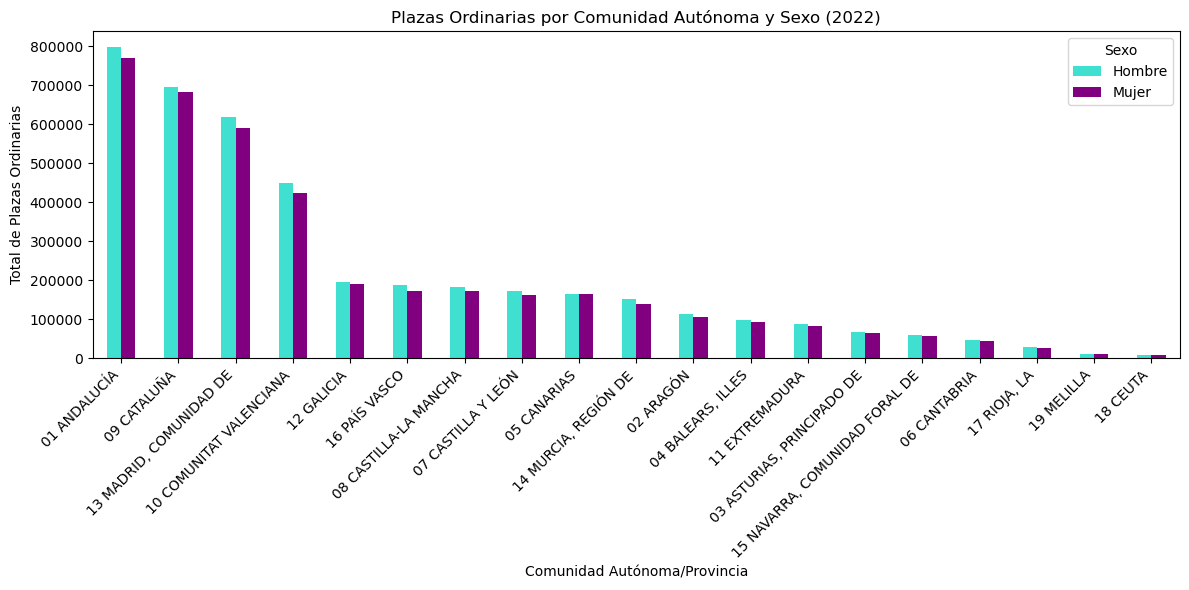

In [62]:
import matplotlib.pyplot as plt

# Sumar las plazas ordinarias por sexo y comunidad autónoma
plazas_ordinarias_2022_por_sexo_sum = plazas_ordinarias_2022.groupby(['Comunidad autónoma/provincia', 'Sexo'])['Total plazas matriculaciones'].sum().unstack()

# Calcular la suma total de plazas ordinarias por comunidad autónoma
plazas_ordinarias_2022_por_sexo_sum['Total'] = plazas_ordinarias_2022_por_sexo_sum.sum(axis=1)

# Ordenar los datos por el total de plazas ordinarias para hombres y mujeres
plazas_ordinarias_2022_por_sexo_sum_sorted = plazas_ordinarias_2022_por_sexo_sum.sort_values(by='Total', ascending=False)

# Eliminar la columna 'Total' ya que solo es un auxiliar para ordenar los datos
plazas_ordinarias_2022_por_sexo_sum_sorted.drop(columns='Total', inplace=True)

# Definir colores para hombres y mujeres
color_hombre = 'turquoise'
color_mujer = 'purple'

# Graficar el total de plazas ordinarias por comunidad autónoma y sexo para el año 2022 (ordenado)
plazas_ordinarias_2022_por_sexo_sum_sorted.plot(kind='bar', figsize=(12, 6), stacked=False, color=[color_hombre, color_mujer])

plt.title('Plazas Ordinarias por Comunidad Autónoma y Sexo (2022)')
plt.xlabel('Comunidad Autónoma/Provincia')
plt.ylabel('Total de Plazas Ordinarias')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo', labels=['Hombre', 'Mujer'])
plt.tight_layout()
plt.show()

En todas las comunidades autónomas vemos que existen más plazas asignadas en este caso Ordinarias, para los hombres. Importante destacar que las comunidades autónomas que más matriculación registra son:

- ANDALUCÍA
- CATALUÑA
- MADRID
- VALENCIA
- GALICIA
  
Pasamos a visualizas las plazas especiales...

## Visualización total plazas especiales por Comunidad y Sexo, 2022

In [63]:
# Filtrar los datos para el año 2022 y tipo de plazas (Especiales), excluyendo Barcelona, Tarragona, Lleida y Girona
plazas_especiales_2022_filtered = Plazas[(Plazas['Año finalización curso'] == 2022) & 
                                         (Plazas['Tipo de plazas'] == 'Especiales') & 
                                         (~Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))]

# Agrupar los datos por comunidad autónoma/provincia y sexo, y calcular el total de plazas matriculaciones para cada grupo
plazas_especiales_sexo_comunidad_2022 = plazas_especiales_2022_filtered.groupby(['Comunidad autónoma/provincia', 'Sexo'])['Total plazas matriculaciones'].sum()

# Mostrar los datos agrupados por comunidad autónoma/provincia y sexo
print(plazas_especiales_sexo_comunidad_2022)

Comunidad autónoma/provincia    Sexo   
01 ANDALUCÍA                    Hombres    4173
                                Mujeres    1928
02 ARAGÓN                       Hombres     423
                                Mujeres     212
03 ASTURIAS, PRINCIPADO DE      Hombres     303
                                Mujeres     125
04 BALEARS, ILLES               Hombres     556
                                Mujeres     243
05 CANARIAS                     Hombres    1386
                                Mujeres     659
06 CANTABRIA                    Hombres     159
                                Mujeres      77
07 CASTILLA Y LEÓN              Hombres     482
                                Mujeres     221
08 CASTILLA-LA MANCHA           Hombres     600
                                Mujeres     301
09 CATALUÑA                     Hombres    2727
                                Mujeres    1255
10 COMUNITAT VALENCIANA         Hombres    2603
                                Mujeres    1233


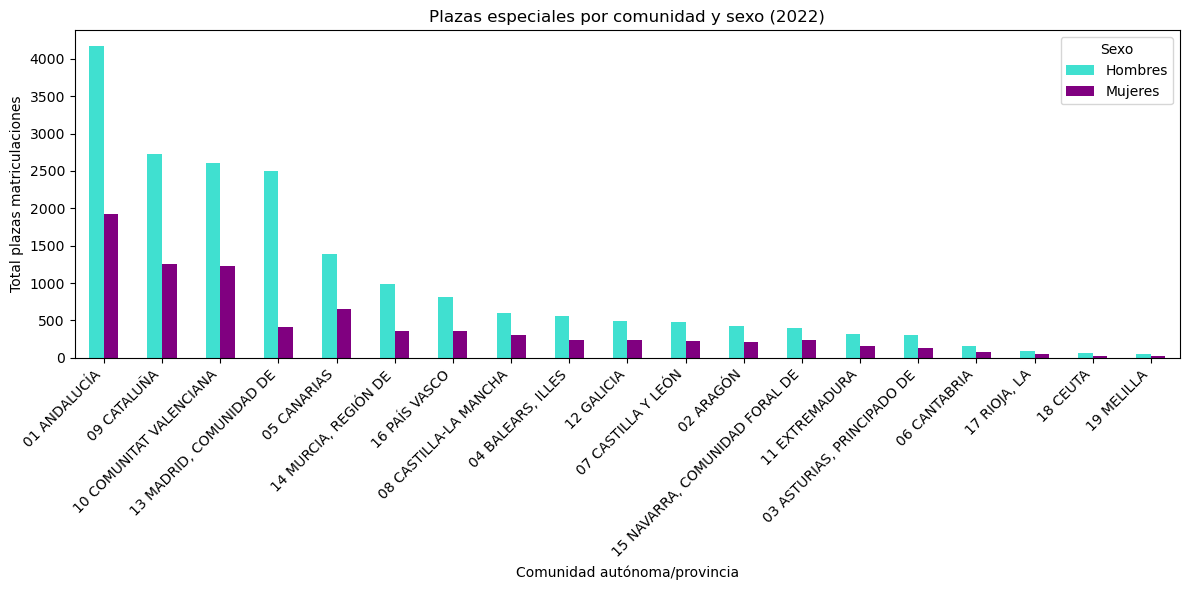

In [64]:
## Definir colores para hombres y mujeres
color_hombre = 'turquoise'
color_mujer = 'purple'

# Ordenar los datos de más a menos según el total de plazas matriculaciones por cada comunidad y sexo
plazas_especiales_sexo_comunidad_2022_sorted = plazas_especiales_sexo_comunidad_2022.unstack().sort_values(by='Hombres', ascending=False)

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos ordenados
plazas_especiales_sexo_comunidad_2022_sorted.plot(kind='bar', ax=ax, color=[color_hombre, color_mujer])

# Configurar el título y etiquetas de los ejes
ax.set_title('Plazas especiales por comunidad y sexo (2022)')
ax.set_xlabel('Comunidad autónoma/provincia')
ax.set_ylabel('Total plazas matriculaciones')

# Mostrar la leyenda
ax.legend(title='Sexo')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En este caso, el total de plazas de necesidades especiales por Comunidad nos indica que los hombres destinan casi el doble de plazas neurológicas, en comparación a las mujeres.

El top 5 de comunidades de plazas asignadas por Necesidades especiales son:

- ANDALUCÍA
- CATALUÑA
- VALENCIA
- MADRID
- CANARIAS

Las 4 primeras posiciones coinciden en el volumen total de matriculaciones con respecto a la población. Sin embargo, llama la atención el caso de Canarias, ya que, según la tabla anterior, se encuentra en la mitad de la clasificación. Es posible que intervengan otros factores, como el medio ambiente o el desarrollo de la comunidad en estos casos, entre otras cosas.

Ahora vamos a visualizar por cada una de las discapacidades que trabajamos.

## Visualización plazas discapacidad intelectual por Comunidad y Sexo, 2022

In [65]:
# Filtrar los datos para discapacidad intelectual y excluir Barcelona, Tarragona, Lleida y Girona
filtered_data = Plazas[(Plazas['Discapacidad'] == 'Intelectual') &
                       (~Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))]

# Agrupar los datos por comunidad autónoma/provincia y sexo, y calcular el total de plazas matriculaciones
grouped_data = filtered_data.groupby(['Comunidad autónoma/provincia', 'Sexo'])['Total plazas matriculaciones'].sum()

# Ordenar los datos de más a menos según el total de plazas matriculaciones
sorted_data = grouped_data.unstack().sort_values(by='Hombres', ascending=False)

# Mostrar los datos ordenados
print(sorted_data)

Sexo                            Hombres  Mujeres
Comunidad autónoma/provincia                    
01 ANDALUCÍA                       8696     5609
13 MADRID, COMUNIDAD DE            7444      760
09 CATALUÑA                        6145     4376
10 COMUNITAT VALENCIANA            4517     3072
05 CANARIAS                        3157     2082
14 MURCIA, REGIÓN DE               2197     1131
16 PAÍS VASCO                      1750     1275
08 CASTILLA-LA MANCHA              1700     1167
07 CASTILLA Y LEÓN                 1532      983
04 BALEARS, ILLES                  1172      735
02 ARAGÓN                          1030      732
11 EXTREMADURA                     1012      653
15 NAVARRA, COMUNIDAD FORAL DE      950      737
12 GALICIA                          941      720
03 ASTURIAS, PRINCIPADO DE          554      382
06 CANTABRIA                        426      297
17 RIOJA, LA                        179      146
19 MELILLA                          129      122
18 CEUTA            

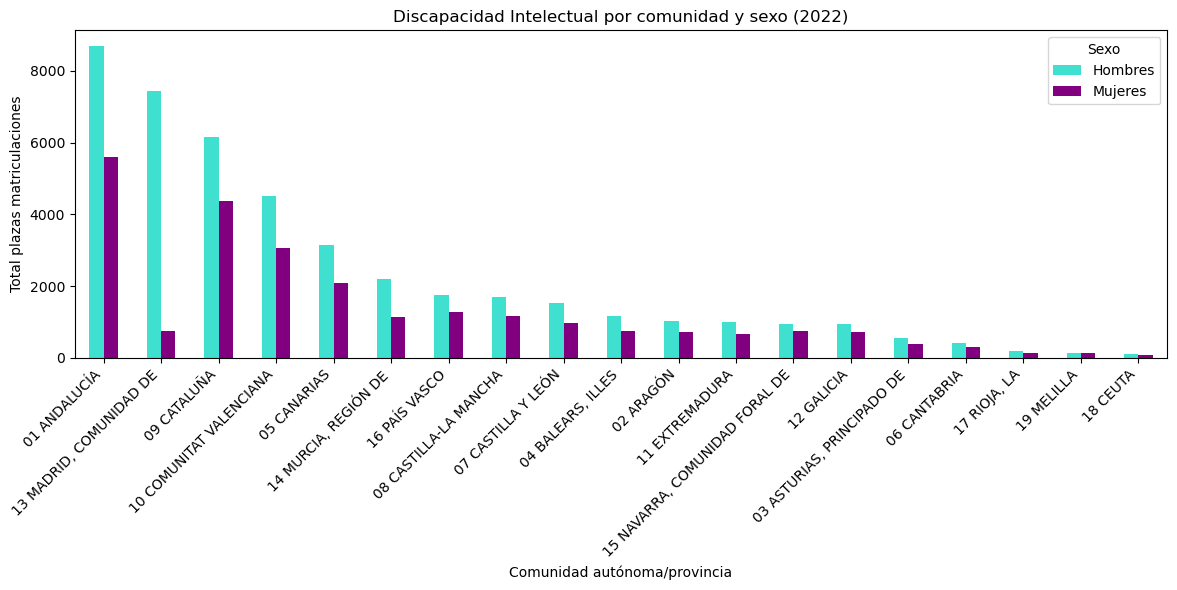

In [66]:
# Definir colores para hombres y mujeres
color_hombre = 'turquoise'
color_mujer = 'purple'

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos ordenados y especificar colores para hombres y mujeres
sorted_data.plot(kind='bar', ax=ax, color=[color_hombre, color_mujer])

# Configurar el título y etiquetas de los ejes
ax.set_title('Discapacidad Intelectual por comunidad y sexo (2022)')
ax.set_xlabel('Comunidad autónoma/provincia')
ax.set_ylabel('Total plazas matriculaciones')

# Mostrar la leyenda
ax.legend(title='Sexo')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El top 5 de discapacidad intelectual:

- ANDALUCÍA
- MADRID
- CATALUÑA
- VALENCIA
- CANARIAS

Tengo la misma sensación del gráfico anterior. Me llama la atención Madrid dónde los datos reflejan 4 veces más que las mujeres.

## Visualización plazas discapacidad Trastornos del espectro del autismo (2) por Comunidad y Sexo, 2022

In [67]:
# Filtrar los datos para el año 2022, discapacidad intelectual y excluir Barcelona, Tarragona, Lleida y Girona
filtered_data_2022 = Plazas[(Plazas['Año finalización curso'] == 2022) & 
                             (Plazas['Discapacidad'] == 'Trastornos del espectro del autismo (2)') &
                             (~Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))]

# Agrupar los datos por comunidad autónoma/provincia y sexo, y calcular el total de plazas matriculaciones
grouped_data_2022 = filtered_data_2022.groupby(['Comunidad autónoma/provincia', 'Sexo'])['Total plazas matriculaciones'].sum()

# Ordenar los datos de más a menos según el total de plazas matriculaciones
sorted_data_2022 = grouped_data_2022.unstack().sort_values(by='Hombres', ascending=False)

# Mostrar los datos ordenados
print(sorted_data_2022)

Sexo                            Hombres  Mujeres
Comunidad autónoma/provincia                    
01 ANDALUCÍA                       1928      457
09 CATALUÑA                        1423      408
10 COMUNITAT VALENCIANA            1243      317
13 MADRID, COMUNIDAD DE             823      212
05 CANARIAS                         643      165
14 MURCIA, REGIÓN DE                446       98
16 PAÍS VASCO                       400       76
04 BALEARS, ILLES                   310      101
08 CASTILLA-LA MANCHA               270       68
12 GALICIA                          263       72
07 CASTILLA Y LEÓN                  196       40
03 ASTURIAS, PRINCIPADO DE          196       55
02 ARAGÓN                           179       47
15 NAVARRA, COMUNIDAD FORAL DE      129       37
11 EXTREMADURA                      110       37
06 CANTABRIA                         54       10
17 RIOJA, LA                         41       11
18 CEUTA                             35       10
19 MELILLA          

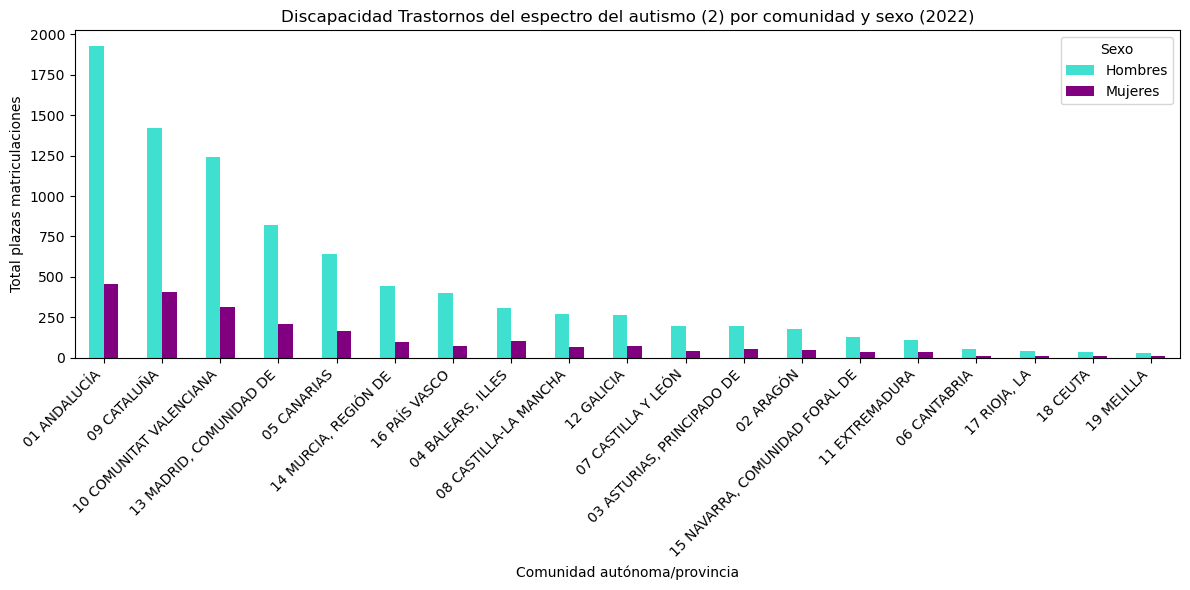

In [68]:
# Definir colores para hombres y mujeres
color_hombre = 'turquoise'
color_mujer = 'purple'

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos ordenados y especificar colores para hombres y mujeres
sorted_data_2022.plot(kind='bar', ax=ax, color=[color_hombre, color_mujer])

# Configurar el título y etiquetas de los ejes
ax.set_title('Discapacidad Trastornos del espectro del autismo (2) por comunidad y sexo (2022)')
ax.set_xlabel('Comunidad autónoma/provincia')
ax.set_ylabel('Total plazas matriculaciones')

# Mostrar la leyenda
ax.legend(title='Sexo')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En cuanto al autismo, El top 5:

- ANDALUCÍA
- CATALUÑA
- VALENCIA
- MADRID
- CANARIAS

Volvemos a repetir con Canarias en el 5 puesto y vemos que en el caso de autismo el hombre dobla los datos en relación a las mujeres.

## Visualización plazas discapacidad Trastornos graves de conducta/personalidad por Comunidad y Sexo, 2022

In [69]:
# Filtrar los datos para el año 2022, discapacidad intelectual y excluir Barcelona, Tarragona, Lleida y Girona
filtered_data_2022 = Plazas[(Plazas['Año finalización curso'] == 2022) & 
                             (Plazas['Discapacidad'] == 'Trastornos graves de conducta/personalidad') &
                             (~Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))]

# Agrupar los datos por comunidad autónoma/provincia y sexo, y calcular el total de plazas matriculaciones
grouped_data_2022 = filtered_data_2022.groupby(['Comunidad autónoma/provincia', 'Sexo'])['Total plazas matriculaciones'].sum()

# Ordenar los datos de más a menos según el total de plazas matriculaciones
sorted_data_2022 = grouped_data_2022.unstack().sort_values(by='Hombres', ascending=False)

# Mostrar los datos ordenados
print(sorted_data_2022)

Sexo                            Hombres  Mujeres
Comunidad autónoma/provincia                    
13 MADRID, COMUNIDAD DE             141       41
09 CATALUÑA                         141       35
01 ANDALUCÍA                        118       42
12 GALICIA                           57       16
14 MURCIA, REGIÓN DE                 41       12
04 BALEARS, ILLES                    31        3
02 ARAGÓN                            28       13
16 PAÍS VASCO                        28        9
06 CANTABRIA                         28        6
10 COMUNITAT VALENCIANA              24       10
08 CASTILLA-LA MANCHA                19        5
05 CANARIAS                          10        4
17 RIOJA, LA                          8        6
03 ASTURIAS, PRINCIPADO DE            4        1
18 CEUTA                              4        2
11 EXTREMADURA                        1        5
15 NAVARRA, COMUNIDAD FORAL DE        1        0
07 CASTILLA Y LEÓN                    0        0
19 MELILLA          

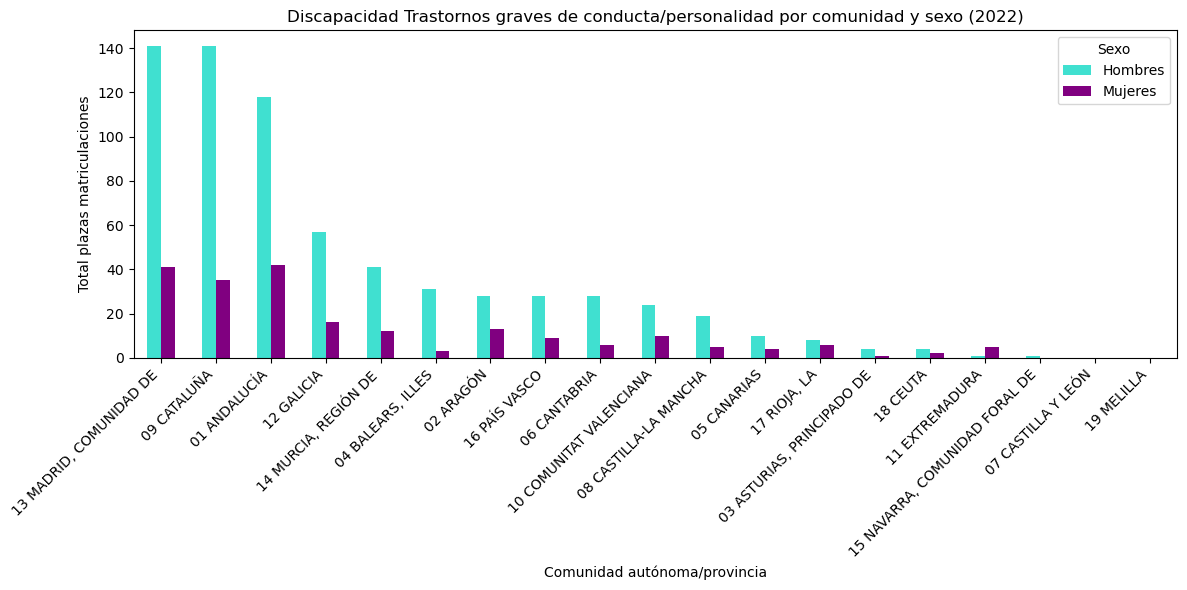

In [70]:
# Definir colores para hombres y mujeres
color_hombre = 'turquoise'
color_mujer = 'purple'

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos ordenados y especificar colores para hombres y mujeres
sorted_data_2022.plot(kind='bar', ax=ax, color=[color_hombre, color_mujer])

# Configurar el título y etiquetas de los ejes
ax.set_title('Discapacidad Trastornos graves de conducta/personalidad por comunidad y sexo (2022)')
ax.set_xlabel('Comunidad autónoma/provincia')
ax.set_ylabel('Total plazas matriculaciones')

# Mostrar la leyenda
ax.legend(title='Sexo')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Con el trastorno grave de conducta, el top 5:

- MADRID
- CATALUÑA
- ANDALUCÍA
- GALICIA
- MURCIA

En este caso si tenemos variación, y se entiende que la población no tiene tanto que ver, bueno, un poci sí pero en este caso Andalucía se encuentra en 3 posición, pero Valencia baja a mitad de la lista y sube posiciones Galicia y Murcia.

Ahora quiero mirar la evolución y la tendencia de cada discapacidad.

## Visualización evolución total discapacidad intelectual (2018-1022)

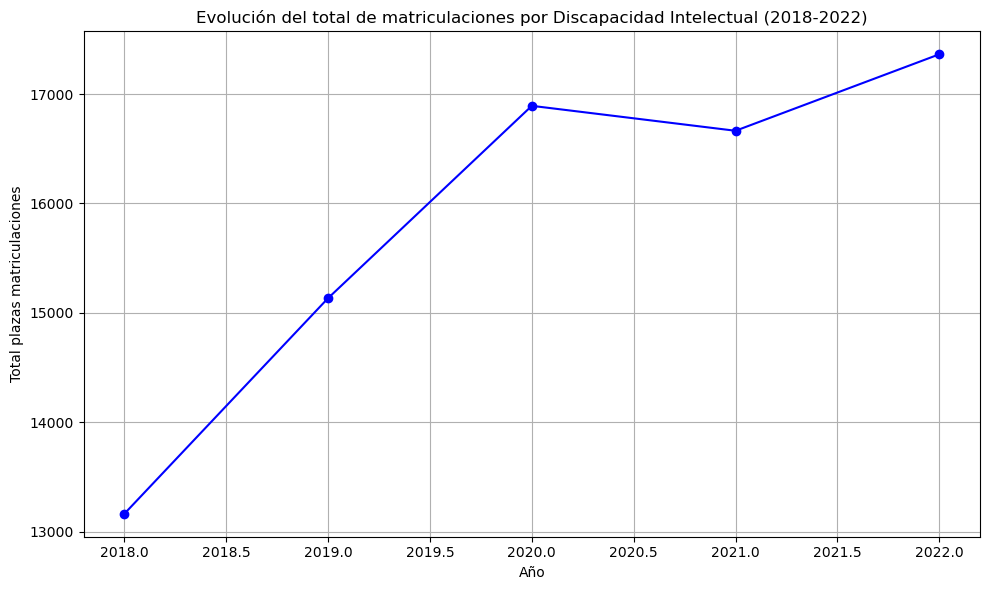

In [71]:
# Filtrar los datos para discapacidad intelectual
data_discapacidad_intelectual = Plazas[Plazas['Discapacidad'] == 'Intelectual']

# Agrupar los datos por año y calcular el total de plazas matriculaciones para cada año
grouped_data_año = data_discapacidad_intelectual.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la evolución del total de plazas matriculaciones por año
grouped_data_año.plot(kind='line', marker='o', color='b', ax=ax)

# Configurar el título y etiquetas de los ejes
ax.set_title('Evolución del total de matriculaciones por Discapacidad Intelectual (2018-2022)')
ax.set_xlabel('Año')
ax.set_ylabel('Total plazas matriculaciones')

# Mostrar la cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En este caso, se puede comprobar que existe una tendencia positiva, con lo que se indica que posiblemente haya que destinar cada año más matriculaciones a esta discapacidad.

## Visualización evolución total discapacidad Trastornos del espectro del autismo (2) (2018-1022)

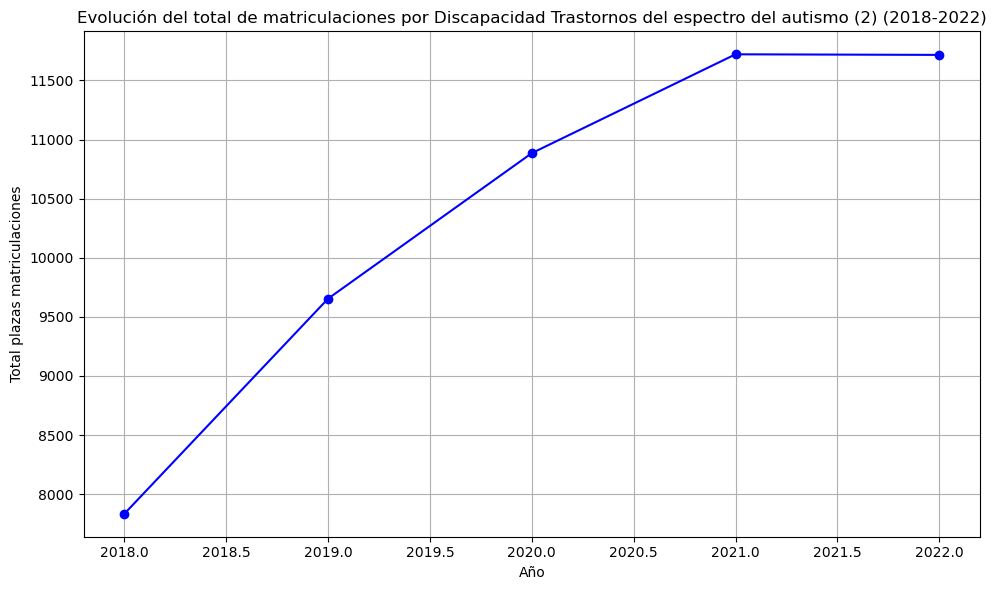

In [72]:
# Filtrar los datos para la discapacidad "Trastornos del espectro del autismo (2)"
data_discapacidad_autismo = Plazas[Plazas['Discapacidad'] == 'Trastornos del espectro del autismo (2)']

# Agrupar los datos por año y calcular el total de plazas matriculaciones para cada año
grouped_data_autismo_año = data_discapacidad_autismo.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()

# Convertir el índice a enteros
grouped_data_autismo_año.index = grouped_data_autismo_año.index.astype(int)

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la evolución del total de plazas matriculaciones por año
grouped_data_autismo_año.plot(kind='line', marker='o', color='b', ax=ax)

# Configurar el título y etiquetas de los ejes
ax.set_title('Evolución del total de matriculaciones por Discapacidad Trastornos del espectro del autismo (2) (2018-2022)')
ax.set_xlabel('Año')
ax.set_ylabel('Total plazas matriculaciones')

# Mostrar la cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el caso del autismo, se pecibe una tendencia positiva hasta 2021, que después se estabiliza. Posiblemente sea porque hace pocos años que se está implementando en España, quizás por ello la primera impresión de tendencia, y en este momento está más controlado. Es una suposición.

## Visualización evolución total discapacidad Trastornos graves de conducta/personalidad (2018-1022)

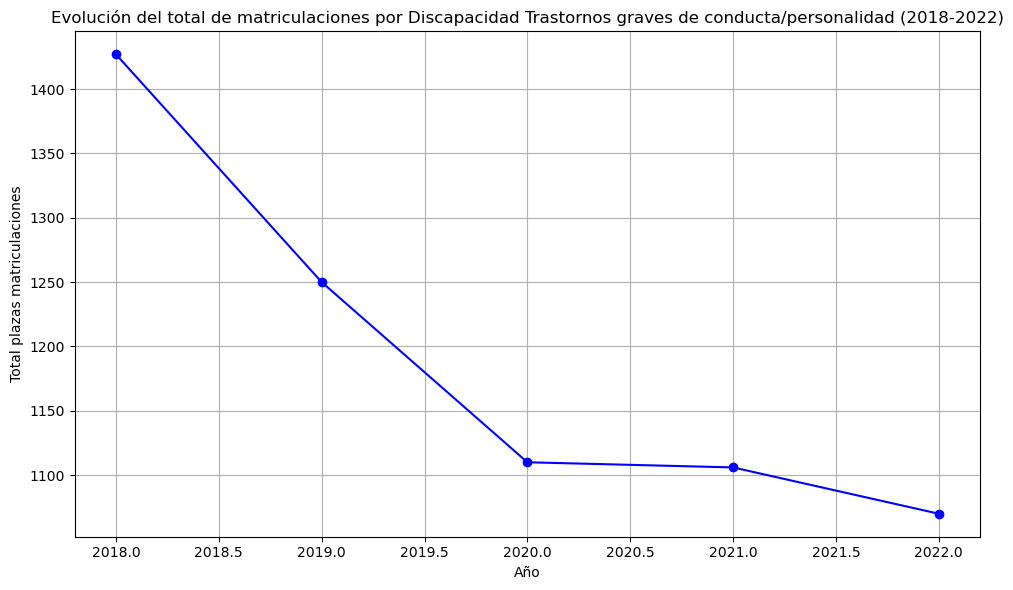

In [73]:
# Filtrar los datos para la discapacidad "Trastornos graves de conducta/personalidad"
data_discapacidad_graves_conducta = Plazas[Plazas['Discapacidad'] == 'Trastornos graves de conducta/personalidad']

# Agrupar los datos por año y calcular el total de plazas matriculaciones para cada año
grouped_data_graves_conducta_año = data_discapacidad_graves_conducta.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()

# Convertir el índice a enteros
grouped_data_graves_conducta_año.index = grouped_data_graves_conducta_año.index.astype(int)

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la evolución del total de plazas matriculaciones por año
grouped_data_graves_conducta_año.plot(kind='line', marker='o', color='b', ax=ax)

# Configurar el título y etiquetas de los ejes
ax.set_title('Evolución del total de matriculaciones por Discapacidad Trastornos graves de conducta/personalidad (2018-2022)')
ax.set_xlabel('Año')
ax.set_ylabel('Total plazas matriculaciones')

# Mostrar la cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La evolución del trastorno grave de conducta, la tendencia es negativa, hasta 2020 que parece que se estabiliza y sigue bajando. Hay que tener en cuenta que el total de plazas destinadas para cada discapacidades son muy diferentes y en cada una de sus visualizaciones se percibe las tendencias, pero voy a gruparlas en un gráfico con una escala de plazas de matriculaciones iguales para cada una de ellas, y se verá de diferente manera.

## Visualización evolución matriculaciones por discapacidad (2018-2022)

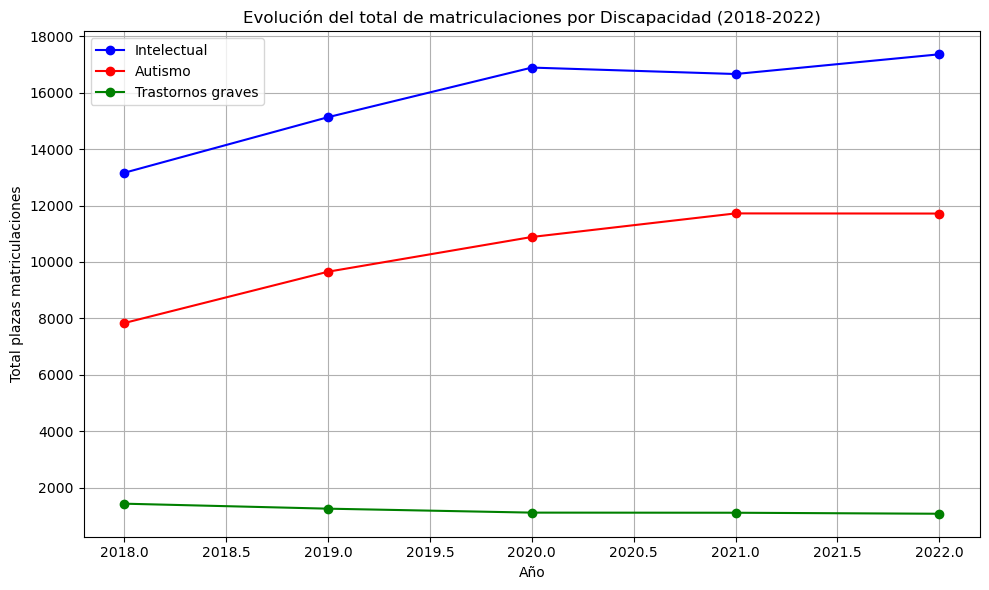

In [74]:
# Filtrar los datos para cada tipo de discapacidad
data_intelectual = Plazas[Plazas['Discapacidad'] == 'Intelectual']
data_autismo = Plazas[Plazas['Discapacidad'] == 'Trastornos del espectro del autismo (2)']
data_graves = Plazas[Plazas['Discapacidad'] == 'Trastornos graves de conducta/personalidad']

# Agrupar los datos por año y calcular el total de plazas matriculaciones para cada año
grouped_data_intelectual = data_intelectual.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()
grouped_data_autismo = data_autismo.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()
grouped_data_graves = data_graves.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la evolución del total de plazas matriculaciones por año para cada tipo de discapacidad
grouped_data_intelectual.plot(kind='line', marker='o', color='b', label='Intelectual', ax=ax)
grouped_data_autismo.plot(kind='line', marker='o', color='r', label='Autismo', ax=ax)
grouped_data_graves.plot(kind='line', marker='o', color='g', label='Trastornos graves', ax=ax)

# Configurar el título y etiquetas de los ejes
ax.set_title('Evolución del total de matriculaciones por Discapacidad (2018-2022)')
ax.set_xlabel('Año')
ax.set_ylabel('Total plazas matriculaciones')

# Agregar la leyenda
ax.legend()

# Mostrar la cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

De este modo, no sorprende tanto los datos, ya que en trastornos graves se mantiene constante, en los otros dos casao se percibe lo mismo, pero siguen habiendo más casos de plazas especiales destinadas a discapacidad intelectual.

Tenía ganas de mostrar un mapa gráfico nacional por cada discapacidad, para que visualmente se viera como están distribuidas el total de plazas.

## VISUALIZACIÓN MAPA ESPAÑA DISCAPACIDAD INTELECTUAL 2022

In [75]:
# Filtrar los datos para el año 2022, discapacidad intelectual y excluir Barcelona, Tarragona, Lleida y Girona
filtered_data_2022 = Plazas[(Plazas['Año finalización curso'] == 2022) & 
                             (Plazas['Discapacidad'] == 'Intelectual') &
                             (~Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))]

# Agrupar los datos por comunidad autónoma/provincia y sexo, y calcular el total de plazas matriculaciones
filtro_intelectual = filtered_data_2022.groupby(['Comunidad autónoma/provincia'])['Total plazas matriculaciones'].sum()

# Ordenar los datos de forma descendente
filtro_intelectual_ordenado = filtro_intelectual.sort_values(ascending=False)

# Mostrar los datos ordenados
print(filtro_intelectual_ordenado)

Comunidad autónoma/provincia
01 ANDALUCÍA                      3556
10 COMUNITAT VALENCIANA           2242
09 CATALUÑA                       1975
13 MADRID, COMUNIDAD DE           1687
05 CANARIAS                       1223
14 MURCIA, REGIÓN DE               751
16 PAÍS VASCO                      661
08 CASTILLA-LA MANCHA              539
07 CASTILLA Y LEÓN                 467
15 NAVARRA, COMUNIDAD FORAL DE     464
02 ARAGÓN                          368
04 BALEARS, ILLES                  354
12 GALICIA                         321
11 EXTREMADURA                     320
03 ASTURIAS, PRINCIPADO DE         172
06 CANTABRIA                       138
17 RIOJA, LA                        71
19 MELILLA                          42
18 CEUTA                            37
Name: Total plazas matriculaciones, dtype: int64


In [76]:
# Guardar los datos en un archivo CSV
filtro_intelectual.to_csv("matriculaciones_discapacidad_intelectual_2022.csv", header=True)

In [ ]:
import pandas as pd
import plotly.express as px
import json
from urllib.request import urlopen

# Cargar los datos desde el archivo CSV
datos_csv = "matriculaciones_discapacidad_intelectual_2022.csv"
df = pd.read_csv(datos_csv)

# Definir el diccionario de mapeo de nombres
mapeo_nombres = {
    '01 ANDALUCÍA': 'Andalucía',
    '02 ARAGÓN': 'Aragón',
    '03 ASTURIAS, PRINCIPADO DE': 'Principado de Asturias',
    '04 BALEARS, ILLES': 'Islas Baleares',
    '05 CANARIAS': 'Islas Canarias',
    '06 CANTABRIA': 'Cantabria',
    '07 CASTILLA Y LEÓN': 'Castilla y León',
    '08 CASTILLA-LA MANCHA': 'Castilla-La Mancha',
    '09 CATALUÑA': 'Cataluña',
    '10 COMUNITAT VALENCIANA': 'Comunidad Valenciana',
    '11 EXTREMADURA': 'Extremadura',
    '12 GALICIA': 'Galicia',
    '13 MADRID, COMUNIDAD DE': 'Comunidad de Madrid',
    '14 MURCIA, REGIÓN DE': 'Región de Murcia',
    '15 NAVARRA, COMUNIDAD FORAL DE': 'Comunidad Foral de Navarra',
    '16 PAÍS VASCO': 'País Vasco',
    '17 RIOJA, LA': 'La Rioja',
    '18 CEUTA': 'Ceuta',
    '19 MELILLA': 'Melilla'
}

# Aplicar el mapeo al DataFrame
df['Comunidad autónoma/provincia'] = df['Comunidad autónoma/provincia'].map(mapeo_nombres)

# URL del archivo GeoJSON que contiene las geometrías de las comunidades autónomas de España
url_geojson_espana = "https://raw.githubusercontent.com/R-CoderDotCom/data/main/shapefile_spain/spain.geojson"

# Cargar el GeoJSON desde la URL
with urlopen(url_geojson_espana) as response:
    geojson_espana = json.load(response)

# Crear el mapa coroplético con dimensiones más grandes
fig = px.choropleth_mapbox(df, 
                           geojson=geojson_espana, 
                           locations='Comunidad autónoma/provincia', 
                           featureidkey="properties.name",
                           color='Total plazas matriculaciones',
                           color_continuous_scale="Viridis",
                           range_color=(0, max(df['Total plazas matriculaciones'])),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 40.4168, "lon": -3.7038},
                           opacity=0.7,
                           labels={'Total plazas matriculaciones':'Total de matriculaciones'},
                           title='Total de Matriculaciones por Comunidad de Discapacidad Intelectual en 2022',
                           width=1200, height=800  # ajustar el ancho y alto del gráfico
                          )

# Mostrar el mapa
fig.show()

## VISUALIZACIÓN MAPA ESPAÑA DISCAPACIDAD Trastornos del espectro del autismo (2) 2022

In [77]:
# Filtrar los datos para el año 2022, discapacidad Trastornos del espectro del autismo (2) y excluir Barcelona, Tarragona, Lleida y Girona
filtered_data_2022 = Plazas[(Plazas['Año finalización curso'] == 2022) & 
                             (Plazas['Discapacidad'] == 'Trastornos del espectro del autismo (2)') &
                             (~Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))]

# Agrupar los datos por comunidad autónoma/provincia y sexo, y calcular el total de plazas matriculaciones
filtro_autismo = filtered_data_2022.groupby(['Comunidad autónoma/provincia'])['Total plazas matriculaciones'].sum()

# Ordenar los datos de forma ascendente (de menos a más)
filtro_autismo_ordenado_ascendente = filtro_autismo.sort_values(ascending=False)

# Mostrar los datos ordenados de forma ascendente
print(filtro_autismo_ordenado_ascendente)

Comunidad autónoma/provincia
01 ANDALUCÍA                      2385
09 CATALUÑA                       1831
10 COMUNITAT VALENCIANA           1560
13 MADRID, COMUNIDAD DE           1035
05 CANARIAS                        808
14 MURCIA, REGIÓN DE               544
16 PAÍS VASCO                      476
04 BALEARS, ILLES                  411
08 CASTILLA-LA MANCHA              338
12 GALICIA                         335
03 ASTURIAS, PRINCIPADO DE         251
07 CASTILLA Y LEÓN                 236
02 ARAGÓN                          226
15 NAVARRA, COMUNIDAD FORAL DE     166
11 EXTREMADURA                     147
06 CANTABRIA                        64
17 RIOJA, LA                        52
18 CEUTA                            45
19 MELILLA                          37
Name: Total plazas matriculaciones, dtype: int64


In [78]:
# Guardar los datos en un archivo CSV
filtro_autismo.to_csv("matriculaciones_discapacidad_autismo_2022.csv", header=True)

In [ ]:
# Cargar los datos desde el archivo CSV
datos_csv = "matriculaciones_discapacidad_autismo_2022.csv"
df = pd.read_csv(datos_csv)

# Definir el diccionario de mapeo de nombres
mapeo_nombres = {
     '01 ANDALUCÍA': 'Andalucía',
    '02 ARAGÓN': 'Aragón',
    '03 ASTURIAS, PRINCIPADO DE': 'Principado de Asturias',
    '04 BALEARS, ILLES': 'Islas Baleares',
    '05 CANARIAS': 'Islas Canarias',
    '06 CANTABRIA': 'Cantabria',
    '07 CASTILLA Y LEÓN': 'Castilla y León',
    '08 CASTILLA-LA MANCHA': 'Castilla-La Mancha',
    '09 CATALUÑA': 'Cataluña',
    '10 COMUNITAT VALENCIANA': 'Comunidad Valenciana',
    '11 EXTREMADURA': 'Extremadura',
    '12 GALICIA': 'Galicia',
    '13 MADRID, COMUNIDAD DE': 'Comunidad de Madrid',
    '14 MURCIA, REGIÓN DE': 'Región de Murcia',
    '15 NAVARRA, COMUNIDAD FORAL DE': 'Comunidad Foral de Navarra',
    '16 PAÍS VASCO': 'País Vasco',
    '17 RIOJA, LA': 'La Rioja',
    '18 CEUTA': 'Ceuta',
    '19 MELILLA': 'Melilla'
}

# Aplicar el mapeo al DataFrame
df['Comunidad autónoma/provincia'] = df['Comunidad autónoma/provincia'].map(mapeo_nombres)

# URL del archivo GeoJSON que contiene las geometrías de las comunidades autónomas de España
url_geojson_espana = "https://raw.githubusercontent.com/R-CoderDotCom/data/main/shapefile_spain/spain.geojson"

# Cargar el GeoJSON desde la URL
with urlopen(url_geojson_espana) as response:
    geojson_espana = json.load(response)

# Crear el mapa coroplético
fig = px.choropleth_mapbox(df, 
                           geojson=geojson_espana, 
                           locations='Comunidad autónoma/provincia', 
                           featureidkey="properties.name",
                           color='Total plazas matriculaciones',
                           color_continuous_scale="Viridis",
                           range_color=(0, max(df['Total plazas matriculaciones'])),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 40.4168, "lon": -3.7038},
                           opacity=0.7,
                           labels={'Total plazas matriculaciones':'Total de matriculaciones'},
                           title='Total de Matriculaciones por Comunidad de Discapacidad Trastornos del espectro del autismo (2) en 2022',
                           width=1200, height=800
                          )

# Mostrar el mapa
fig.show()

## VISUALIZACIÓN MAPA ESPAÑA DISCAPACIDAD Trastornos graves de conducta/personalidad' 2022

In [79]:
# Filtrar los datos para el año 2022, discapacidad Trastornos graves de conducta/personalidad y excluir Barcelona, Tarragona, Lleida y Girona
filtered_data_2022 = Plazas[(Plazas['Año finalización curso'] == 2022) & 
                             (Plazas['Discapacidad'] == 'Trastornos graves de conducta/personalidad') &
                             (~Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))]

# Agrupar los datos por comunidad autónoma/provincia y sexo, y calcular el total de plazas matriculaciones
filtro_trastornos = filtered_data_2022.groupby(['Comunidad autónoma/provincia'])['Total plazas matriculaciones'].sum()

# Ordenar los datos de forma ascendente (de menos a más)
filtro_trastornos_ordenado_ascendente = filtro_trastornos.sort_values(ascending=False)

# Mostrar los datos ordenados de forma ascendente
print(filtro_trastornos_ordenado_ascendente)

Comunidad autónoma/provincia
13 MADRID, COMUNIDAD DE           182
09 CATALUÑA                       176
01 ANDALUCÍA                      160
12 GALICIA                         73
14 MURCIA, REGIÓN DE               53
02 ARAGÓN                          41
16 PAÍS VASCO                      37
10 COMUNITAT VALENCIANA            34
06 CANTABRIA                       34
04 BALEARS, ILLES                  34
08 CASTILLA-LA MANCHA              24
05 CANARIAS                        14
17 RIOJA, LA                       14
11 EXTREMADURA                      6
18 CEUTA                            6
03 ASTURIAS, PRINCIPADO DE          5
15 NAVARRA, COMUNIDAD FORAL DE      1
07 CASTILLA Y LEÓN                  0
19 MELILLA                          0
Name: Total plazas matriculaciones, dtype: int64


In [80]:
# Guardar los datos en un archivo CSV
filtro_trastornos.to_csv("matriculaciones_discapacidad_trastornos_2022.csv", header=True)

In [ ]:
# Cargar los datos desde el archivo CSV
datos_csv = "matriculaciones_discapacidad_trastornos_2022.csv"
df = pd.read_csv(datos_csv)

# Definir el diccionario de mapeo de nombres
mapeo_nombres = {
     '01 ANDALUCÍA': 'Andalucía',
    '02 ARAGÓN': 'Aragón',
    '03 ASTURIAS, PRINCIPADO DE': 'Principado de Asturias',
    '04 BALEARS, ILLES': 'Islas Baleares',
    '05 CANARIAS': 'Islas Canarias',
    '06 CANTABRIA': 'Cantabria',
    '07 CASTILLA Y LEÓN': 'Castilla y León',
    '08 CASTILLA-LA MANCHA': 'Castilla-La Mancha',
    '09 CATALUÑA': 'Cataluña',
    '10 COMUNITAT VALENCIANA': 'Comunidad Valenciana',
    '11 EXTREMADURA': 'Extremadura',
    '12 GALICIA': 'Galicia',
    '13 MADRID, COMUNIDAD DE': 'Comunidad de Madrid',
    '14 MURCIA, REGIÓN DE': 'Región de Murcia',
    '15 NAVARRA, COMUNIDAD FORAL DE': 'Comunidad Foral de Navarra',
    '16 PAÍS VASCO': 'País Vasco',
    '17 RIOJA, LA': 'La Rioja',
    '18 CEUTA': 'Ceuta',
    '19 MELILLA': 'Melilla'
}

# Aplicar el mapeo al DataFrame
df['Comunidad autónoma/provincia'] = df['Comunidad autónoma/provincia'].map(mapeo_nombres)

# URL del archivo GeoJSON que contiene las geometrías de las comunidades autónomas de España
url_geojson_espana = "https://raw.githubusercontent.com/R-CoderDotCom/data/main/shapefile_spain/spain.geojson"

# Cargar el GeoJSON desde la URL
with urlopen(url_geojson_espana) as response:
    geojson_espana = json.load(response)

# Crear el mapa coroplético
fig = px.choropleth_mapbox(df, 
                           geojson=geojson_espana, 
                           locations='Comunidad autónoma/provincia', 
                           featureidkey="properties.name",
                           color='Total plazas matriculaciones',
                           color_continuous_scale="Viridis",
                           range_color=(0, max(df['Total plazas matriculaciones'])),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 40.4168, "lon": -3.7038},
                           opacity=0.7,
                           labels={'Total plazas matriculaciones':'Total de matriculaciones'},
                           title='Total de Matriculaciones por Comunidad de Discapacidad Trastornos graves de conducta/personalidad en 2022',
                           width=1200, height=800
                          )

# Mostrar el mapa
fig.show()

Lo que sorprende es que sin valorar las plazas Ordinales asignadas por comunidad, si visualizo el tamaño de cada comunidad se entiende que es posible que deberian haber más casos en Andalucía, Castilla i León i Castilla la Mancha, pero en ninguno de los tres gráficos se visualiza. Sólo coincide Andalucía.

A partir de aquí, empezamos a trabajar con el dataset reducido, voy a trabajar con los datos de Catalunya, por provincia. Quiero visualizar los datos en Cataluña.

In [81]:
# 1. Filtrar los datos originales
datos_filtrados = Plazas[
    (Plazas['Año finalización curso'].between(2018, 2022)) & 
    ((Plazas['Tipo de plazas'] == 'Ordinarias') | (Plazas['Tipo de plazas'] == 'Especiales')) & 
    (Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))
]

# 2. Seleccionar columnas específicas
columnas_seleccionadas = [
    'Año finalización curso', 'Tipo de plazas', 'Comunidad autónoma/provincia', 
    'Discapacidad', 'Sexo', 'Total plazas matriculaciones'
]

# 3. Crear el nuevo DataFrame
Cataluña = datos_filtrados[columnas_seleccionadas]

# 1. Filtrar los datos originales para el año 2022
datos_filtrados_2022 = Plazas[
    (Plazas['Año finalización curso'] == 2022) & 
    ((Plazas['Tipo de plazas'] == 'Ordinarias') | (Plazas['Tipo de plazas'] == 'Especiales')) & 
    (Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona']))
]

# 2. Seleccionar columnas específicas
columnas_seleccionadas = [
    'Año finalización curso', 'Tipo de plazas', 'Comunidad autónoma/provincia', 
    'Discapacidad', 'Sexo', 'Total plazas matriculaciones'
]

# 3. Crear el nuevo DataFrame
df_cat_2022 = datos_filtrados_2022[columnas_seleccionadas]

# Mostrar las primeras filas del nuevo DataFrame
df_cat_2022


,Año finalización curso,Tipo de plazas,Comunidad autónoma/provincia,Discapacidad,Sexo,Total plazas matriculaciones
18,2022,Ordinarias,Barcelona,No,Hombres,502282
19,2022,Ordinarias,Barcelona,No,Mujeres,483460
20,2022,Ordinarias,Girona,No,Hombres,68615
21,2022,Ordinarias,Girona,No,Mujeres,65570
22,2022,Ordinarias,Lleida,No,Hombres,49595
23,2022,Ordinarias,Lleida,No,Mujeres,62730
24,2022,Ordinarias,Tarragona,No,Hombres,74124
25,2022,Ordinarias,Tarragona,No,Mujeres,69667
100,2022,Especiales,Barcelona,Intelectual,Hombres,891
101,2022,Especiales,Barcelona,Intelectual,Mujeres,618


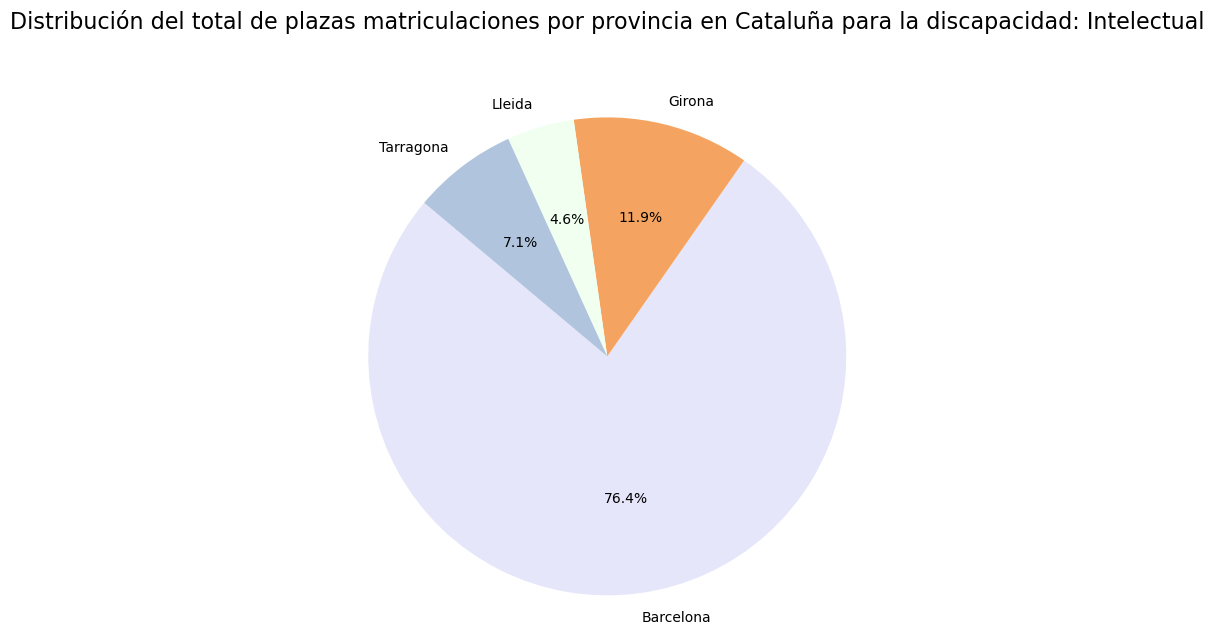

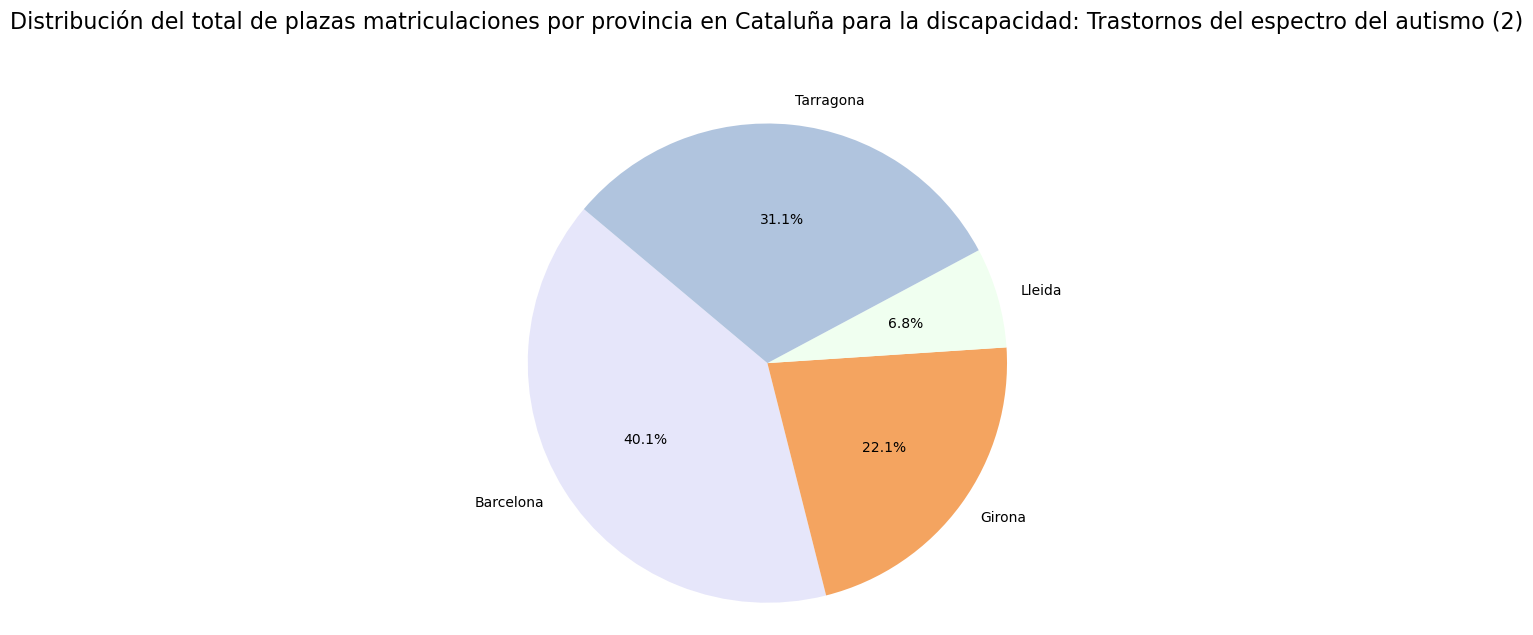

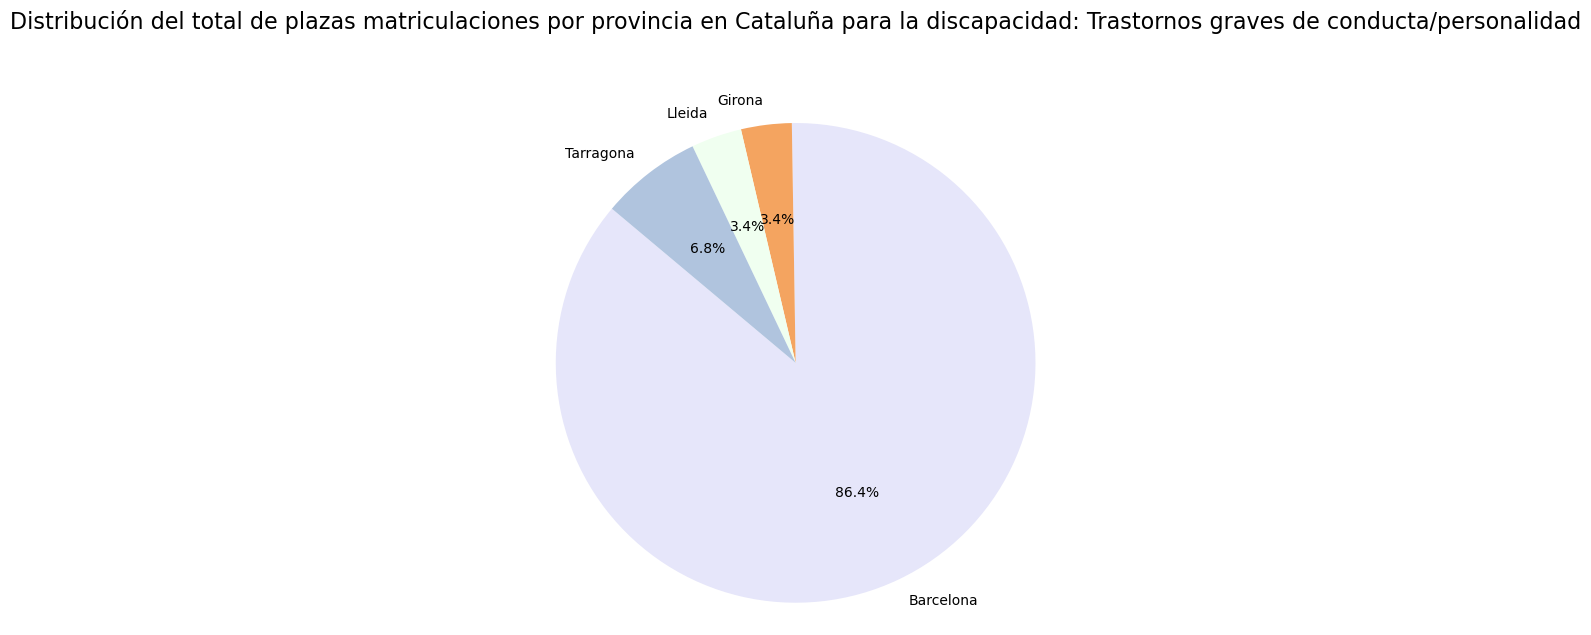

In [82]:
# Filtrar los datos para el año de finalización del curso 2022 y excluir los valores "No" de la discapacidad
datos_2022_sin_no = Cataluña[(Cataluña['Año finalización curso'] == 2022) & (Cataluña['Discapacidad'] != 'No')]

# Agrupar los datos por discapacidad y comunidad autónoma/provincia, y sumar el total de plazas matriculaciones
total_plazas_por_discapacidad = datos_2022_sin_no.groupby(['Discapacidad', 'Comunidad autónoma/provincia'])['Total plazas matriculaciones'].sum()

# Definir la paleta de colores personalizada
colores = {'Barcelona': 'Lavender',  # Lila
           'Girona': 'SandyBrown',         # Turquesa
           'Lleida': 'HoneyDew',             # Amarillo
           'Tarragona': 'LightSteelBlue'}      # Verde pistacho

# Crear tres gráficos circulares, uno para cada discapacidad
for discapacidad in total_plazas_por_discapacidad.index.levels[0]:
    # Filtrar los datos para la discapacidad específica
    datos_discapacidad = total_plazas_por_discapacidad.loc[discapacidad]
    
    # Crear la figura y los ejes del gráfico circular
    plt.figure(figsize=(6, 6))
    
    # Graficar el gráfico circular
    plt.pie(datos_discapacidad, labels=datos_discapacidad.index, colors=[colores.get(x, 'blue') for x in datos_discapacidad.index], autopct='%1.1f%%', startangle=140)
    
    # Configurar el título del gráfico
    plt.suptitle(f'Distribución del total de plazas matriculaciones por provincia en Cataluña para la discapacidad: {discapacidad}', y=1.05, fontsize=16)
    
    # Mostrar el gráfico
    plt.axis('equal')  # Aspecto igual para que sea circular
    plt.tight_layout()
    plt.show()

Está claro que Barcelona es la provincia que más casos tiene y de calle, se entiende que por población.

En Barcelona a 2023 tenemos una población de 5.795.594.
En Tarragona a 2023 tenemos una población de 138260.
En Lleida a 2023 tenemos una población de 448676.
En Girona a 2023 tenemos una población de 201615.
Así que está claro porque salen estos resultados.

Voy a calcular la tendencia en cataluña de las tres discapacidaes.

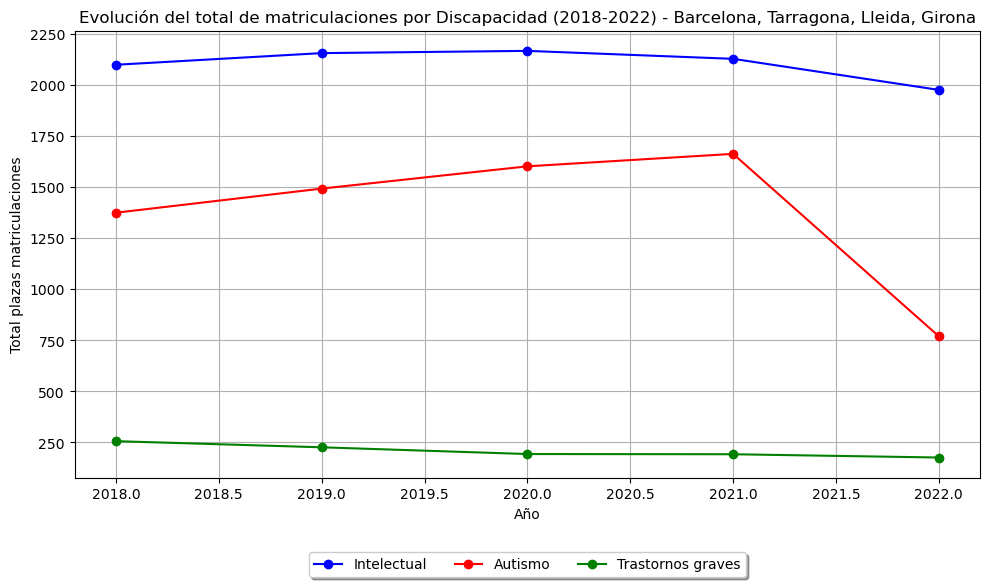

In [83]:
# Filtrar los datos para las tres discapacidades y las provincias específicas desde 2018 hasta 2022
data_intelectual = Plazas[(Plazas['Discapacidad'] == 'Intelectual') & 
                          (Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona'])) & 
                          (Plazas['Año finalización curso'] >= 2018) & 
                          (Plazas['Año finalización curso'] <= 2022)]

data_autismo = Plazas[(Plazas['Discapacidad'] == 'Trastornos del espectro del autismo (2)') & 
                      (Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona'])) & 
                      (Plazas['Año finalización curso'] >= 2018) & 
                      (Plazas['Año finalización curso'] <= 2022)]

data_graves = Plazas[(Plazas['Discapacidad'] == 'Trastornos graves de conducta/personalidad') & 
                     (Plazas['Comunidad autónoma/provincia'].isin(['Barcelona', 'Tarragona', 'Lleida', 'Girona'])) & 
                     (Plazas['Año finalización curso'] >= 2018) & 
                     (Plazas['Año finalización curso'] <= 2022)]

# Agrupar los datos por año y calcular el total de plazas matriculaciones para cada año
grouped_data_intelectual = data_intelectual.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()
grouped_data_autismo = data_autismo.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()
grouped_data_graves = data_graves.groupby('Año finalización curso')['Total plazas matriculaciones'].sum()

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la evolución del total de plazas matriculaciones por año para cada tipo de discapacidad
grouped_data_intelectual.plot(kind='line', marker='o', color='b', label='Intelectual', ax=ax)
grouped_data_autismo.plot(kind='line', marker='o', color='r', label='Autismo', ax=ax)
grouped_data_graves.plot(kind='line', marker='o', color='g', label='Trastornos graves', ax=ax)

# Configurar el título y etiquetas de los ejes
ax.set_title('Evolución del total de matriculaciones por Discapacidad (2018-2022) - Barcelona, Tarragona, Lleida, Girona')
ax.set_xlabel('Año')
ax.set_ylabel('Total plazas matriculaciones')

# Agregar la leyenda debajo del gráfico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

# Mostrar la cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Trastornos graves de conducta se mantiene constante, como los datos nacionales, el autismo, existe la misma tendencia que la nacional pero de 2021 a 2022 decrece, así que son buenos datos. Y en el caso de la discapacidad intelectual existe también la misma tendencia positiva hasta 2020, y a posterior la tendencia es negativa, así que también son buenas noticias.

Volvemos al dataset a nivel nacional, pero sólo vamos a contemplar los datos de 2022, ya que para aplicar el modelo de clasificación, no creo que le resulte fácil o coherente agrupar los datos repetidos temporalmente.

In [84]:
# Filtrar las filas que tienen el año de finalización del curso igual a 2022
plazas_2022 = Plazas[Plazas['Año finalización curso'] == 2022]

# Eliminar registros de Barcelona, Girona, Lleida y Tarragona
plazas_2022 = plazas_2022[~plazas_2022['Comunidad autónoma/provincia'].isin(['Barcelona', 'Girona', 'Lleida', 'Tarragona'])]
plazas_2022

,Año finalización curso,Tipo de plazas,Comunidad autónoma/provincia,Discapacidad,Sexo,Total plazas matriculaciones
0,2022,Ordinarias,01 ANDALUCÍA,No,Hombres,798099
1,2022,Ordinarias,01 ANDALUCÍA,No,Mujeres,770165
2,2022,Ordinarias,02 ARAGÓN,No,Hombres,112841
3,2022,Ordinarias,02 ARAGÓN,No,Mujeres,105110
4,2022,Ordinarias,"03 ASTURIAS, PRINCIPADO DE",No,Hombres,66721
...,...,...,...,...,...,...
179,2022,Especiales,19 MELILLA,Intelectual,Mujeres,21
180,2022,Especiales,19 MELILLA,Trastornos del espectro del autismo (2),Hombres,28
181,2022,Especiales,19 MELILLA,Trastornos del espectro del autismo (2),Mujeres,9
182,2022,Especiales,19 MELILLA,Trastornos graves de conducta/personalidad,Hombres,0


Nos encontramos con una tabla que tiene 2 columnas numéricas, y el resto son categóricas. Primero vamos a transformar las columnas en numéricas para poder aplicar correctamente los modelos. Para la columna de Comunidad autónoma voy a aplicar un one-hot encoding, y para el resto de columnas aplico Ordinal Encoder.

In [85]:
from sklearn.preprocessing import OrdinalEncoder


# Creamos el codificador ordinal
encoder = OrdinalEncoder()

# Aplicamos el encoder a la columna 'Discapacidad' y asignamos los valores codificados directamente
plazas_2022['Discapacidad_encoded'] = encoder.fit_transform(plazas_2022[['Discapacidad']])

# Creamos el codificador ordinal
encoder = OrdinalEncoder()

# Aplicamos el encoder a la columna 'Tipo de plazas' y asignamos los valores codificados directamente
plazas_2022['Tipo de plazas_encoded'] = encoder.fit_transform(plazas_2022[['Tipo de plazas']])

# Creamos el codificador ordinal para Sexo
encoder_sexo = OrdinalEncoder()

# Aplicamos el encoder a la columna 'Sexo' y asignamos los valores codificados
plazas_2022['Sexo_encoded'] = encoder_sexo.fit_transform(plazas_2022[['Sexo']])


In [86]:
# Aplicamos one-hot encoding
comunidad_autonoma_encoded = pd.get_dummies(plazas_2022['Comunidad autónoma/provincia'], prefix='Comunidad')

# Convertimos los valores True y False a 1 y 0
comunidad_autonoma_encoded = comunidad_autonoma_encoded.astype(int)

# Concatenamos el DataFrame original con las columnas codificadas
plazas_2022 = pd.concat([plazas_2022, comunidad_autonoma_encoded], axis=1)

# Eliminamos la columna original 'Comunidad autónoma/provincia'
plazas_2022.drop(columns=['Comunidad autónoma/provincia'], inplace=True)

In [87]:
# Seleccionar solo las columnas numéricas
columnas_numericas = ['Total plazas matriculaciones','Discapacidad_encoded','Tipo de plazas_encoded','Sexo_encoded','Comunidad_01 ANDALUCÍA','Comunidad_02 ARAGÓN',	'Comunidad_10 COMUNITAT VALENCIANA','Comunidad_11 EXTREMADURA', 'Comunidad_12 GALICIA',	'Comunidad_13 MADRID, COMUNIDAD DE', 'Comunidad_14 MURCIA, REGIÓN DE', 'Comunidad_15 NAVARRA, COMUNIDAD FORAL DE', 'Comunidad_16 PAÍS VASCO',	'Comunidad_17 RIOJA, LA', 'Comunidad_18 CEUTA',	'Comunidad_19 MELILLA']

# Crear el nuevo DataFrame con las columnas numéricas y la columna categórica
df = plazas_2022[columnas_numericas]

In [88]:
df.describe().round(2)

,Total plazas matriculaciones,Discapacidad_encoded,Tipo de plazas_encoded,Sexo_encoded,Comunidad_01 ANDALUCÍA,Comunidad_02 ARAGÓN,Comunidad_10 COMUNITAT VALENCIANA,Comunidad_11 EXTREMADURA,Comunidad_12 GALICIA,"Comunidad_13 MADRID, COMUNIDAD DE","Comunidad_14 MURCIA, REGIÓN DE","Comunidad_15 NAVARRA, COMUNIDAD FORAL DE",Comunidad_16 PAÍS VASCO,"Comunidad_17 RIOJA, LA",Comunidad_18 CEUTA,Comunidad_19 MELILLA
count,152.00,152.00,152.00,152.0,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00
mean,53424.60,1.50,0.25,0.5,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
std,147575.75,1.12,0.43,0.5,0.22,0.22,0.22,0.22,0.22,0.22,0.22,0.22,0.22,0.22,0.22,0.22
min,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.25,0.75,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,180.00,1.50,0.00,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3942.75,2.25,0.25,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,798099.00,3.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Voy a comprobar la distribución las las variables aplicando la prueba shapiro.

In [89]:
from scipy.stats import shapiro
from tabulate import tabulate
import pandas as pd

# Creamos una lista para almacenar los resultados de la prueba
resultados = []

# Iteramos sobre cada columna en el DataFrame 'df'
for columna in df.columns:
    stat, p = shapiro(df[columna])
        
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        resultado = "Probablemente sigue una distribución normal"
    else:
        resultado = "Probablemente no sigue una distribución normal"
        
    resultados.append([columna, stat, p, resultado])

# Imprimimos los resultados en formato tabular
tabla_resultados = tabulate(resultados, headers=["Variable", "Estadística", "Valor-p", "Resultado"], tablefmt="pretty")
print(tabla_resultados)

+------------------------------------------+---------------------+------------------------+------------------------------------------------+
|                 Variable                 |     Estadística     |        Valor-p         |                   Resultado                    |
+------------------------------------------+---------------------+------------------------+------------------------------------------------+
|       Total plazas matriculaciones       | 0.4126462936401367  | 3.6409250302638865e-22 | Probablemente no sigue una distribución normal |
|           Discapacidad_encoded           | 0.8557678461074829  | 6.636678012705843e-11  | Probablemente no sigue una distribución normal |
|          Tipo de plazas_encoded          | 0.5382982492446899  | 6.314177223407553e-20  | Probablemente no sigue una distribución normal |
|               Sexo_encoded               |  0.636405348777771  | 7.867311497269396e-18  | Probablemente no sigue una distribución normal |
|          Co

Y se confirma que no tiene una distribución normal. Así que voy a graficarlas.

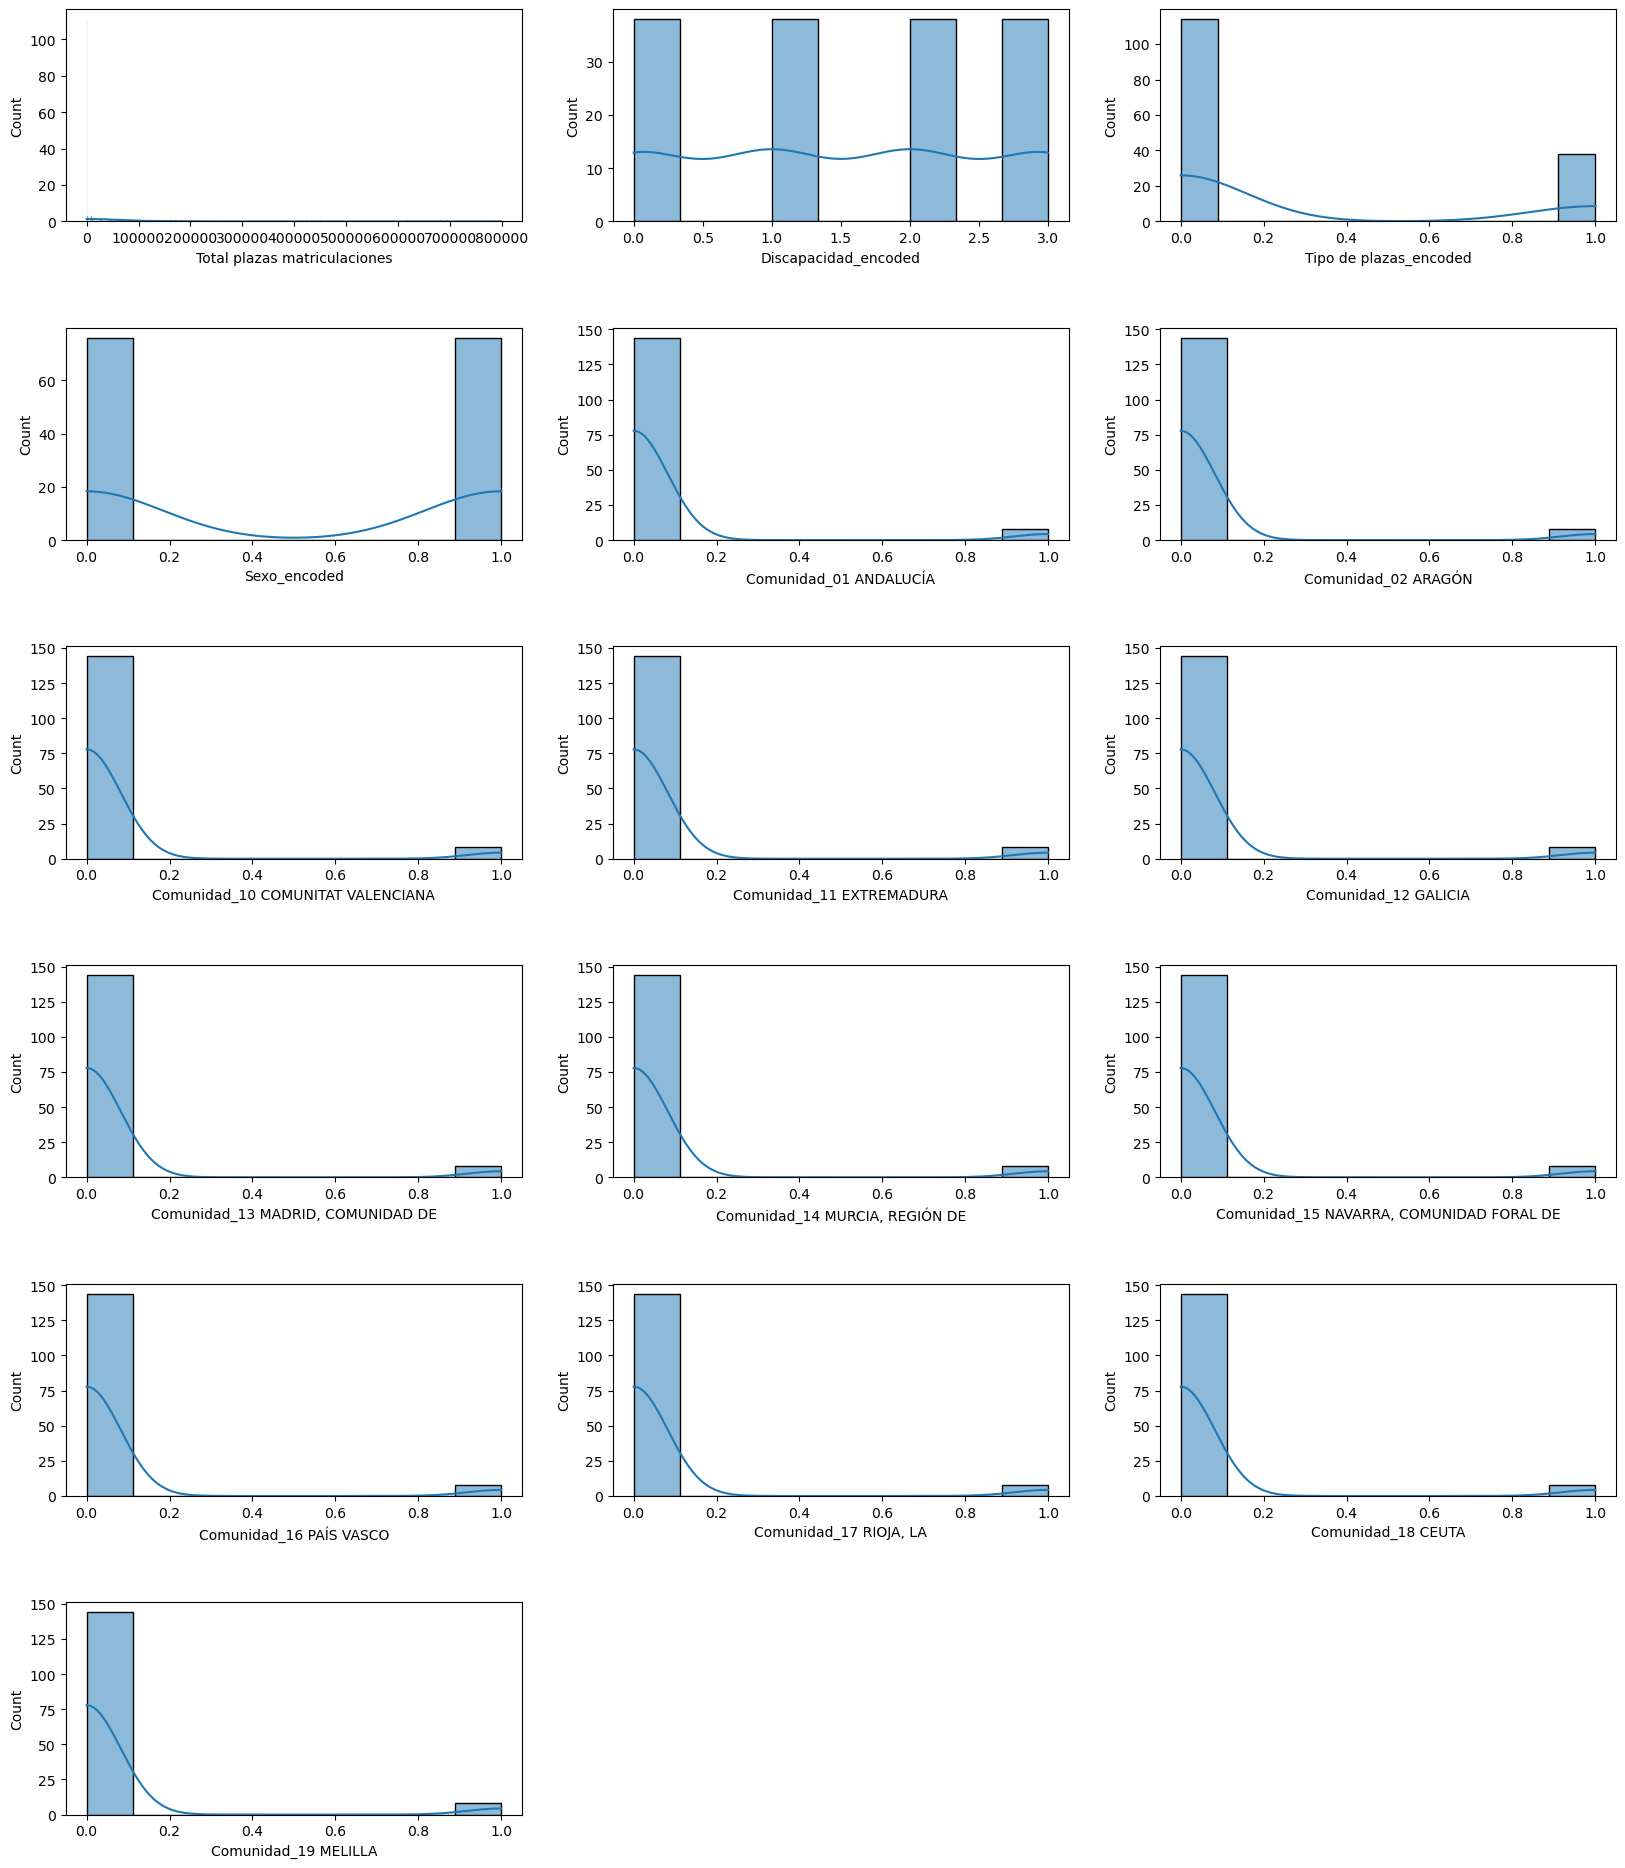

In [90]:
import seaborn as sns

plt.figure(figsize=(20, 40))

for columna in columnas_numericas:
  
    plt.subplot(10, 3, df.columns.get_loc(columna) + 1)
    sns.histplot(data=df[columna],kde=True)
    plt.xlabel(columna)
    
    plt.subplots_adjust(hspace=0.5)
    
    plt.show

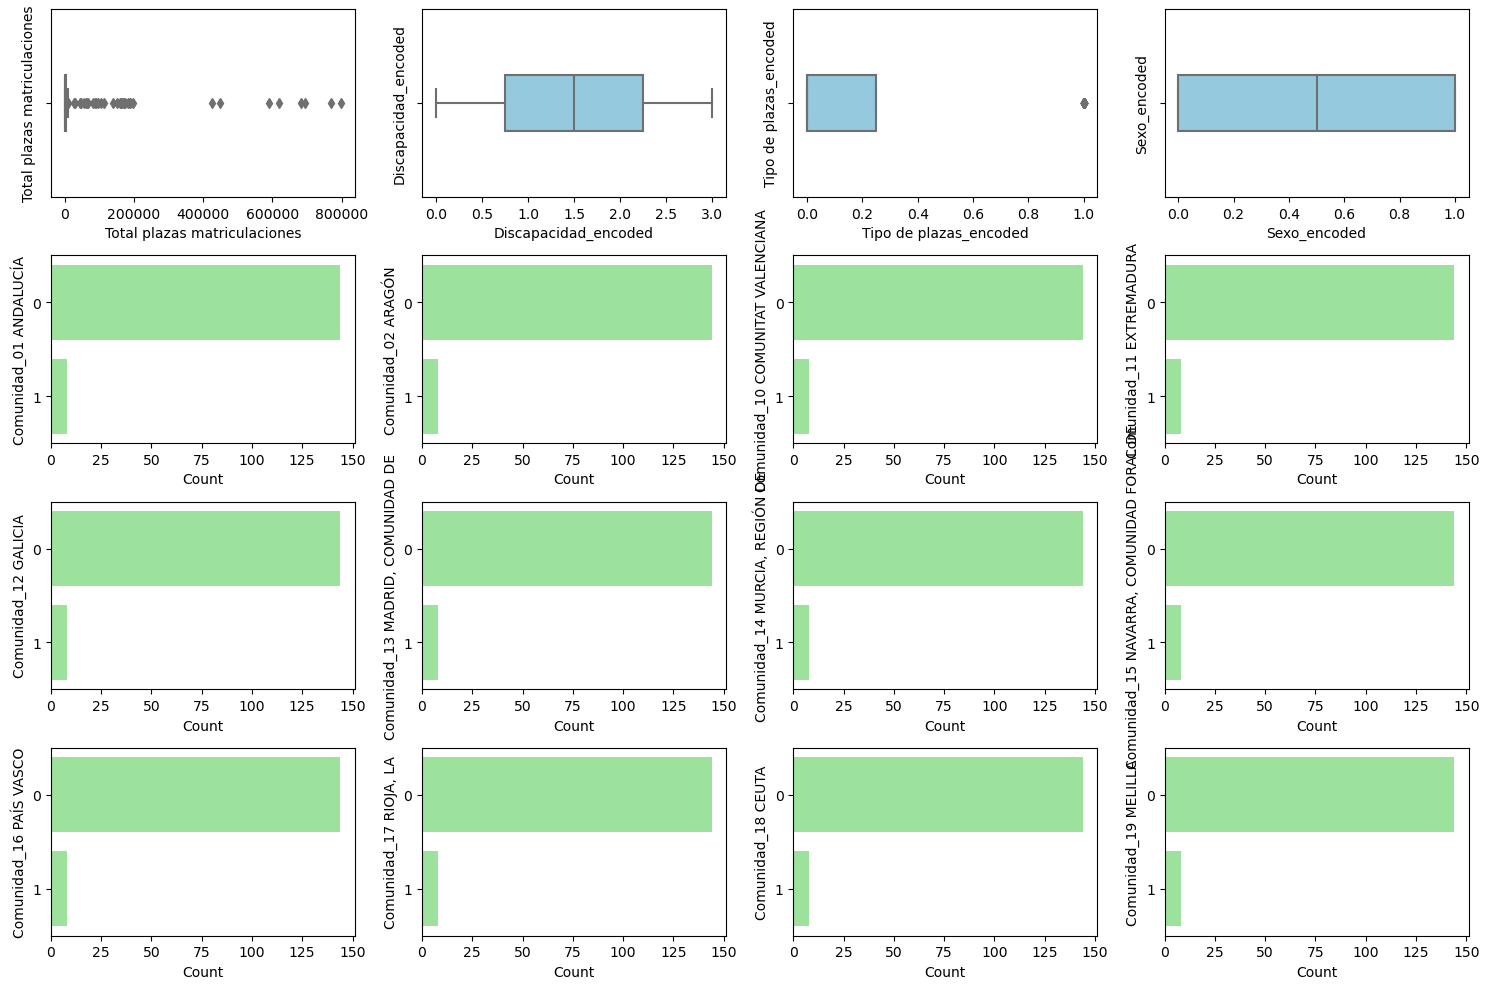

In [91]:
# Definir el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada columna del DataFrame
for i, columna in enumerate(df.columns):
    # Crear un subplot para cada variable
    plt.subplot(4, 4, i+1)
    
    # Si la variable es numérica, crea un boxplot
    if df[columna].dtype in ['float64', 'int64']:
        sns.boxplot(x=df[columna], orient='v', width=0.3, color='skyblue')
        plt.ylabel(columna, fontsize=10)
    # Si la variable es categórica, crea un countplot
    else:
        sns.countplot(y=df[columna], color='lightgreen')
        plt.xlabel('Count', fontsize=10)
        plt.ylabel(columna, fontsize=10)

plt.tight_layout()
plt.show()

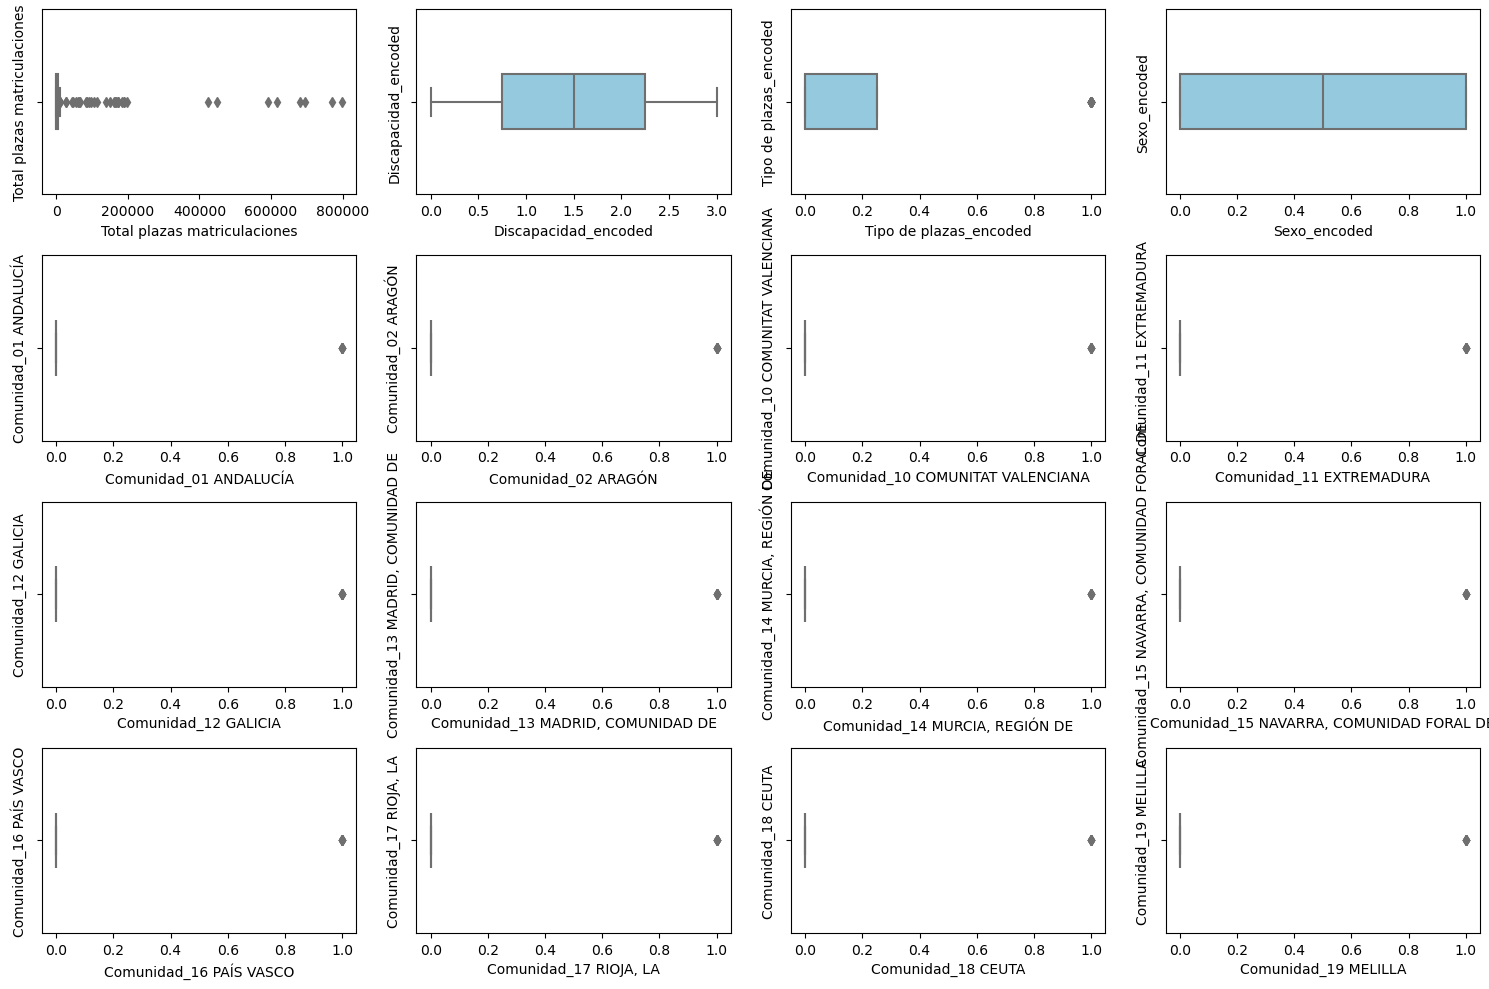

In [92]:
# Definir el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada columna del DataFrame
for i, columna in enumerate(df.columns):
    # Crear un subplot para cada variable
    plt.subplot(4, 4, i+1)
    
    # Crear un boxplot para la variable actual
    sns.boxplot(x=df[columna], orient='v', width=0.3, color='skyblue')
    plt.ylabel(columna, fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

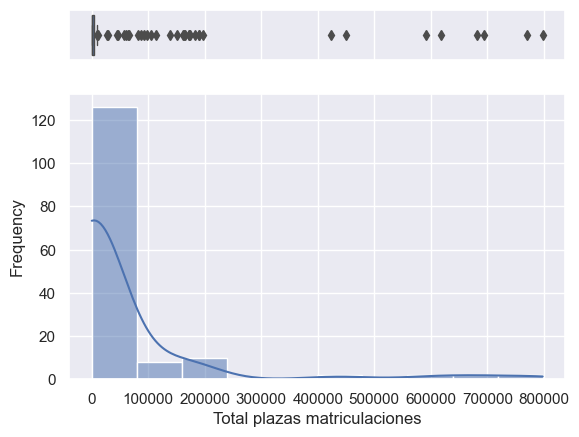

<Figure size 800x500 with 0 Axes>

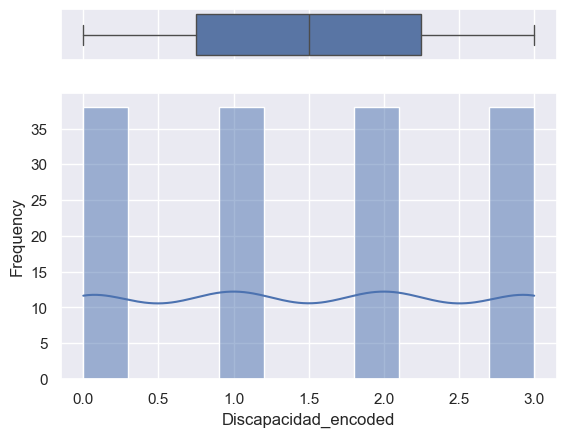

<Figure size 800x500 with 0 Axes>

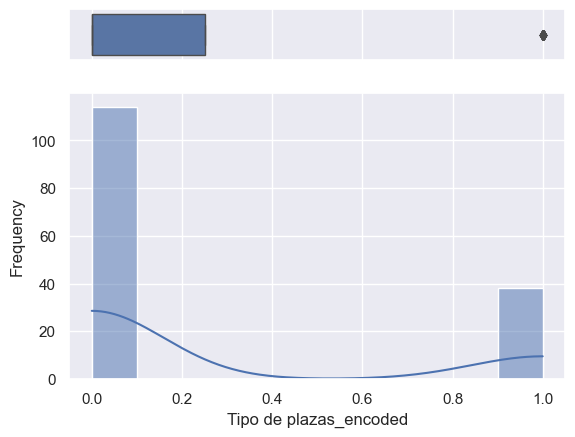

<Figure size 800x500 with 0 Axes>

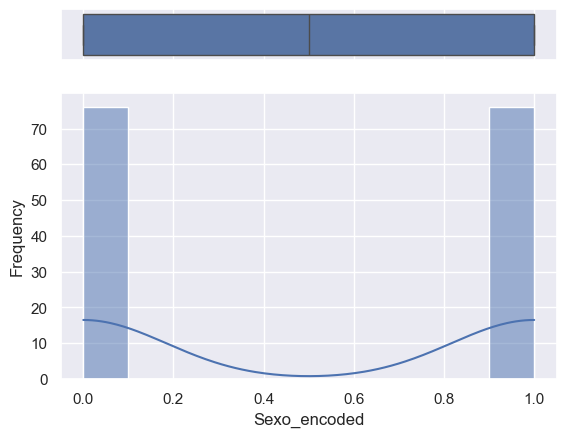

<Figure size 800x500 with 0 Axes>

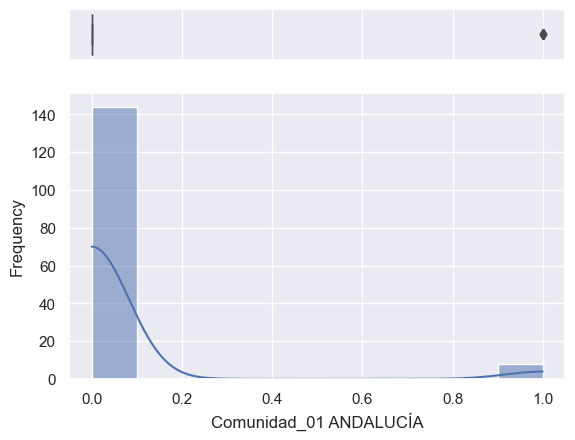

<Figure size 800x500 with 0 Axes>

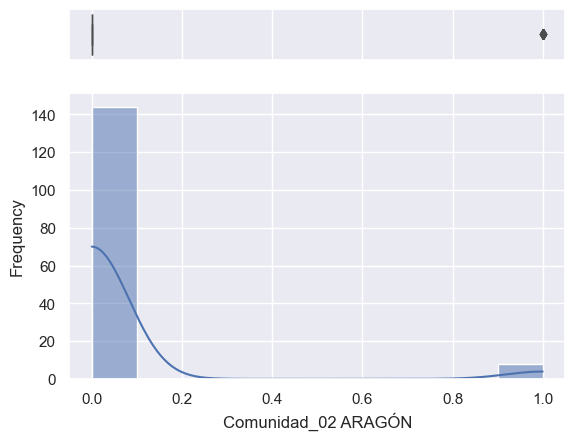

<Figure size 800x500 with 0 Axes>

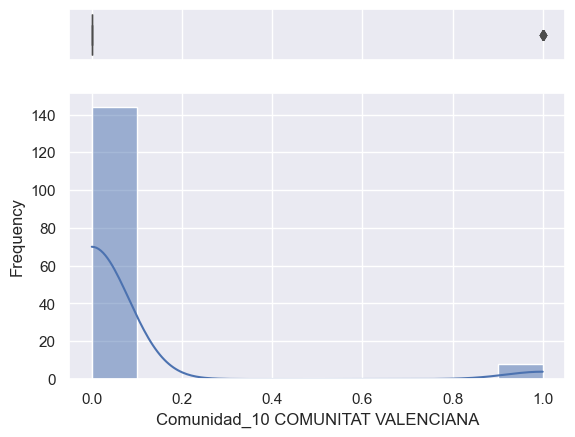

<Figure size 800x500 with 0 Axes>

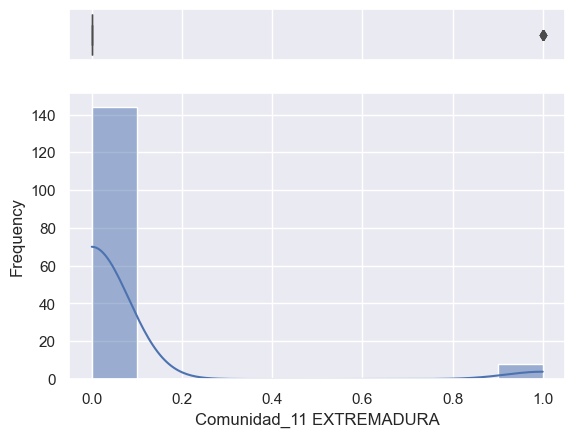

<Figure size 800x500 with 0 Axes>

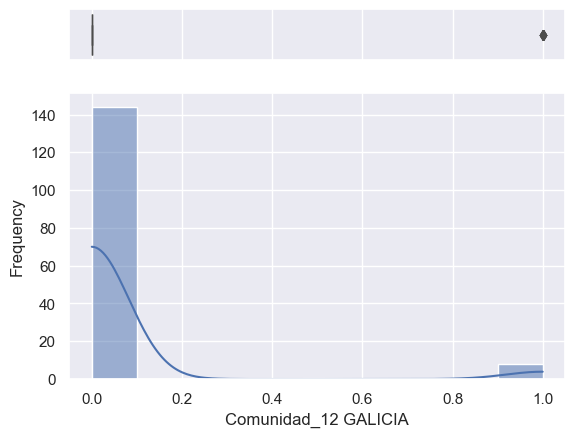

<Figure size 800x500 with 0 Axes>

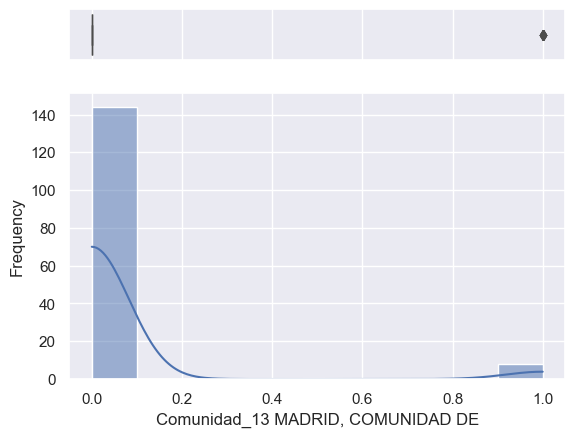

<Figure size 800x500 with 0 Axes>

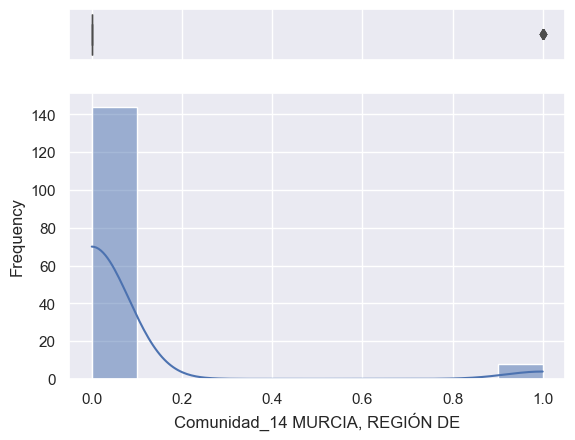

<Figure size 800x500 with 0 Axes>

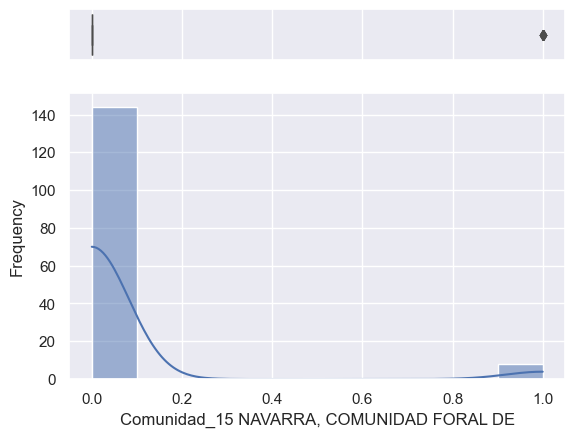

<Figure size 800x500 with 0 Axes>

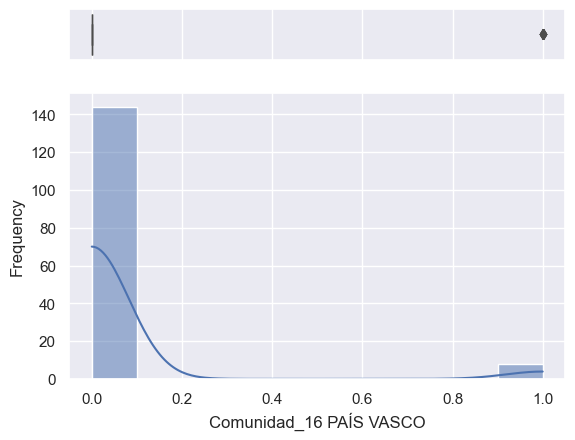

<Figure size 800x500 with 0 Axes>

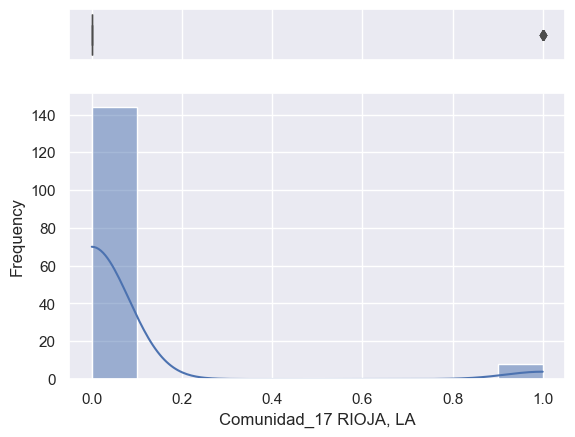

<Figure size 800x500 with 0 Axes>

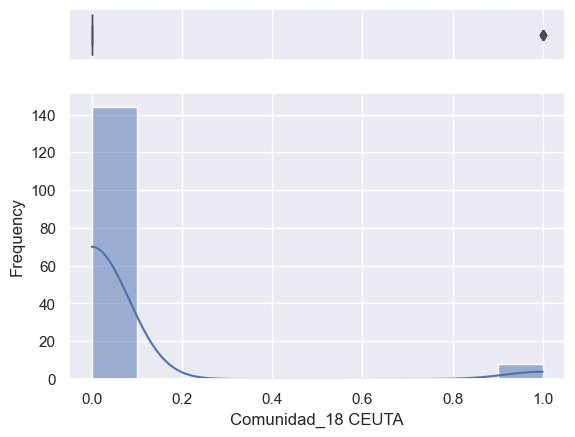

<Figure size 800x500 with 0 Axes>

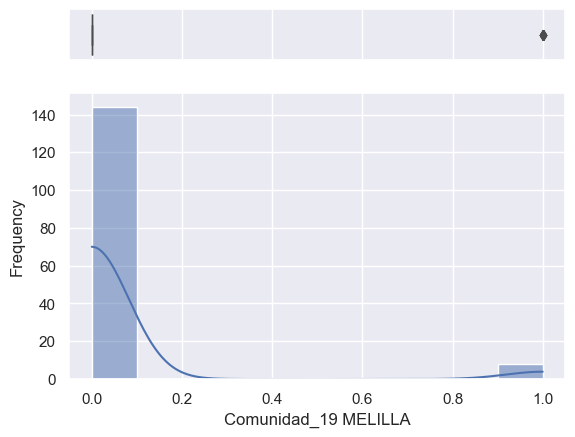

In [93]:
import matplotlib.pyplot as plt


for i in columnas_numericas:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = df[df[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel=i, ylabel='Frequency')

    # Mostrar los gráficos

Los datos no siguen una distribución normal(Gaussiana). Y en las variables Discapacidad_encoded, Sexo_encoded no presentan Outliers, así que voy a aplicar para el escalado MinMaxScaler. Para las variables que tienen Outliers que son, Total Plazas matriculaciones, Tipo de plazas_encoded, 'Comunidad_01 ANDALUCÍA','Comunidad_02 ARAGÓN', 'Comunidad_10 COMUNITAT VALENCIANA','Comunidad_11 EXTREMADURA', 'Comunidad_12 GALICIA', 'Comunidad_13 MADRID, COMUNIDAD DE', 'Comunidad_14 MURCIA, REGIÓN DE', 'Comunidad_15 NAVARRA, COMUNIDAD FORAL DE', 'Comunidad_16 PAÍS VASCO', 'Comunidad_17 RIOJA, LA', 'Comunidad_18 CEUTA', 'Comunidad_19 MELILLA', aplicaré RobustScaler.

In [94]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Selecciona las columnas numéricas que deseas escalar
columns_minmax = [ 'Discapacidad_encoded', 'Sexo_encoded']
columns_robust = ['Total plazas matriculaciones', 'Tipo de plazas_encoded', 'Comunidad_01 ANDALUCÍA','Comunidad_02 ARAGÓN','Comunidad_10 COMUNITAT VALENCIANA','Comunidad_11 EXTREMADURA', 'Comunidad_12 GALICIA',	'Comunidad_13 MADRID, COMUNIDAD DE', 'Comunidad_14 MURCIA, REGIÓN DE', 'Comunidad_15 NAVARRA, COMUNIDAD FORAL DE', 'Comunidad_16 PAÍS VASCO',	'Comunidad_17 RIOJA, LA', 'Comunidad_18 CEUTA',	'Comunidad_19 MELILLA']

# Crea una instancia de MinMaxScaler y RobustScaler
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Ajusta y transforma los datos seleccionados con MinMaxScaler
df[columns_minmax] = minmax_scaler.fit_transform(df[columns_minmax])

# Ajusta y transforma los datos seleccionados con RobustScaler
df[columns_robust] = robust_scaler.fit_transform(df[columns_robust])
df

,Total plazas matriculaciones,Discapacidad_encoded,Tipo de plazas_encoded,Sexo_encoded,Comunidad_01 ANDALUCÍA,Comunidad_02 ARAGÓN,Comunidad_10 COMUNITAT VALENCIANA,Comunidad_11 EXTREMADURA,Comunidad_12 GALICIA,"Comunidad_13 MADRID, COMUNIDAD DE","Comunidad_14 MURCIA, REGIÓN DE","Comunidad_15 NAVARRA, COMUNIDAD FORAL DE",Comunidad_16 PAÍS VASCO,"Comunidad_17 RIOJA, LA",Comunidad_18 CEUTA,Comunidad_19 MELILLA
0,203.940958,0.333333,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,196.801278,0.333333,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.795144,0.333333,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.819169,0.333333,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.007284,0.333333,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.040639,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180,-0.038850,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
181,-0.043706,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
182,-0.046006,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
df_scaler = df

Consideré hacer una PCA, y los valores me los reducía a una dimensión, pero luego tenía dificultades para graficar los resultados. Así que finalmente he preferido omitir la PCA, y aplicar el modelo Kmeans para todos los datos.

In [96]:
!pip install kneed

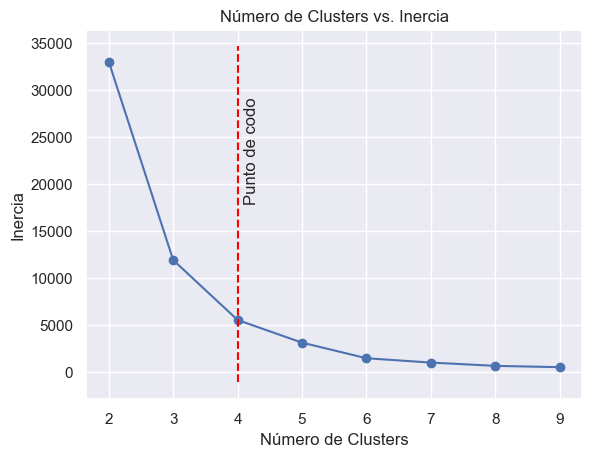

In [97]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_scaler.values)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(2, 10), inertia, marker="o", linestyle="-")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Número de Clusters vs. Inercia")

# Utilizamos KneeLocator para encontrar el punto de inflexión
kneedle = KneeLocator(range(2, 10), inertia, curve="convex", direction="decreasing")
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red')
plt.text(kneedle.knee+0.1, plt.ylim()[1]/2, 'Punto de codo', rotation=90)

plt.show()

He comprobado la inercia de mis datos, la prueba del codo y aplicando KneeLocator se ve que el punto más óptimo de Clusters es 4.



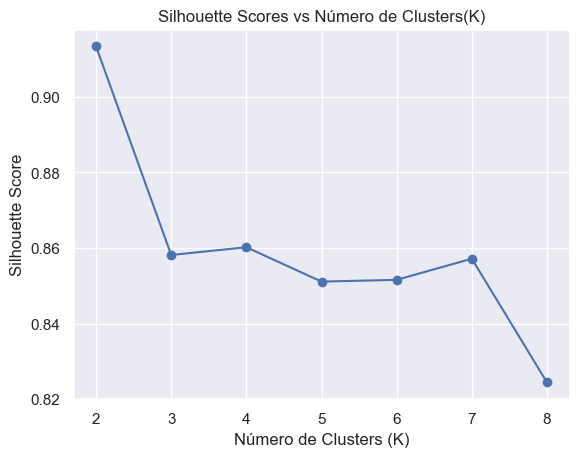

In [98]:
from sklearn.metrics import silhouette_score


def plot_silhouette(data, k_values):
    silhouette_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores vs Número de Clusters(K)')
    plt.show()

k_values = list(range(2, 9))
plot_silhouette(df.values, k_values)

Con el método silhouette el valor más alto de su coeficiente es de 2. Este en principio sería el número de k, el número de centroides. Si establecemos 4, lo que nos está indicando es que no se están dividiendo los datos de una buena forma, ya que el Score se encuentra en 0.86. Sin embargo si optamos por establecer el número 2, el Score se encuentra lo más próximo a 1. Entonces, voy a aplicar los dos para ver que está haciendo.

In [99]:
#desplegamos el método kmeans con el número de k escogido 
kmeans = KMeans(n_clusters=4).fit(df_scaler)

#predecimos los labels 
labels = kmeans.predict(df_scaler)

#creamos una nueva columna en nuestro dataset limpio con los valores de los labels
plazas_2022['label'] = labels

Primeramente, voy a graficar la descripción de los clusters teniendo en cuenta el tamaño de cada uno de los clusters y su relación con el conjunto total de datos.

Cluster 0: 126 observaciones
Cluster 2: 18 observaciones
Cluster 1: 6 observaciones
Cluster 3: 2 observaciones


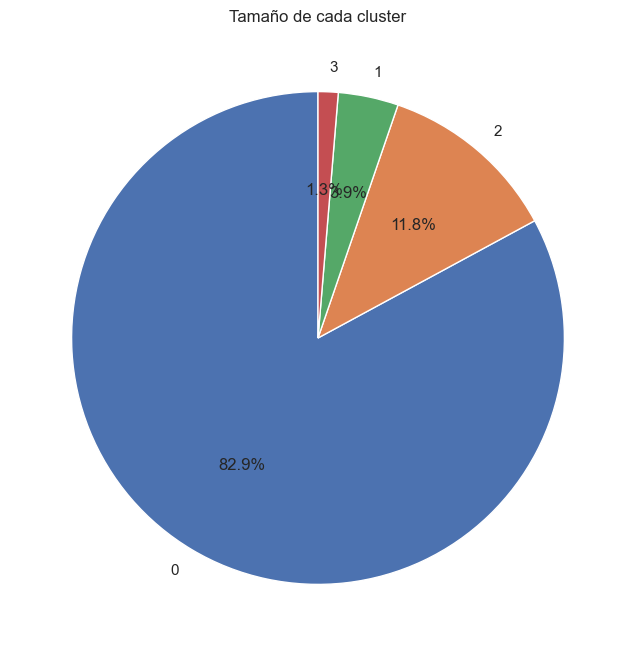

In [100]:
#contamos el número de observaciones por cluster
cluster_counts = plazas_2022['label'].value_counts()
messages = [f'Cluster {label}: {count} observaciones' for label, count in cluster_counts.items()]

#imprimimos la información
for message in messages:
    print(message)

#creamos un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)

#configuramos el título
plt.title('Tamaño de cada cluster')

# Mostrar el gráfico
plt.show()

Según el gráfico se establecen 4 Clusters, :

El cluster 0 es el que más observaciones tiene del conjunto de datos. 
Los clusters 1,2 y 3 representan solo el 17% del data set.
Existe mucha diferencia del cluster 0 al resto de clusters.

Voy a visualizar la distribución de los clusters vs las variables. Primeramente voy a ver como distribuye la variable discapacidad.

<Figure size 1200x800 with 0 Axes>

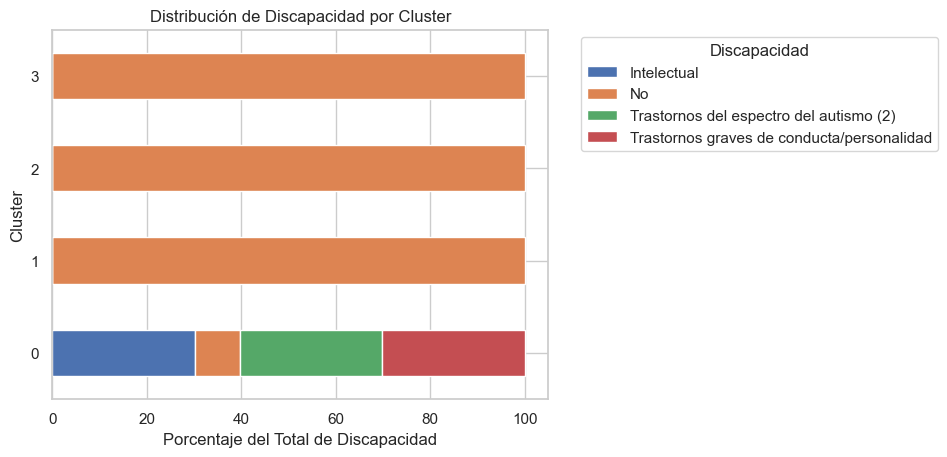

In [101]:
# Contar el número de ocurrencias de cada valor en 'Discapacidad_encoded' para cada cluster
conteo_discapacidad_por_cluster = plazas_2022.groupby(['label', 'Discapacidad']).size().unstack()

# Normalizar los valores para obtener el porcentaje
conteo_discapacidad_porcentaje = conteo_discapacidad_por_cluster.div(conteo_discapacidad_por_cluster.sum(axis=1), axis=0) * 100

# Escoger un estilo 
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_discapacidad_porcentaje.plot(kind='barh', stacked=True)

# Configurar
plt.title('Distribución de Discapacidad por Cluster')
plt.xlabel('Porcentaje del Total de Discapacidad')
plt.ylabel('Cluster')

# Ajustar leyenda
plt.legend(title='Discapacidad', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Y agrupa todas las discapacidades en el cluster 0, entonces se entiende que no tiene peso la variable Discapacidad para la agrupación ya que no lo hace de manera equitativa.

Voy a visualizar si lo agrupa por tipo de plazas.

<Figure size 1200x800 with 0 Axes>

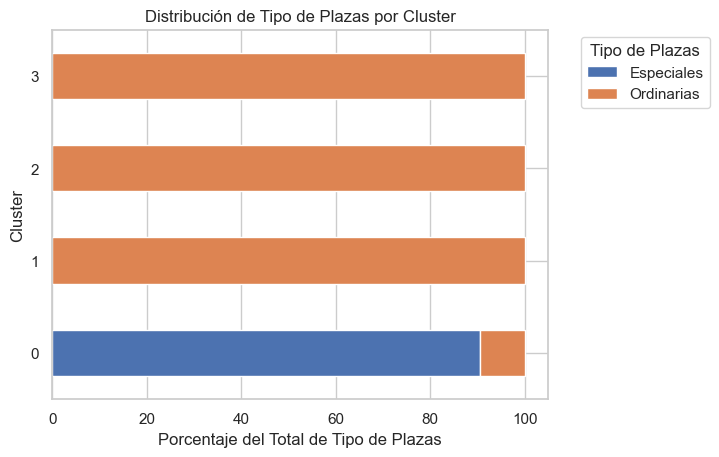

In [102]:
# Contar el número de ocurrencias de cada valor en 'Tipo de plazas_encoded' para cada cluster
conteo_tipo_plazas_por_cluster = plazas_2022.groupby(['label', 'Tipo de plazas']).size().unstack()

# Normalizar los valores para obtener el porcentaje
conteo_tipo_plazas_porcentaje = conteo_tipo_plazas_por_cluster.div(conteo_tipo_plazas_por_cluster.sum(axis=1), axis=0) * 100

# Escoger un estilo 
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_tipo_plazas_porcentaje.plot(kind='barh', stacked=True)

# Configurar
plt.title('Distribución de Tipo de Plazas por Cluster')
plt.xlabel('Porcentaje del Total de Tipo de Plazas')
plt.ylabel('Cluster')

# Ajustar leyenda
plt.legend(title='Tipo de Plazas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Y la sorpresa es que agrupa en el Cluster 0 las plazas especiales y el resto las distribuye en los otros Clusters.

Ahora, voy a visualizar la variable de Sexo.

<Figure size 1200x800 with 0 Axes>

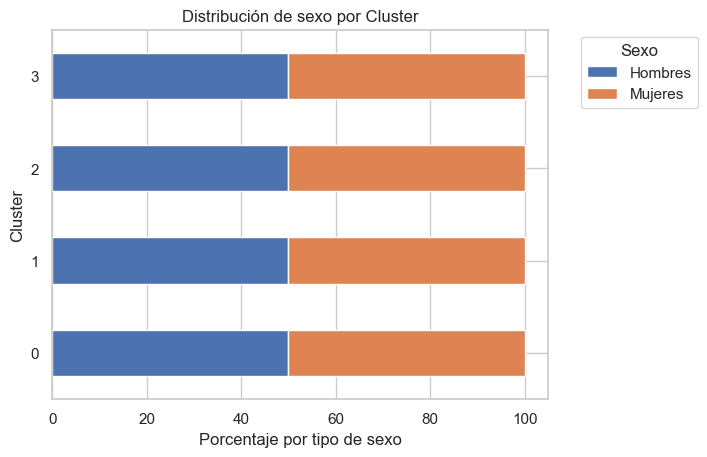

In [103]:
# Contar el número de ocurrencias de cada valor en 'Tipo de plazas_encoded' para cada cluster
conteo_tipo_plazas_por_cluster = plazas_2022.groupby(['label', 'Sexo']).size().unstack()

# Normalizar los valores para obtener el porcentaje
conteo_tipo_plazas_porcentaje = conteo_tipo_plazas_por_cluster.div(conteo_tipo_plazas_por_cluster.sum(axis=1), axis=0) * 100

# Escoger un estilo 
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_tipo_plazas_porcentaje.plot(kind='barh', stacked=True)

# Configurar
plt.title('Distribución de sexo por Cluster')
plt.xlabel('Porcentaje por tipo de sexo')
plt.ylabel('Cluster')

# Ajustar leyenda
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Y aquí si que distribuye la mitad para cada cluster. Entonces voy a visualizar por el tota de plazas matriculaciones.

<Figure size 1200x800 with 0 Axes>

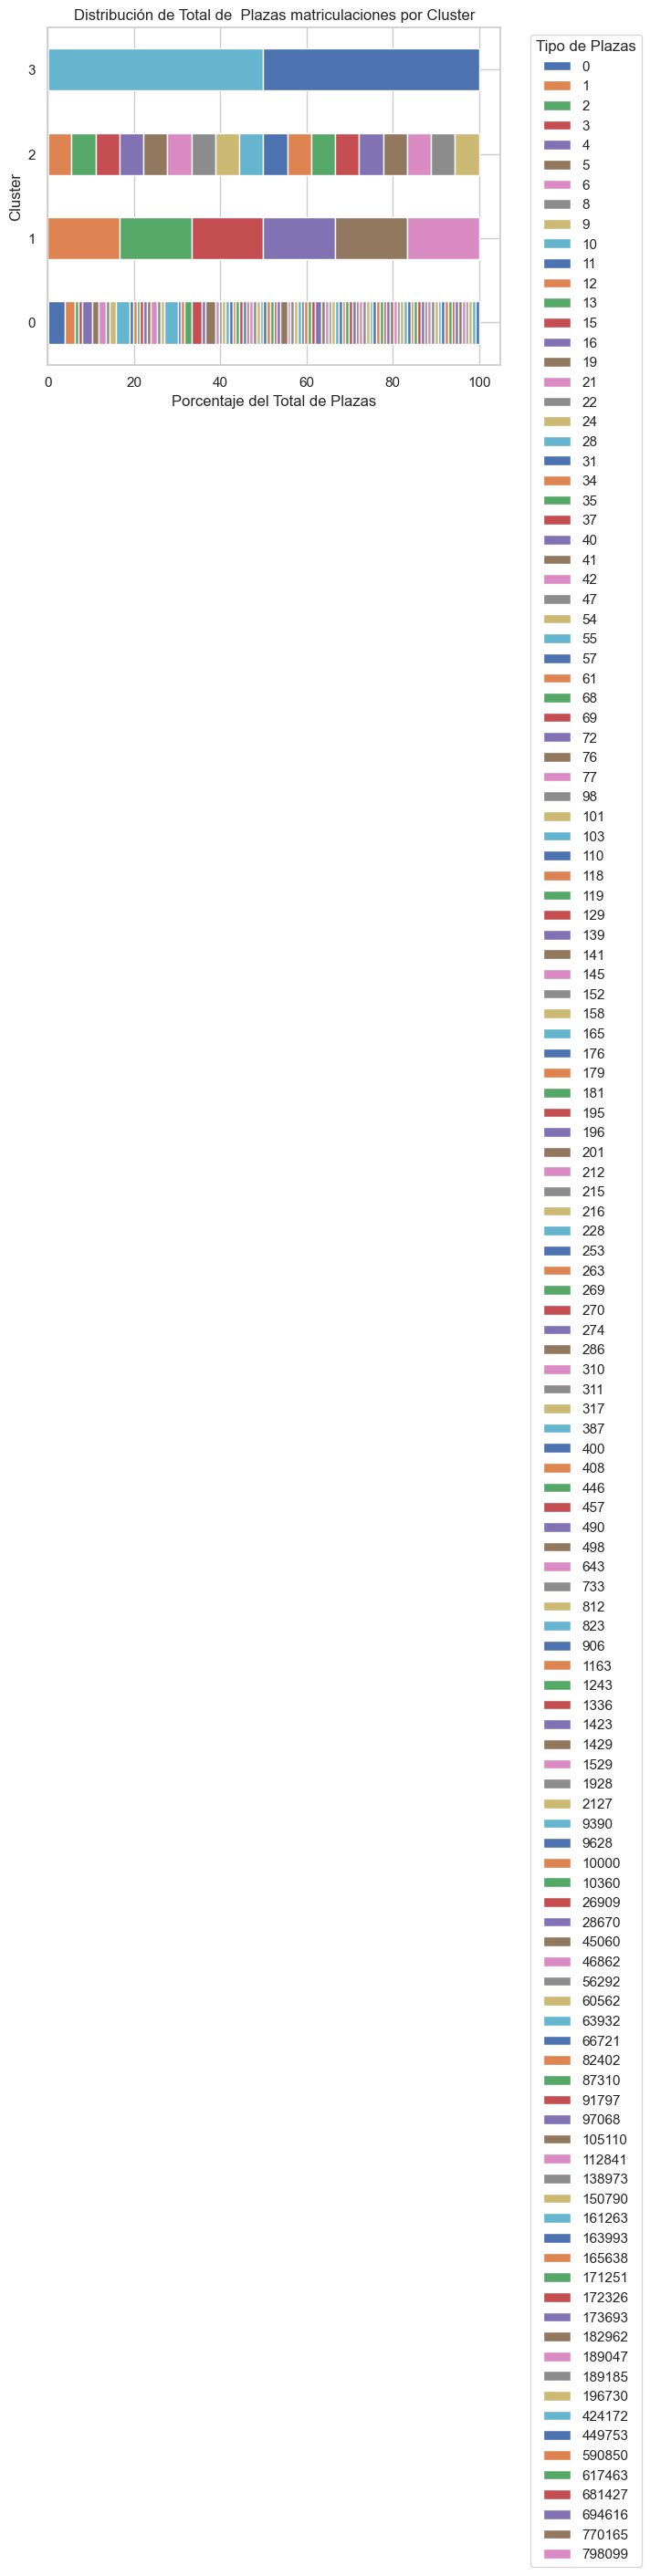

In [104]:
# Contar el número de ocurrencias de cada valor en 'Tipo de plazas_encoded' para cada cluster
conteo_tipo_plazas_por_cluster = plazas_2022.groupby(['label', 'Total plazas matriculaciones']).size().unstack()

# Normalizar los valores para obtener el porcentaje
conteo_tipo_plazas_porcentaje = conteo_tipo_plazas_por_cluster.div(conteo_tipo_plazas_por_cluster.sum(axis=1), axis=0) * 100

# Escoger un estilo 
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_tipo_plazas_porcentaje.plot(kind='barh', stacked=True)

# Configurar
plt.title('Distribución de Total de  Plazas matriculaciones por Cluster')
plt.xlabel('Porcentaje del Total de Plazas')
plt.ylabel('Cluster')

# Ajustar leyenda
plt.legend(title='Tipo de Plazas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Y sorpresa, me está haciendo grupos por el número de registros de matriculaciones. Sinceramente no le veo el sentido, pero...

In [105]:
#calculamos los valores medios por cada columna
mean_values = plazas_2022.groupby('label')[columnas_numericas].mean()

print(mean_values)

       Total plazas matriculaciones  Discapacidad_encoded  \
label                                                       
0                       3663.611111              1.603175   
1                     692103.333333              1.000000   
2                     146243.277778              1.000000   
3                     436962.500000              1.000000   

       Tipo de plazas_encoded  Sexo_encoded  Comunidad_01 ANDALUCÍA  \
label                                                                 
0                    0.095238           0.5                0.047619   
1                    1.000000           0.5                0.333333   
2                    1.000000           0.5                0.000000   
3                    1.000000           0.5                0.000000   

       Comunidad_02 ARAGÓN  Comunidad_10 COMUNITAT VALENCIANA  \
label                                                           
0                 0.047619                           0.047619   
1          

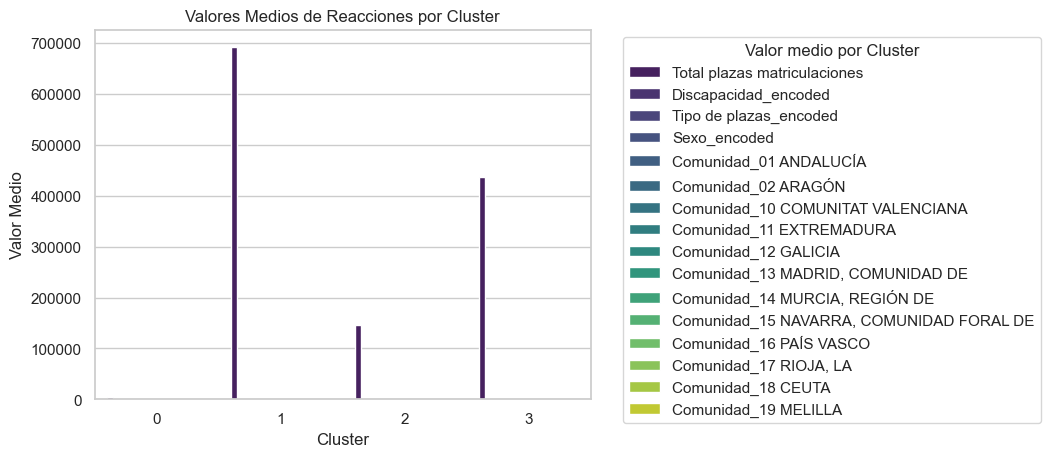

In [106]:
#determinamos la media  por cluster 
media = plazas_2022.groupby('label')[columnas_numericas].mean().reset_index()


#creamos un gráfico de barras agrupadas
plt.figure()
sns.barplot(data=media.melt(id_vars='label'), x='label', y='value', hue='variable', palette='viridis')

#configuramos el gráfico
plt.title('Valores Medios de Reacciones por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Medio')
plt.legend(title='Valor medio por Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Bueno, pues con este gráfico puedo ver perfectamente como se está distribuyendo las variables en cada cluster. Y evidencia lo que he explicando anteriormente.

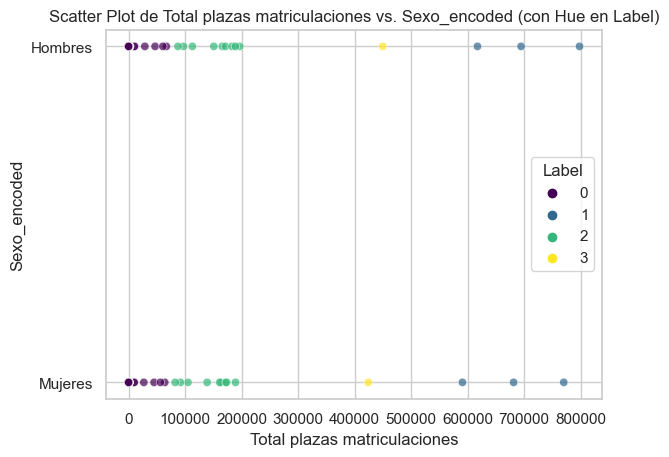

In [107]:
#creamos el scatter con comments y shares
sns.scatterplot(x='Total plazas matriculaciones', y='Sexo', hue='label', data=plazas_2022, alpha=0.7, palette='viridis')

#configuramos el gráfico
plt.title('Scatter Plot de Total plazas matriculaciones vs. Sexo_encoded (con Hue en Label)')
plt.xlabel('Total plazas matriculaciones')
plt.ylabel('Sexo_encoded')
plt.legend(title='Label')

plt.show()

Y haciendo un scatterplot de este modo me está agrupando los datos por sexo, y por el Total de plazas matriculaciones. Voy a aplicar 2 cluters para ver que pasa esta vez.

Cluster 0: 144 observaciones
Cluster 1: 8 observaciones


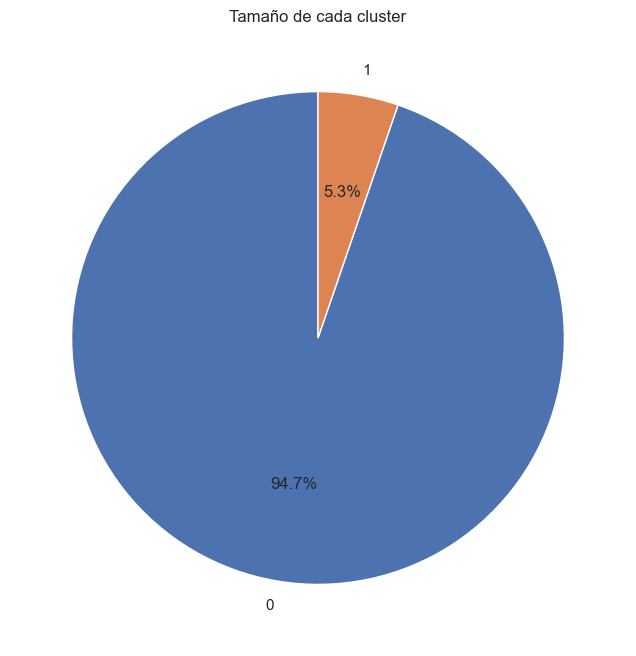

In [108]:
#desplegamos el método kmeans con el número de k escogido 
kmeans = KMeans(n_clusters=2).fit(df_scaler)

#predecimos los labels 
labels = kmeans.predict(df_scaler)

#creamos una nueva columna en nuestro dataset limpio con los valores de los labels
plazas_2022['label'] = labels

#contamos el número de observaciones por cluster
cluster_counts = plazas_2022['label'].value_counts()
messages = [f'Cluster {label}: {count} observaciones' for label, count in cluster_counts.items()]

#imprimimos la información
for message in messages:
    print(message)

#creamos un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)

#configuramos el título
plt.title('Tamaño de cada cluster')

# Mostrar el gráfico
plt.show()

Me asigna 94,7% en el Cluster 0 y un 5,3% en el Cluster 1.

<Figure size 1200x800 with 0 Axes>

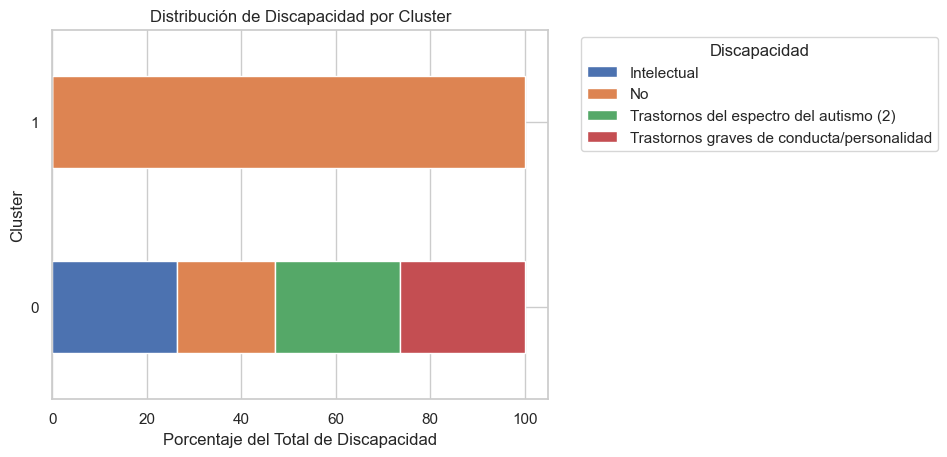

In [109]:
# Contar el número de ocurrencias de cada valor en 'Discapacidad_encoded' para cada cluster
conteo_discapacidad_por_cluster = plazas_2022.groupby(['label', 'Discapacidad']).size().unstack()

# Normalizar los valores para obtener el porcentaje
conteo_discapacidad_porcentaje = conteo_discapacidad_por_cluster.div(conteo_discapacidad_por_cluster.sum(axis=1), axis=0) * 100

# Escoger un estilo 
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_discapacidad_porcentaje.plot(kind='barh', stacked=True)

# Configurar
plt.title('Distribución de Discapacidad por Cluster')
plt.xlabel('Porcentaje del Total de Discapacidad')
plt.ylabel('Cluster')

# Ajustar leyenda
plt.legend(title='Discapacidad', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Interesante, Discapacidades en el Cluster 0 y el resto en Cluster 1. Voy a seguir mirando.

<Figure size 1200x800 with 0 Axes>

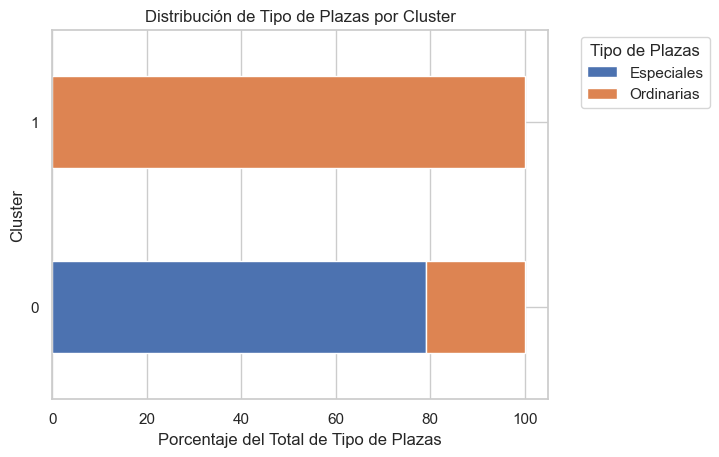

In [110]:
# Contar el número de ocurrencias de cada valor en 'Tipo de plazas_encoded' para cada cluster
conteo_tipo_plazas_por_cluster = plazas_2022.groupby(['label', 'Tipo de plazas']).size().unstack()

# Normalizar los valores para obtener el porcentaje
conteo_tipo_plazas_porcentaje = conteo_tipo_plazas_por_cluster.div(conteo_tipo_plazas_por_cluster.sum(axis=1), axis=0) * 100

# Escoger un estilo 
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_tipo_plazas_porcentaje.plot(kind='barh', stacked=True)

# Configurar
plt.title('Distribución de Tipo de Plazas por Cluster')
plt.xlabel('Porcentaje del Total de Tipo de Plazas')
plt.ylabel('Cluster')

# Ajustar leyenda
plt.legend(title='Tipo de Plazas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Bien, asigna plazas Especiales a Cluster 0 y Plazas Ordinarias a Cluster 1.



<Figure size 1200x800 with 0 Axes>

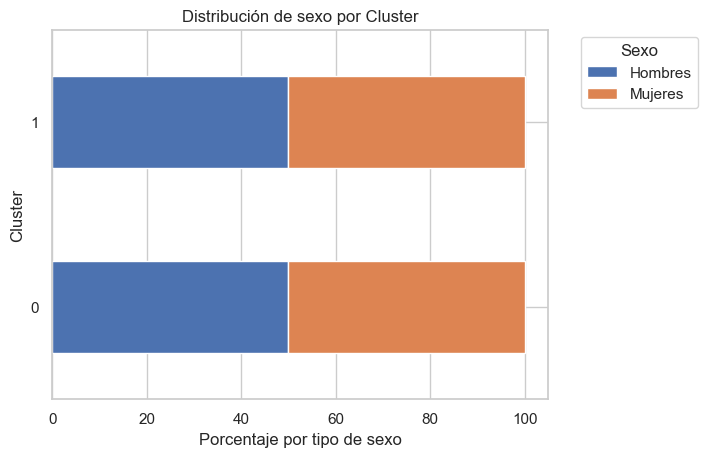

In [111]:
# Contar el número de ocurrencias de cada valor en 'Tipo de plazas_encoded' para cada cluster
conteo_tipo_plazas_por_cluster = plazas_2022.groupby(['label', 'Sexo']).size().unstack()

# Normalizar los valores para obtener el porcentaje
conteo_tipo_plazas_porcentaje = conteo_tipo_plazas_por_cluster.div(conteo_tipo_plazas_por_cluster.sum(axis=1), axis=0) * 100

# Escoger un estilo 
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_tipo_plazas_porcentaje.plot(kind='barh', stacked=True)

# Configurar
plt.title('Distribución de sexo por Cluster')
plt.xlabel('Porcentaje por tipo de sexo')
plt.ylabel('Cluster')

# Ajustar leyenda
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Esta vez, igual que en la anterior agrupación, reparte hombres y mujeres por igual a cada Cluster.

<Figure size 1200x800 with 0 Axes>

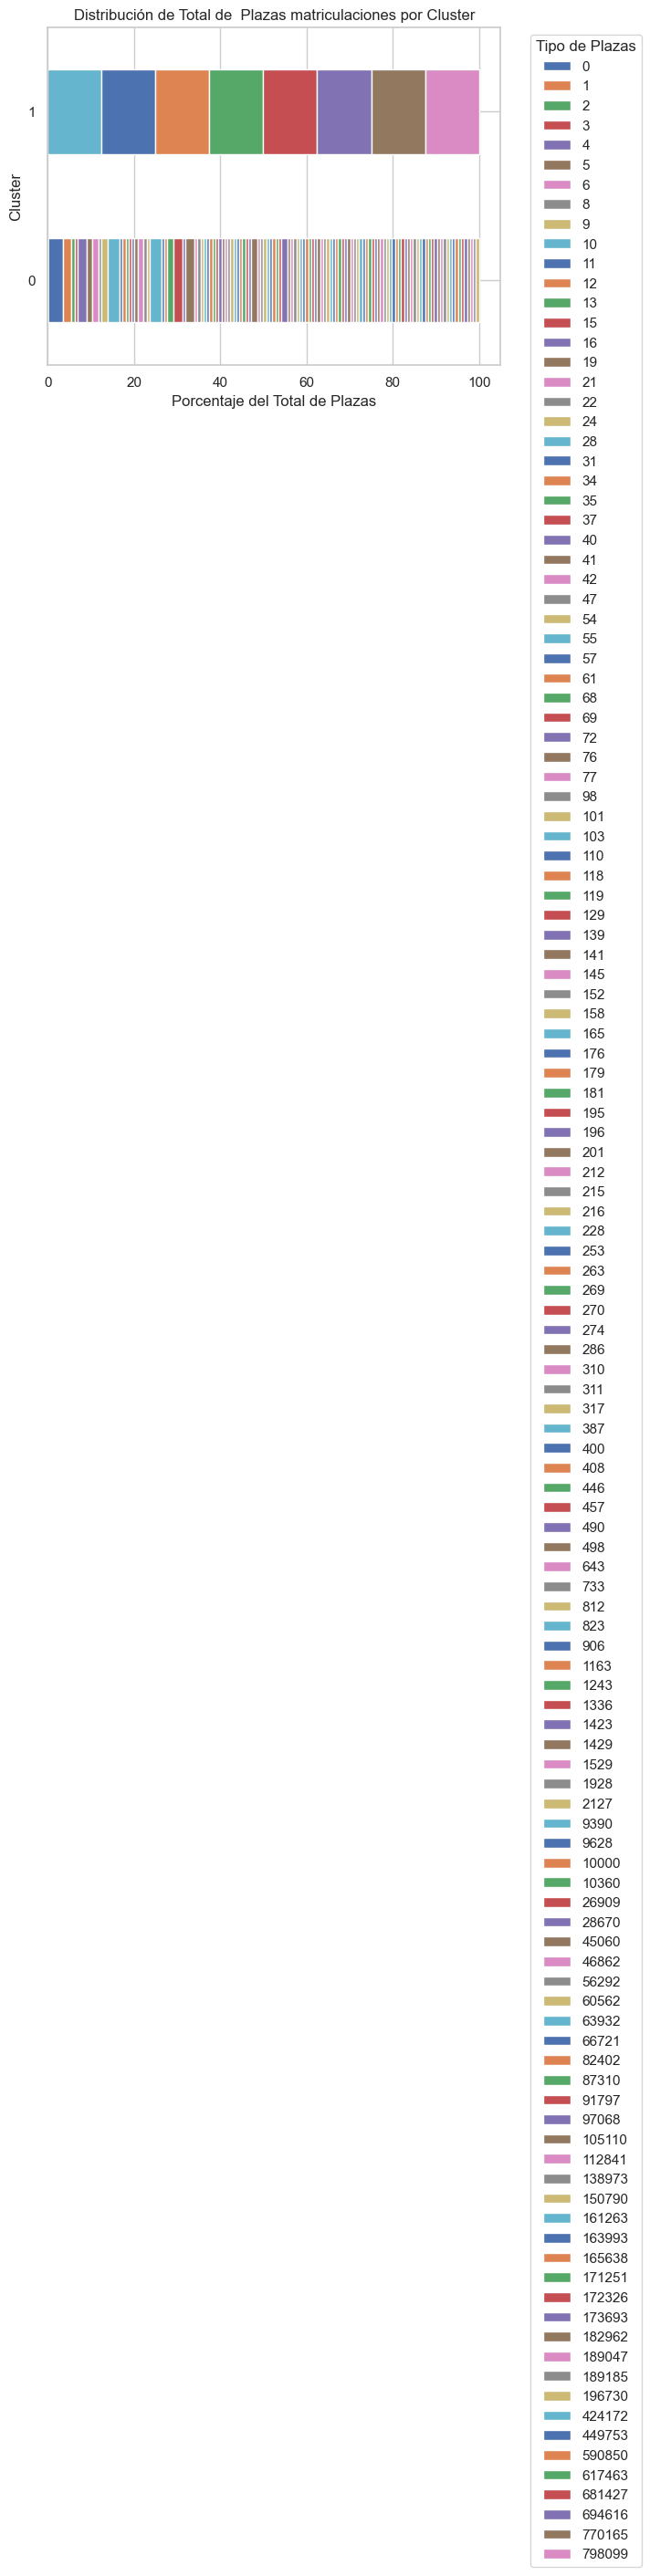

In [112]:
# Contar el número de ocurrencias de cada valor en 'Tipo de plazas_encoded' para cada cluster
conteo_tipo_plazas_por_cluster = plazas_2022.groupby(['label', 'Total plazas matriculaciones']).size().unstack()

# Normalizar los valores para obtener el porcentaje
conteo_tipo_plazas_porcentaje = conteo_tipo_plazas_por_cluster.div(conteo_tipo_plazas_por_cluster.sum(axis=1), axis=0) * 100

# Escoger un estilo 
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_tipo_plazas_porcentaje.plot(kind='barh', stacked=True)

# Configurar
plt.title('Distribución de Total de  Plazas matriculaciones por Cluster')
plt.xlabel('Porcentaje del Total de Plazas')
plt.ylabel('Cluster')

# Ajustar leyenda
plt.legend(title='Tipo de Plazas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

También tiene en cuenta el Total de plazas, pero entiendo que tiene más peso los argumentos anteriores.

In [113]:
#calculamos los valores medios por cada columna
mean_values = plazas_2022.groupby('label')[columnas_numericas].mean()

print(mean_values)

       Total plazas matriculaciones  Discapacidad_encoded  \
label                                                       
0                      21486.069444              1.527778   
1                     628318.125000              1.000000   

       Tipo de plazas_encoded  Sexo_encoded  Comunidad_01 ANDALUCÍA  \
label                                                                 
0                    0.208333           0.5                0.041667   
1                    1.000000           0.5                0.250000   

       Comunidad_02 ARAGÓN  Comunidad_10 COMUNITAT VALENCIANA  \
label                                                           
0                 0.055556                           0.041667   
1                 0.000000                           0.250000   

       Comunidad_11 EXTREMADURA  Comunidad_12 GALICIA  \
label                                                   
0                      0.055556              0.055556   
1                      0.000000       

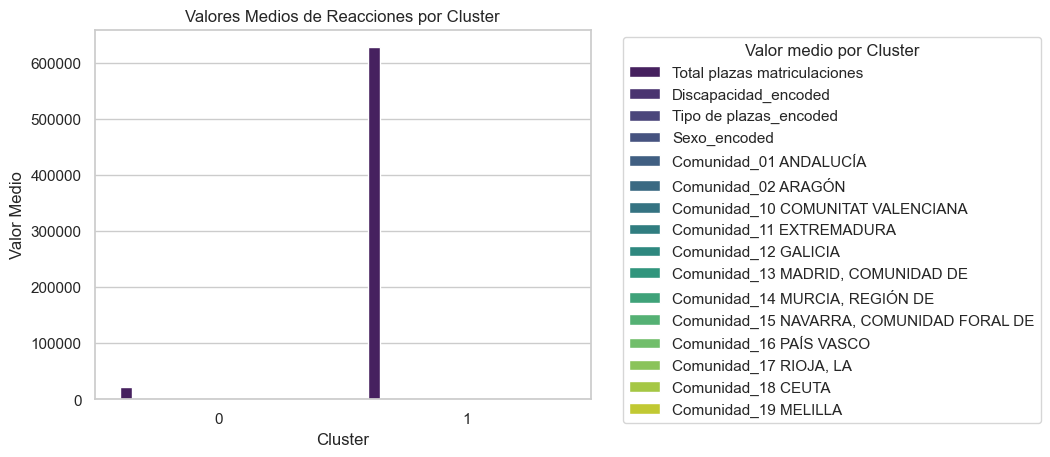

In [114]:
#determinamos la media  por cluster 
media = plazas_2022.groupby('label')[columnas_numericas].mean().reset_index()


#creamos un gráfico de barras agrupadas
plt.figure()
sns.barplot(data=media.melt(id_vars='label'), x='label', y='value', hue='variable', palette='viridis')

#configuramos el gráfico
plt.title('Valores Medios de Reacciones por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Medio')
plt.legend(title='Valor medio por Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

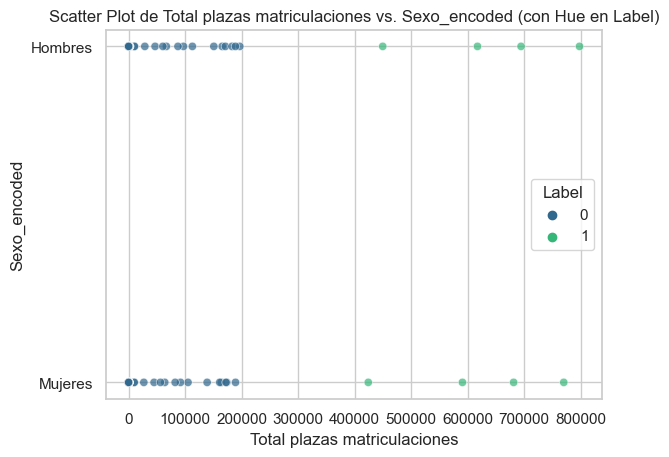

In [115]:
#creamos el scatter 
sns.scatterplot(x='Total plazas matriculaciones', y='Sexo', hue='label', data=plazas_2022, alpha=0.7, palette='viridis')

#configuramos el gráfico
plt.title('Scatter Plot de Total plazas matriculaciones vs. Sexo_encoded (con Hue en Label)')
plt.xlabel('Total plazas matriculaciones')
plt.ylabel('Sexo_encoded')
plt.legend(title='Label')

plt.show()

CONCLUSIONES:

Partiendo que mi dataset tiene variables que no tienen relación entre ellas, ya que se trata de un dataset con registros anuales, que además son repetidos en el tiempo. También me encuentro que no tenemos una variable target, por ello se me presentaban 2 opciones de aplicación de modelo, o agrupación sin target, como es mi caso K-means, (ya que el resto de modelos de clasificación me piden expresamente que exista dicha variable) o por el contrario una predicción que tomara datos temporales sin estacionalidad. Revisé los modelos que se podrían aplicar y encontré uno la autoregresión pero tampoco lo logré.

Así que finalmente, aplicando el modelo K-mens me quedo más convencida de que la segunda opción me lo agrupa de una manera más coherente que la primera. En plazas Ordinarias y plazas Especiales.

Realmente el fin de mi proyecto a sido darme luz de la realidad que existe a nivel nacional las discapacidades especiales en nustro país. Creía que cada vez existian más casos, esa era mi sensación. Me he encontrado que en España no se está movilizando de la misma manera como se ha movilizado en Estados Unidos. Además de que llevan mucho más tiempo estuciando lo relacionado a las discapacidaes. Me encontré que practicamente no existian bases de datos relacionadas, que además lo que existía no eran datos reales, ya que existe un tardancia en la otorgación de la discapacidad por parte de las administraciones. Y que este dataset que he creado sí tiene esa transparencia real, ya que en el momento que se realiza un informe médico automáticamente se asigna una plaza de necesidades especiales.

También he podido confirmar que un 94,7% se destina a plazas Ordinarias y el resto sólo el 5,3% se destina a las plazas especiales totales a nivel nacional. Esta es la realidad de mi proyecto.